<a href="https://colab.research.google.com/github/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/cristie_mod6_proj_final_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **Ciência de Dados: Fundamentos de Machine Learning**
---
---

## **Pós-graduação em Ciência de Dados (2025/2026)**

**Escola Superior de Tecnologia da Universidade Estadual do Amazonas - EST/UEA**
    
**Disciplina:** Fundamentos de Machine Learning

**Prof. Me.:** Mario Bessa

_**Repositório do Projeto Acadêmico no Github:** [e-SUS_Sinan_Mpox_ML-Workflow](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow)_

_**Aluna:**_

- _A. Cristiane R. Lima (Cristie)_

_**Data:** 10 de setembro de 2025_


## **Projeto Final**
Este projeto está dividido em 2 notebooks para contemplar o fluxo completo de pré-modelagem e modelagem para o dataset [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox), seguindo uma estrutura padronizada, do seguinte modo:

- cristie_mod6_proj_final_parte_1.ipynb: Aquisição, Análise Descritiva e Exploratória de Dados (EDA), Pré-processamento (Correção )

Foi desenvolvido a partir do notebook-base apresentado e explicado ao longo as aulas teórico-práticas em laboratório do Professor.

---

💡 **Nota técnica:** O link para o Dicionário de Dados está disponível na seção de *Análise Descritiva*. Recomenda-se mantê-lo aberto para facilitar a interpretação das variáveis.

⚠️ **Observação:** Linhas com o comentário `#debug#` indicam trechos opcionais para testes e inspeções pontuais — como a geração de arquivos `.csv` temporários para verificar o estado do DataFrame após imputações.

📚 **Referência:**  
KELLEHER, John D.; MAC NAMEE, Brian; D’ARCY, Aoife. *Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies*. 2. ed. Cambridge, MA: MIT Press, 2020.


---
### **Contextualização do Projeto**

A Mpox (Monkeypox) é uma doença infecciosa emergente que ganhou atenção internacional devido ao seu potencial de disseminação e impacto na saúde pública. No Brasil, o sistema e-SUS Sinan tem sido fundamental para o registro e monitoramento dos casos, permitindo a construção de bases de dados estruturadas para análise epidemiológica.

Este projeto tem como objetivo aplicar técnicas de aprendizado de máquina para explorar, tratar e modelar os dados disponíveis, com foco na geração de insights preditivos que possam apoiar estratégias de vigilância e resposta. A abordagem adotada contempla desde o pré-processamento e imputação de dados até a construção de modelos supervisionados, seguindo diretrizes metodológicas discutidas em ambiente acadêmico.

---

**Instruções:**

- Realizar os processamentos abaixo:

  - No notebook `cristie_mod6_proj_final_parte_1.ipynb`:
    -  Atividade 1: Limpar dados incorretos
    -  Atividade 2: Imputação de valores faltantes
  - No notebook `cristie_mod6_proj_final_parte_2.ipynb`:
    -  Atividade 3: Codificação de variáveis categóricas (OrdinalEncoder e OneHotEncoder)
    -  Atividade 4: Escalonamento de variáveis numéricas (StandardScaler e MinMaxScaler)
    -  Atividade 5: Balanceamento dos dados (Tomek e Smote)
    -  Atividade 6: Treinamento dos modelos de Machine Learning
    -  Atividade 7: Usar o modelo treinado

## **Importa bibliotecas**

In [ ]:
# !pip -q install
"""
!pip install pandas --upgrade
!pip install numpy --upgrade

!pip install matplotlib --upgrade
!pip install seaborn --upgrade

!pip install plotly --upgrade
!pip install yellowbrick --upgrade

!pip install sklearn --upgrade
"""

'\n!pip install pandas --upgrade\n!pip install numpy --upgrade\n\n!pip install matplotlib --upgrade\n!pip install seaborn --upgrade\n\n!pip install plotly --upgrade\n!pip install yellowbrick --upgrade\n\n!pip install sklearn --upgrade\n'

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns

import joblib
#### 💾 Atividade 7 — Serialização do Pipeline Final
from joblib import dump, load

import matplotlib.pyplot as plt
import warnings
import json # salvar/abrir arquivos JSON
import os   # manipulação de diretórios



In [ ]:
# Para aplicar OrdinalEncoder ou OneHotEncoder em variáveis categóricas
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Para aplicar StandardScaler e MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Para filtro de variância
from sklearn.feature_selection import VarianceThreshold

# Para seleção supervisionada — RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Para seleção supervisionada — Feature Importance (Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Para aplicar Mutual Information entre X e cada alvo
from sklearn.feature_selection import mutual_info_classif

# Para cálculo de métricas no Benchmark com Regressão Logística (StandardScaler + MinMaxScaler) ---
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Para diagnóstico de multicolinearidade via VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Para garantir X 100% numérico e sem NaN antes de Tomek/SMOTE
from sklearn.impute import SimpleImputer

# Para aplicar TomerkLinks e SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE



In [ ]:
# Para divisão das bases em treinamento e teste
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [ ]:
# Para Definição dos 7 modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
#### 🤖 Modelagem Base — Avaliação de Classificadores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
#### 🔍 Tuning de Hiperparâmetros — Random Forest e Árvore de Decisão
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#### 📊 Avaliação Final no Conjunto de Teste (Random Forest e Decision Tree tunados)
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve


## 📂 Desserialização do Dataset Pré-processado (Parquet)

O dataset **pré-processado de 2022** foi carregado em formato **Parquet**, escolhido por sua eficiência em compressão e leitura rápida em pipelines.  
Essa desserialização garante consistência entre a **Parte 1** (aquisição, correção e limpeza) e a **Parte 2** (engenharia e modelagem).

### Objetivos
- Ler o artefato salvo (`mpox_2022_prep.parquet`) diretamente do repositório.  
- Validar integridade estrutural (número de linhas e colunas).  
- Assegurar que o pipeline da Parte 2 inicie com dados padronizados e auditáveis.

📖 **Nota metodológica**  
O uso de **artefatos versionados** (Parquet, CSV) permite reprodutibilidade e segue a recomendação de Kelleher (2020) para a etapa **Data Preparation**.  
Assim como em um **prontuário clínico estruturado**, preserva-se a fidelidade do registro e evita-se a perda de informações em transições entre etapas.


In [ ]:
# ==============================================
# 📂 Tarefas preliminares — Carregamento Parquet
# ==============================================
import pandas as pd
import requests, io

# URL correta do arquivo Parquet no GitHub (raw)
url = "https://raw.githubusercontent.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/main/artefatos/parte1/mpox_2022_prep.parquet"

# Baixar como binário
r = requests.get(url)
r.raise_for_status()

# Ler parquet a partir dos bytes
df_prep = pd.read_parquet(io.BytesIO(r.content), engine="pyarrow")  # ou engine="fastparquet"

print("✅ df_prep carregado com sucesso:", df_prep.shape)
df_prep.head()


✅ df_prep carregado com sucesso: (10920, 114)


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,...,CLADO_missing,DOENCA_TRA.1_missing,NU_IDADE_N_missing,CONTAG_CD4_missing,DT_NOTIFIC_missing,DT_SIN_PRI_missing,DT_COLETA_missing,DATA_VACINA_missing,DT_INTERNA_missing,DT_EVOLUCAO_missing
0,1,PB,PB,250750,2022-12-08,25,250750,34,1,1,...,0,0,0,0,0,0,0,1,1,0
1,1,PR,PR,410690,2022-08-09,41,410690,36,1,1,...,0,0,0,1,0,0,0,1,1,0
2,1,PR,PR,410690,2022-08-08,41,410690,32,1,1,...,0,0,0,1,0,0,0,1,1,0
3,1,ES,PR,410690,2022-08-08,32,320520,29,1,1,...,0,0,0,1,0,0,0,1,1,0
4,1,PR,PR,410690,2022-08-05,41,410690,47,2,1,...,0,0,0,1,0,0,1,1,1,0


## 📌 Nota da seção – Desserialização dos dados

- O dataset pré-processado (`df_prep`) foi desserializado a partir do arquivo `.parquet`.  
- Esta etapa marca o início da **Parte 2 (Engenharia de Atributos & Modelagem)**.  
- Próximas etapas: **codificação das variáveis categóricas** e **escalonamento das variáveis numéricas**.

## ⚙️ Engenharia de Atributos

Nesta etapa, foram **derivadas variáveis secundárias** a partir das colunas brutas do dataset, de forma a enriquecer o espaço de predição.  
O processo é análogo a uma **avaliação clínica detalhada**, em que sinais e exames são combinados para gerar indicadores compostos mais úteis para o diagnóstico.

### Objetivos
- **Explodir sintomas em dummies** (`sx_*`), permitindo granularidade na análise clínica.  
- Criar **variáveis derivadas de datas** (ex.: `delay_notif`, `tempo_internacao`, `duracao_caso`).  
- Construir **agregados clínicos** (ex.: ISTs, imunossupressão, vacinação).  
- Gerar **bins demográficos e regionais** (faixa etária e região).  
- Incorporar **interações pragmáticas** entre atributos, como `imune_risco_x_sintomas`.  
- Definir **variáveis-alvo binárias** (`target_hosp`, `target_obito_any`, `target_obito_mpx`) de forma padronizada.

📖 **Nota metodológica**  
Essa prática corresponde à fase **Feature Engineering** (Kelleher, 2020).  
Tal como na medicina preventiva, em que **sinais isolados são transformados em indicadores compostos**, aqui enriquecem-se os atributos para melhorar a capacidade preditiva dos modelos, respeitando a integridade dos registros originais.


### Engenharia de Atributos — Funções

In [ ]:
# ==========================================
# ⚙️ ENGENHARIA DE ATRIBUTOS — FUNÇÕES E EXECUÇÃO
# ==========================================
#import pandas as pd
#import numpy as np

# ------------------------------------------------------------
# 1) Explosão de sintomas em dummies (com min_freq opcional)
# ------------------------------------------------------------
def explode_sintoma_dummies_simple(
    df: pd.DataFrame,
    col: str = "SINTOMA",
    prefix: str = "sx_",
    min_freq: int | None = None
) -> tuple[pd.DataFrame, list]:
    """
    Transforma a coluna de sintomas (strings separadas por vírgula) em colunas dummies (0/1).

    Parâmetros
    ----------
    df : DataFrame
        Base de entrada.
    col : str
        Nome da coluna que contém a lista de sintomas (ex.: "Febre, Cefaleia").
    prefix : str
        Prefixo a ser usado nas colunas dummies geradas (ex.: "sx_").
    min_freq : int | None
        - None → mantém TODOS os sintomas (recomendado para saúde; preserva informação).
        - inteiro ≥1 → mantém apenas sintomas com frequência absoluta ≥ min_freq
                       (útil futuramente para reduzir esparsidade).

    Retorno
    -------
    df_out : DataFrame
        DataFrame original + colunas dummies para cada sintoma selecionado.
    sintomas_cols : list[str]
        Lista com os nomes das colunas de sintomas criadas.
    """
    df_out = df.copy()

    if col not in df_out.columns:
        return df_out, []

    # Lista de sintomas por linha (minúsculas, trim de espaços; ignora strings vazias)
    s_clean = df_out[col].fillna("").astype(str)
    listas = s_clean.str.split(",").apply(lambda xs: [t.strip().lower() for t in xs if t.strip() != ""])

    # Frequência dos termos
    freq = pd.Series([t for sub in listas for t in sub]).value_counts()

    # Seleção por min_freq (se None → todos)
    if min_freq is None:
        termos = freq.index
    else:
        termos = freq[freq >= int(min_freq)].index

    # Criação de dummies (0/1) linha a linha
    for termo in termos:
        c = f"{prefix}{termo.replace(' ', '_')}"
        df_out[c] = listas.apply(lambda L: int(termo in L)).astype("Int64")

    sintomas_cols = [c for c in df_out.columns if c.startswith(prefix)]
    return df_out, sintomas_cols


# ------------------------------------------------------------
# 2) Features derivadas de datas (sem imputar datas)
# ------------------------------------------------------------
def add_date_features(
    df: pd.DataFrame,
    col_notif: str = "DT_NOTIFIC",
    col_inicio: str = "DT_SIN_PRI",
    col_evol: str = "DT_EVOLUCAO",
    col_intern: str = "DT_INTERNA",
    create_missing_flags: bool = True
) -> pd.DataFrame:
    """
    Cria deltas de tempo (em dias) a partir de colunas de datas — sem imputação.
    Se a linha não tiver ambas as datas válidas, o delta fica NaN.

    Parâmetros
    ----------
    df : DataFrame
        Base de entrada (datas podem estar em string; serão convertidas durante o cálculo).
    col_notif, col_inicio, col_evol, col_intern : str
        Nomes das colunas de datas conforme o dicionário.
    create_missing_flags : bool
        Se True, mantém/gera indicadores *_missing (0/1) para cada coluna de data original.

    Retorno
    -------
    DataFrame com as colunas:
      - delay_notif        = DT_NOTIFIC - DT_SIN_PRI
      - tempo_internacao   = DT_EVOLUCAO - DT_INTERNA
      - duracao_caso       = DT_EVOLUCAO - DT_SIN_PRI
    """
    out = df.copy()

    # Flags de ausência (se existirem as colunas)
    def _flag(col):
        if create_missing_flags and col in out.columns:
            out[f"{col}_missing"] = out[col].isna().astype("Int64")

    for c in [col_notif, col_inicio, col_evol, col_intern]:
        _flag(c)

    # Converte sob demanda apenas para calcular deltas
    to_dt = lambda s: pd.to_datetime(s, errors="coerce", dayfirst=True)

    if {col_notif, col_inicio}.issubset(out.columns):
        out["delay_notif"] = (to_dt(out[col_notif]) - to_dt(out[col_inicio])).dt.days

    if {col_evol, col_intern}.issubset(out.columns):
        out["tempo_internacao"] = (to_dt(out[col_evol]) - to_dt(out[col_intern])).dt.days

    if {col_evol, col_inicio}.issubset(out.columns):
        out["duracao_caso"] = (to_dt(out[col_evol]) - to_dt(out[col_inicio])).dt.days

    return out


# ------------------------------------------------------------
# 3) Agregados clínicos (ISTs, imunossupressão, vacinação)
# ------------------------------------------------------------
def add_clinical_aggregates(
    df: pd.DataFrame,
    ist_cols: list | None = None,
    col_imuno: str = "PAC_IMUNOSSUP",
    col_vacina: str = "VACINA"
) -> pd.DataFrame:
    """
    Cria agregações clínicas:

    - ist_any   : 1 se pelo menos uma IST específica = 1; 0 caso contrário (ignora NaN ao somar/max).
    - ist_count : soma das ISTs específicas (contagem).
    - imune_risco:
        PAC_IMUNOSSUP (1,2,3) → 1; 4→0; outros (9/NaN) → NA.
    - vacina_qualquer:
        VACINA in {1,2,3} → 1; VACINA==4 → 0; caso contrário → NA.

    Parâmetros
    ----------
    df : DataFrame
    ist_cols : list | None
        Lista explícita de colunas de ISTs. Se None, usa o conjunto padrão do mpox_2022.
    col_imuno : str
        Nome da coluna de imunossupressão.
    col_vacina : str
        Nome da coluna de vacinação.

    Retorno
    -------
    DataFrame com novas colunas: ist_any, ist_count, imune_risco, vacina_qualquer.
    """
    out = df.copy()

    if ist_cols is None:
        ist_cols = [
            "GONORREIA","CLAMIDEA","SIFILIS","HERPES_GENITAL","CANCRO_MOLE",
            "TRICHOMOMAS_VAGINALS","LINFOGRANULOMA","MYCOPLASMA_GENITAL",
            "HPV","DIP","DONOVANOSE","HTLV","VERRUGA_GENITAL"
        ]
    ist_cols = [c for c in ist_cols if c in out.columns]

    if ist_cols:
        out["ist_any"] = out[ist_cols].max(axis=1, skipna=True).astype("Int64")
        out["ist_count"] = out[ist_cols].sum(axis=1, skipna=True).astype("Int64")

    if col_imuno in out.columns:
        m = out[col_imuno].map({1:1, 2:1, 3:1, 4:0})
        out["imune_risco"] = m.astype("Int64")

    if col_vacina in out.columns:
        v = pd.Series(pd.NA, index=out.index, dtype="Int64")
        v = v.mask(out[col_vacina].isin([1,2,3])==True, 1)
        v = v.mask(out[col_vacina].eq(4)==True, 0)
        out["vacina_qualquer"] = v

    return out


# ------------------------------------------------------------
# 4) Bins demográficos / Região (UF→região)
# ------------------------------------------------------------
def add_demo_bins(
    df: pd.DataFrame,
    col_idade: str = "NU_IDADE_N",
    col_uf: str = "SG_UF"
) -> pd.DataFrame:
    """
    Cria faixas etárias e região (a partir de SG_UF).
    - faixa_etaria: categorias textuais (0–9, 10–17, 18–29, 30–39, 40–49, 50–59, 60+).
      (Mantém NaN quando NU_IDADE_N ausente).
    - regiao: Norte, Nordeste, Centro-Oeste, Sudeste, Sul (NaN se SG_UF ausente ou desconhecido).

    Parâmetros
    ----------
    df : DataFrame
    col_idade : str
        Nome da coluna de idade (anos).
    col_uf : str
        Nome da coluna de UF (sigla).

    Retorno
    -------
    DataFrame com 'faixa_etaria' (category) e 'regiao' (category).
    """
    out = df.copy()

    # Faixas etárias (ajustáveis)
    if col_idade in out.columns:
        bins = [-np.inf, 9, 17, 29, 39, 49, 59, np.inf]
        labels = ["0-9","10-17","18-29","30-39","40-49","50-59","60+"]
        out["faixa_etaria"] = pd.cut(out[col_idade], bins=bins, labels=labels).astype("category")

    # Mapeamento UF → Região (IBGE)
    uf_regiao = {
        # Norte
        "AC":"Norte","AP":"Norte","AM":"Norte","PA":"Norte","RO":"Norte","RR":"Norte","TO":"Norte",
        # Nordeste
        "AL":"Nordeste","BA":"Nordeste","CE":"Nordeste","MA":"Nordeste","PB":"Nordeste",
        "PE":"Nordeste","PI":"Nordeste","RN":"Nordeste","SE":"Nordeste",
        # Centro-Oeste
        "DF":"Centro-Oeste","GO":"Centro-Oeste","MS":"Centro-Oeste","MT":"Centro-Oeste",
        # Sudeste
        "ES":"Sudeste","MG":"Sudeste","RJ":"Sudeste","SP":"Sudeste",
        # Sul
        "PR":"Sul","RS":"Sul","SC":"Sul",
    }
    if col_uf in out.columns:
        out["regiao"] = out[col_uf].map(uf_regiao).astype("category")

    return out


# ------------------------------------------------------------
# 5) Interações (exemplos pragmáticos)
# ------------------------------------------------------------
def add_interactions(
    df: pd.DataFrame,
    sintomas_prefix: str = "sx_",
    center_delay_by: str = "regiao"
) -> pd.DataFrame:
    """
    Cria interações/transformações simples:

    - sintoma_count: soma dos dummies de sintomas (se existirem colunas com prefixo sintomas_prefix).
    - imune_risco_x_sintomas: produto de imune_risco * sintoma_count (se ambas existirem).
    - delay_notif_centered_regiao: delay_notif centrado pela média da região (se 'regiao' existir).

    Parâmetros
    ----------
    df : DataFrame
    sintomas_prefix : str
        Prefixo que identifica as colunas dummies de sintomas (default 'sx_').
    center_delay_by : str
        Coluna categórica para centralizar delay_notif por grupo (default 'regiao').

    Retorno
    -------
    DataFrame com novas colunas se aplicáveis.
    """
    out = df.copy()

    # Conta dummies de sintomas
    sint_cols = [c for c in out.columns if c.startswith(sintomas_prefix)]
    if sint_cols:
        out["sintoma_count"] = out[sint_cols].sum(axis=1, skipna=True).astype("Int64")

    # Interação com imunossupressão
    if {"imune_risco","sintoma_count"}.issubset(out.columns):
        # Usa 0 para NA ao multiplicar; resultado volta a Int64 com NA onde ambos eram NA
        tmp = out["imune_risco"].fillna(0) * out["sintoma_count"].fillna(0)
        tmp = tmp.mask(out["imune_risco"].isna() & out["sintoma_count"].isna(), pd.NA)
        out["imune_risco_x_sintomas"] = tmp.astype("Int64")

    # Centralização de delay_notif por região (ou outra coluna categórica)
    if "delay_notif" in out.columns and center_delay_by in out.columns:
        out["delay_notif_centered_regiao"] = (
            out["delay_notif"] - out.groupby(center_delay_by, observed=False)["delay_notif"].transform("mean")
        )

    return out


# ------------------------------------------------------------
# 6) Targets (variáveis-alvo binárias)
# ------------------------------------------------------------
def add_targets(
    df: pd.DataFrame,
    col_hosp: str = "HOSPITAL",
    col_evol: str = "EVOLUCAO",
    drop_sources: bool = True   # <-- parâmetro novo
) -> pd.DataFrame:
    """
    Cria variáveis-alvo padronizadas para classificação:

    - target_hosp      : 1 se HOSPITAL == 1; 0 caso contrário.
    - target_obito_any : 1 se EVOLUCAO ∈ {1 (óbito MPX), 3 (óbito outra causa)}; 0 caso contrário.
    - target_obito_mpx : 1 se EVOLUCAO == 1; 0 caso contrário.

    Obs:
    - Por padrão, remove as colunas originais (HOSPITAL, EVOLUCAO)
      para evitar vazamento (drop_sources=True).
    """
    out = df.copy()

    if col_hosp in out.columns:
        t = out[col_hosp].eq(1)
        out["target_hosp"] = t.where(out[col_hosp].notna(), pd.NA).astype("Int64")

    if col_evol in out.columns:
        any_obito = out[col_evol].isin([1, 3])
        out["target_obito_any"] = any_obito.where(out[col_evol].notna(), pd.NA).astype("Int64")
        mpx = out[col_evol].eq(1)
        out["target_obito_mpx"] = mpx.where(out[col_evol].notna(), pd.NA).astype("Int64")

    # 🔥 Remoção das variáveis-mãe para evitar vazamento
    if drop_sources:
        drop_cols = [c for c in [col_hosp, col_evol] if c in out.columns]
        if drop_cols:
            out = out.drop(columns=drop_cols)
            print(f"🧹 Variáveis-mãe removidas após criação dos targets: {drop_cols}")

    return out


# ------------------------------------------------------------
# 7) Auditoria Ampliada da Engenharia de Atributos
# ------------------------------------------------------------
def audit_sintomas(df: pd.DataFrame, sintomas_cols: list[str]) -> pd.DataFrame:
    """
    Auditoria das dummies de sintomas:
    - non_nulls, sum_positives, percent_positives
    - status: marca colunas sempre-zero / sempre-NaN
    """
    if not sintomas_cols:
        return pd.DataFrame({"msg": ["Sem colunas de sintomas (prefixo não encontrado)."]})

    audit = pd.DataFrame({
        "non_nulls": df[sintomas_cols].notna().sum(),
        "sum_positives": df[sintomas_cols].sum(),
        "percent_positives": df[sintomas_cols].mean() * 100
    })
    audit["status"] = "-"
    audit.loc[audit["sum_positives"] == 0, "status"] = "⚠️ Sempre 0"
    audit.loc[audit["non_nulls"] == 0, "status"] = "⚠️ Sempre NaN"
    return audit.sort_values("percent_positives", ascending=False)


def audit_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Checagem rápida de presença e sanidade das principais novas features.
    Agora também verifica se variáveis-mãe dos targets foram removidas.

    Retorna:
    - Quadro-resumo das colunas derivadas.
    - Avisos sobre possíveis vazamentos.
    """
    cols_check = [
        "delay_notif","tempo_internacao","duracao_caso",
        "ist_any","ist_count","imune_risco","vacina_qualquer",
        "faixa_etaria","regiao","sintoma_count","imune_risco_x_sintomas",
        "delay_notif_centered_regiao",
        "target_hosp","target_obito_any","target_obito_mpx"
    ]
    cols_check = [c for c in cols_check if c in df.columns]

    if not cols_check:
        return pd.DataFrame({"msg": ["Nenhuma coluna derivada encontrada para auditar."]})

    out = []
    for c in cols_check:
        s = df[c]
        out.append({
            "col": c,
            "dtype": str(s.dtype),
            "non_null": int(s.notna().sum()),
            "na": int(s.isna().sum()),
            "unique": int(s.nunique(dropna=True)),
            "sample_values": s.dropna().unique()[:5] if s.nunique(dropna=True) <= 10 else "many"
        })
    audit_df = pd.DataFrame(out).set_index("col")

    # 🚨 Checagem adicional: variáveis-mãe ainda presentes?
    geradoras = ["HOSPITAL", "EVOLUCAO"]
    presentes = [c for c in geradoras if c in df.columns]
    if presentes:
        print(f"⚠️ Atenção: variáveis-mãe dos targets ainda estão presentes: {presentes}")
        print("Recomenda-se removê-las para evitar vazamento.")
    else:
        print("✅ Nenhuma variável-mãe (HOSPITAL, EVOLUCAO) encontrada. Seguro para modelagem.")

    return audit_df


### **Implementação da Estrutura de Engenharia de Atributos**

Neste momento como ainda está-se a explorar e atuar na Engenharia de Atributos, melhor manter todos os dummies de sintomas

In [ ]:
# ------------------------------------------------------------
# 8) PIPELINE DE EXECUÇÃO (orquestra todas as etapas)
# ------------------------------------------------------------
def run_feature_engineering_pipeline(
    df: pd.DataFrame,
    sintomas_min_freq: int | None = None
) -> tuple[pd.DataFrame, dict]:
    """
    Executa a Engenharia de Atributos end-to-end:

    Etapas:
      1. Explosão de SINTOMA → dummies (min_freq opcional; default preserva todos).
      2. Deltas de datas (sem imputar; respeita NaT).
      3. Agregados clínicos (ISTs, imuno, vacina).
      4. Bins demográficos (idade, região).
      5. Interações (ex.: imuno × sintomas, centralização de delay por região).
      6. Targets (hosp, óbito).
      7. Auditorias.

    Parâmetros
    ----------
    df : DataFrame
        DataFrame pós-imputação/limpeza.
    sintomas_min_freq : int | None
        Cutoff para filtrar sintomas raros (None = mantém todos).

    Retorno
    -------
    df_feat : DataFrame
        DataFrame final enriquecido com todas as features derivadas.
    info : dict
        Dicionário com artefatos úteis:
          - 'sintomas_cols': lista de colunas dummies geradas
          - 'audit_sintomas': DataFrame de auditoria de sintomas
          - 'audit_features': DataFrame de auditoria final de features
    """
    # 1) Sintomas → dummies
    df1, sx_cols = explode_sintoma_dummies_simple(df, col="SINTOMA", prefix="sx_", min_freq=sintomas_min_freq)

    # 2) Datas → deltas
    df2 = add_date_features(df1)

    # 3) Agregados clínicos
    df3 = add_clinical_aggregates(df2)

    # 4) Bins demográficos / região
    df4 = add_demo_bins(df3)

    # 5) Interações
    df5 = add_interactions(df4)

    # 6) Targets
    df_feat = add_targets(df5)

    # 7) Auditorias
    audit_sx = audit_sintomas(df_feat, sx_cols)
    audit_ft = audit_feature_engineering(df_feat)

    info = {
        "sintomas_cols": sx_cols,
        "audit_sintomas": audit_sx,
        "audit_features": audit_ft
    }
    return df_feat, info


# ==========================================
# 🚀 EXECUÇÃO REAL NO DATAFRAME
# (assume que já existe mpox_2022_prep como df pós-imputação)
# ==========================================
df0 = df_prep.copy()

# ► Mantém todos os sintomas (literatura/consenso: preservar informação clínica agora)
df_feateng, fe_info = run_feature_engineering_pipeline(df0, sintomas_min_freq=None)

print("\n✔️ Engenharia de atributos concluída:")
print("\nTotal de colunas:", df_feateng.shape[1])
print("Total de linhas :", df_feateng.shape[0])


🧹 Variáveis-mãe removidas após criação dos targets: ['HOSPITAL', 'EVOLUCAO']
✅ Nenhuma variável-mãe (HOSPITAL, EVOLUCAO) encontrada. Seguro para modelagem.

✔️ Engenharia de atributos concluída:

Total de colunas: 220
Total de linhas : 10920


## 🛠️ Auditoria Pós-Engenharia de Dados

In [ ]:
# Amostra de auditorias
print("\n✔️ Resultado da Auditoria Pós-Engenharia de Dados:")
print("\n[Audit] Quadro-resumo de Dummy Features de Sintomas (top 10 por % positivos):")
print(fe_info["audit_sintomas"].head(10))

print("\n\n[Audit] Quadro-resumo de Features Derivadas:")
print(fe_info["audit_features"],'\n')


✔️ Resultado da Auditoria Pós-Engenharia de Dados:

[Audit] Quadro-resumo de Dummy Features de Sintomas (top 10 por % positivos):
                    non_nulls  sum_positives  percent_positives status
sx_erupcao_cutanea      10920           7319           67.02381      -
sx_febre                10920           6288          57.582418      -
sx_lesao_genital        10920           4785          43.818681      -
sx_cefaleia             10920           4287          39.258242      -
sx_adenomegalia         10920           3809          34.880952      -
sx_dor_muscular         10920           3551          32.518315      -
sx_astenia              10920           3348          30.659341      -
sx_fraqueza             10920           3219          29.478022      -
sx_lesao_anal           10920           2335          21.382784      -
sx_dor_nas_costas       10920           1946          17.820513      -


[Audit] Quadro-resumo de Features Derivadas:
                                dtype  no

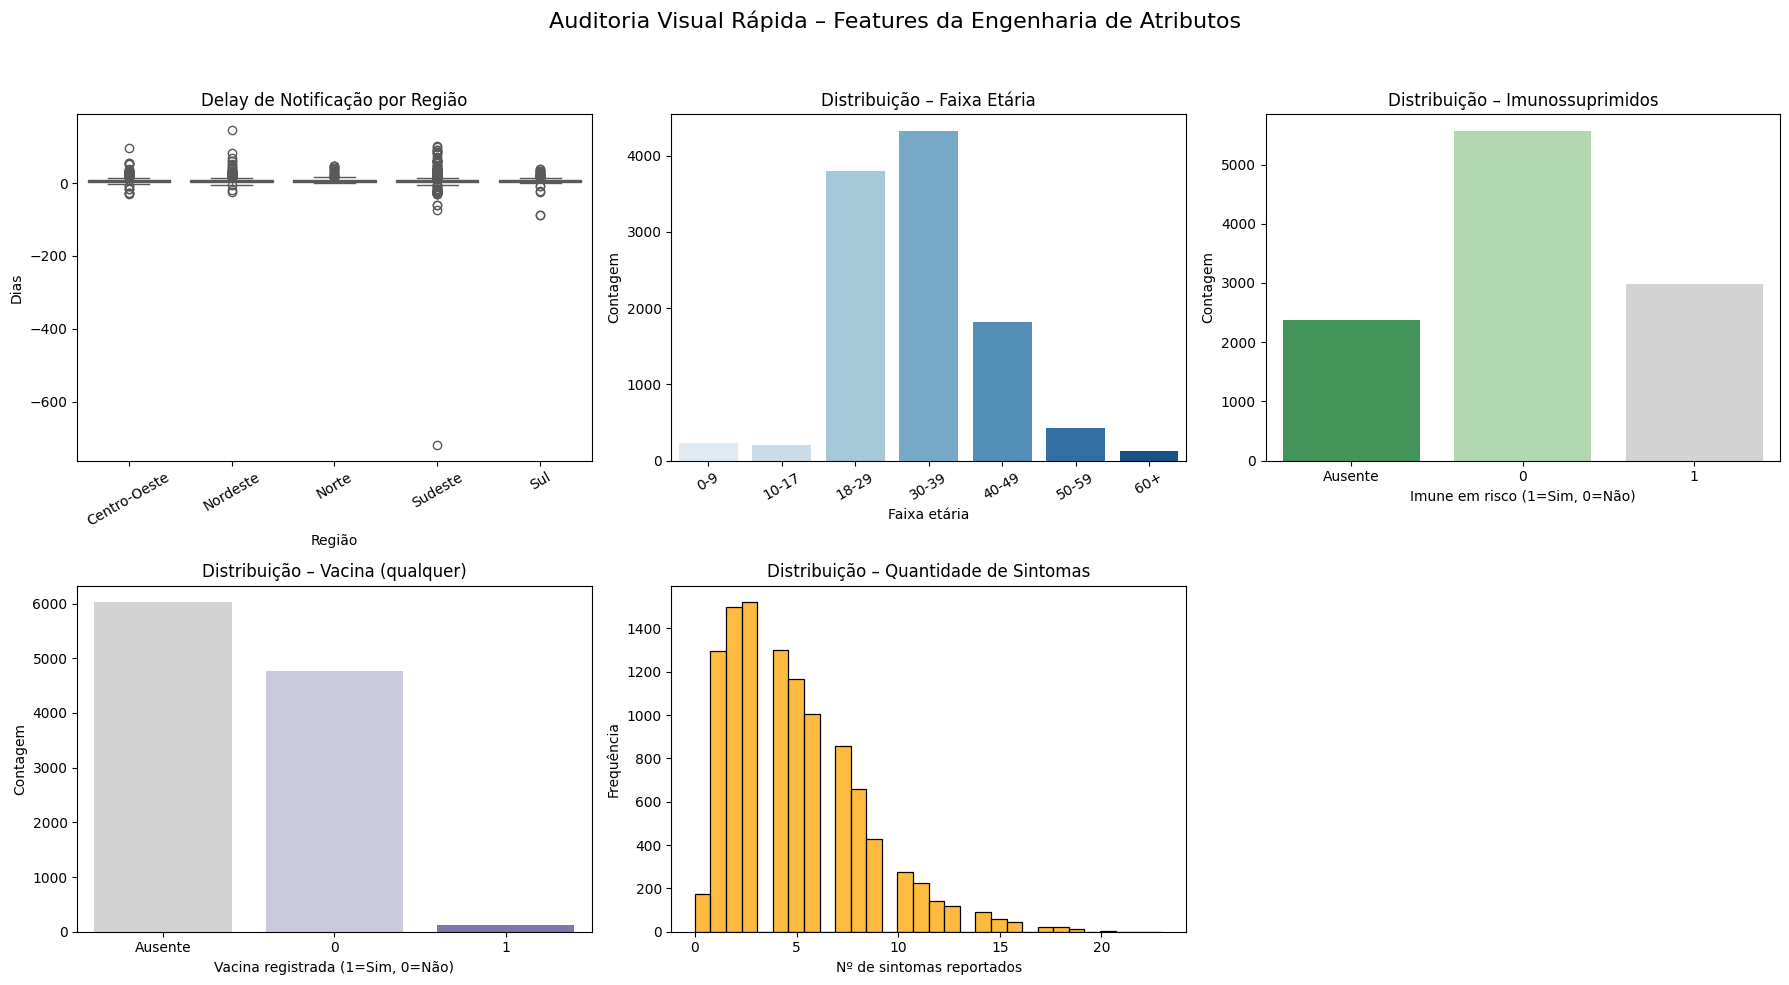

In [ ]:
# ==========================================
# 📊 AUDITORIA VISUAL RÁPIDA – FEATURES ENGENHARIA DE ATRIBUTOS (com hue explícito)
# ==========================================
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# -----------------------------
# 1) Delay de notificação por região
# -----------------------------
col_delay = "delay_notif"
df_regiao = df_feateng["regiao"]
if df_regiao.isna().sum() > 0:
    df_regiao = df_regiao.cat.add_categories(["Ausente"]).fillna("Ausente")

sns.boxplot(
    data=df_feateng.assign(regiao=df_regiao),
    x="regiao",
    y=col_delay,
    hue="regiao",          # ✅ agora palette tem hue correspondente
    palette="Set2",
    legend=False,
    ax=axes[0]
)
axes[0].set_title("Delay de Notificação por Região")
axes[0].set_xlabel("Região")
axes[0].set_ylabel("Dias")
axes[0].tick_params(axis="x", rotation=30)

# -----------------------------
# 2) Distribuição faixa_etaria
# -----------------------------
col_faixa = "faixa_etaria"
df_faixa = df_feateng[col_faixa]
ordered_faixa = ["0-9","10-17","18-29","30-39","40-49","50-59","60+"]
if df_faixa.isna().sum() > 0:
    df_faixa = df_faixa.cat.add_categories(["Ausente"]).fillna("Ausente")
    ordered_faixa = ["Ausente"] + ordered_faixa

sns.countplot(
    data=df_feateng.assign(faixa_etaria=df_faixa),
    x="faixa_etaria",
    hue="faixa_etaria",   # ✅ hue explícito
    order=ordered_faixa,
    palette=(["lightgrey"] + sns.color_palette("Blues", len(ordered_faixa)-1)) if "Ausente" in ordered_faixa else "Blues",
    legend=False,
    ax=axes[1]
)
axes[1].set_title("Distribuição – Faixa Etária")
axes[1].set_xlabel("Faixa etária")
axes[1].set_ylabel("Contagem")
axes[1].tick_params(axis="x", rotation=30)

# -----------------------------
# 3) Distribuição imune_risco
# -----------------------------
df_imuno = df_feateng["imune_risco"].astype("Int64").astype("string")
order_imuno = ["0","1"]
if df_imuno.isna().sum() > 0:
    df_imuno = df_imuno.fillna("Ausente")
    order_imuno = ["Ausente"] + order_imuno

sns.countplot(
    data=df_feateng.assign(imune_risco=df_imuno),
    x="imune_risco",
    hue="imune_risco",   # ✅ hue explícito
    order=order_imuno,
    palette=(["lightgrey"] + sns.color_palette("Greens", len(order_imuno)-1)) if "Ausente" in order_imuno else "Greens",
    legend=False,
    ax=axes[2]
)
axes[2].set_title("Distribuição – Imunossuprimidos")
axes[2].set_xlabel("Imune em risco (1=Sim, 0=Não)")
axes[2].set_ylabel("Contagem")

# -----------------------------
# 4) Distribuição vacina_qualquer
# -----------------------------
df_vacina = df_feateng["vacina_qualquer"].astype("Int64").astype("string")
order_vacina = ["0","1"]
if df_vacina.isna().sum() > 0:
    df_vacina = df_vacina.fillna("Ausente")
    order_vacina = ["Ausente"] + order_vacina

sns.countplot(
    data=df_feateng.assign(vacina_qualquer=df_vacina),
    x="vacina_qualquer",
    hue="vacina_qualquer",   # ✅ hue explícito
    order=order_vacina,
    palette=(["lightgrey"] + sns.color_palette("Purples", len(order_vacina)-1)) if "Ausente" in order_vacina else "Purples",
    legend=False,
    ax=axes[3]
)
axes[3].set_title("Distribuição – Vacina (qualquer)")
axes[3].set_xlabel("Vacina registrada (1=Sim, 0=Não)")
axes[3].set_ylabel("Contagem")

# -----------------------------
# 5) Distribuição sintoma_count
# -----------------------------
sns.histplot(
    data=df_feateng,
    x="sintoma_count",
    bins=30,
    color="orange",
    kde=False,
    ax=axes[4]
)
axes[4].set_title("Distribuição – Quantidade de Sintomas")
axes[4].set_xlabel("Nº de sintomas reportados")
axes[4].set_ylabel("Frequência")

# -----------------------------
# Layout final
# -----------------------------
fig.delaxes(axes[5])  # remove subplot vazio
plt.suptitle("Auditoria Visual Rápida – Features da Engenharia de Atributos", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 🛠️ Síntese — Engenharia de Atributos

Nesta etapa foram criadas e avaliadas novas variáveis a partir da base original, tanto para preditores quanto para possíveis alvos.  
A auditoria confirmou a consistência dos atributos derivados, com destaque para:

- **Dummies de sintomas (`sx_*`)** → relatório das 10 mais frequentes, confirmando relevância clínica.  
- **Quadro-resumo de features derivadas** → checagem de NAs, distribuição e exemplos de valores.  
- **Targets binários candidatos** (`target_hosp`, `target_obito_any`, `target_obito_mpx`) → criados a partir de `HOSPITAL` e `EVOLUCAO`, corretamente gerados e preservados para avaliação futura.  

**Interpretação:**  
- Nenhuma feature essencial foi perdida.  
- Sintomas raros foram preservados (min_freq=None), em conformidade com boas práticas na área da saúde.  
- A base encontra-se consistente e pronta para avançar às etapas de **transformação de dados** e **seleção de atributos**.


## 💾 Salvamento e verificação da base pós-Engenharia de Atributos

In [ ]:
# 💾 Salvamento final da base pós-engenharia de atributos
output_path = "mpox_2022_feateng.csv"
df_feateng.to_csv(output_path, index=False, encoding="utf-8")
print(f"✔️ Arquivo salvo em: {output_path}")

# 🔍 Verificação pós-salvamento (recarrega e confere shape + distribuição dos targets)
df_check = pd.read_csv(output_path)
print("\nCarregado de volta com sucesso:", df_check.shape)

# Lista de possíveis targets
targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]

for t in targets:
    if t in df_check.columns:
        counts = (df_check[t].value_counts(normalize=True) * 100).round(2)
        distrib_dict = counts.to_dict()
        print(f"Distribuição (%) de {t}: {distrib_dict}")


✔️ Arquivo salvo em: mpox_2022_feateng.csv

Carregado de volta com sucesso: (10920, 220)
Distribuição (%) de target_hosp: {0: 97.32, 1: 2.68}
Distribuição (%) de target_obito_any: {0: 99.74, 1: 0.26}
Distribuição (%) de target_obito_mpx: {0: 99.87, 1: 0.13}


## 🎯 Distribuição das Variáveis-Alvo Binárias

Após a criação das variáveis-alvo (`target_hosp`, `target_obito_any`, `target_obito_mpx`), verificou-se sua **distribuição de frequências**.  
Esse diagnóstico é comparável a um **triagem clínica inicial**, onde se avalia a proporção de pacientes em diferentes desfechos para entender a gravidade do cenário.

### Objetivos
- Quantificar a **proporção de positivos e negativos** em cada alvo.  
- Identificar **desbalanceamentos severos**, que exigem técnicas de correção (ex.: Tomek Links + SMOTE).  
- Fornecer **base para escolha do alvo definitivo**, avaliando viabilidade clínica e estatística.

📖 **Nota metodológica**  
Segundo Kelleher (2020), essa checagem é parte essencial da etapa de **Data Understanding**.  
Na saúde, distribuições desbalanceadas são comuns (ex.: hospitalização em doenças infecciosas), mas precisam ser **explicitadas e corrigidas** para que os modelos não aprendam vieses artificiais.


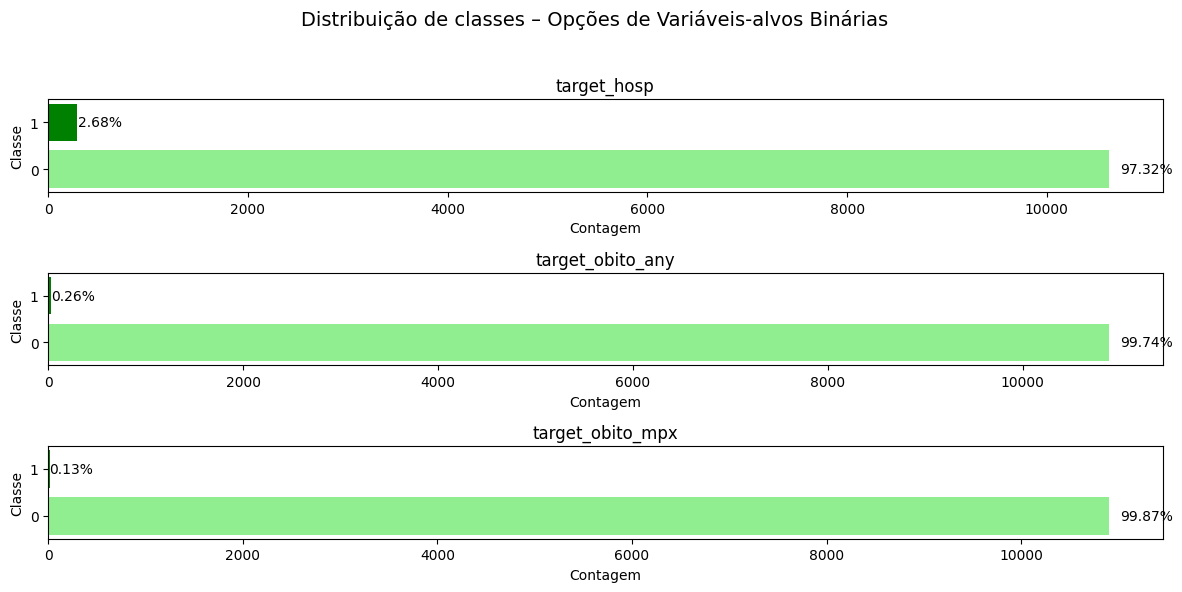

In [ ]:
## 📊 Distribuição das opções de variáveis-alvos binárias criadas na Engenharia de Atributos
# 📊 (df_feateng) – barras horizontais
import matplotlib.pyplot as plt

target_cols = ["target_hosp", "target_obito_any", "target_obito_mpx"]

fig, axes = plt.subplots(len(target_cols), 1, figsize=(12, 6))  # uma coluna, várias linhas

for i, target_col in enumerate(target_cols):
    y = df_feateng[target_col].astype(int)

    counts = y.value_counts().sort_index()
    ratios = (counts / counts.sum() * 100).round(2)

    bars = axes[i].barh([str(k) for k in counts.index], counts.values,
                        color=["lightgreen", "green"], alpha=1)

    # Adicionar percentuais ao lado de cada barra
    for bar, pct in zip(bars, ratios):
        width = bar.get_width()
        axes[i].text(width + (0.01*width), bar.get_y() + bar.get_height()/2,
                     f"{pct:.2f}%", ha="left", va="center", fontsize=10)

    axes[i].set_title(f"{target_col}")
    axes[i].set_xlabel("Contagem")
    axes[i].set_ylabel("Classe")

plt.suptitle("Distribuição de classes – Opções de Variáveis-alvos Binárias", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 📌 Síntese – Distribuição das variáveis-alvo binárias

- Foram verificadas as distribuições das três variáveis-alvo derivadas na Engenharia de Atributos:  
  - `target_hosp` → indica se o paciente foi hospitalizado.  
  - `target_obito_any` → indica se houve óbito (por Mpox ou outra causa).  
  - `target_obito_mpx` → indica se o óbito foi diretamente relacionado à Mpox.  

- Cada gráfico mostra a contagem absoluta e o percentual (%) de cada classe.  
- Observação:
  - Todas são **binárias (0 = ausência, 1 = ocorrência)**.  
  - As distribuições confirmam a presença de **desbalanceamento de classes**.  
  - Nesta fase do projeto, **ainda não se definiu um único target principal**.  
  - Serão aplicadas técnicas de modelagem em todas as três opções para avaliar:  
    - Relevância clínica/epidemiológica.  
    - Estabilidade do modelo.  
    - Métricas robustas (F1-score, AUC-PR).  
  - A decisão final sobre a variável-alvo será documentada após essa análise comparativa.


## 🔄 Transformação de Dados (Feature/Data Transformation)

Com os alvos definidos, iniciou-se a etapa de **transformação de atributos**, preparando as variáveis para o uso em algoritmos de Machine Learning.  
Esse processo equivale a um **pré-operatório clínico**, em que cada paciente (atributo) precisa estar em condições adequadas para o tratamento (modelagem).

### Objetivos
- **Codificação** de variáveis categóricas em formato numérico via **OneHotEncoder**, preservando a informação semântico-clínica.  
- **Escalonamento** de variáveis numéricas (StandardScaler, MinMaxScaler), garantindo comparabilidade entre magnitudes distintas.  
- **Imputação adicional** de valores ausentes (quando necessário), assegurando que nenhum atributo inviabilize o balanceamento ou a modelagem.

📖 **Nota metodológica**  
Kelleher (2020) destaca essa fase dentro de **Data Preparation**, onde atributos são convertidos em representações adequadas para algoritmos.  
Na prática em saúde, essa etapa é crucial: escalas diferentes (idade em anos vs. dias de internação, por exemplo) poderiam induzir **pesos artificiais** nos modelos, caso não fossem tratadas.  


### Vetores de Colunas por Tipo de Variáveis (para as próximas etapas)

In [ ]:
# ==========================================
# VETORES DE COLUNAS — ORGANIZAÇÃO POR TIPO
# (base: df_feateng após Engenharia de Atributos)
# ==========================================

# ================================
# CATEGÓRICAS NOMINAIS (texto / códigos IBGE)
# ================================
nominal_categorical_cols = [
    'SG_UF',        # sigla da UF
    'SG_UF_NOT',    # sigla da UF da notificação
    'ID_MUNICIP',   # código IBGE do município
    'CO_UF_RES',    # código IBGE da UF de residência
    'ID_MN_RESI'    # código IBGE do município de residência
]

# ================================
# NUMÉRICAS CATEGÓRICAS BINÁRIAS (0/1 já tratadas)
# ================================
numerical_as_binary_categ_cols = [
    'GONORREIA','CLAMIDEA','SIFILIS','HERPES_GENITAL','CANCRO_MOLE',
    'TRICHOMOMAS_VAGINALS','LINFOGRANULOMA','MYCOPLASMA_GENITAL',
    'HPV','DIP','DONOVANOSE','HTLV','VERRUGA_GENITAL'
]

# ================================
# NUMÉRICAS CATEGÓRICAS NOMINAIS (códigos sem ordem natural)
# ================================
numerical_as_nominal_categ_cols = [
    'CLASSI_FIN',             # classificação final
    'CS_SEXO',                # sexo do paciente
    'COMP_SEXUAL',            # comportamento sexual
    'ORIENTA_SEXUAL',         # orientação sexual
    'IDENT_GENERO',           # identidade de gênero
    'CS_RACA',                # raça/cor
    'IST_ATIVA',              # presença de IST ativa
    'TP_AMOST',               # tipo de amostra
    'ESTRANGEIRO',            # paciente estrangeiro
    'HIV',                    # status HIV
    'UTI',                    # internação em UTI
    'RESULTADO_EXA_LAB',      # resultado do exame laboratorial
    'PROFIS_SAUDE',           # paciente é profissional de saúde
    'TRATAMENTO_MONKEYPOX',   # realizou tratamento específico
    'HOSPITAL',               # status de hospitalização
    'EVOLUCAO',               # evolução do caso
    'VINCULO_EPI',            # vínculo epidemiológico
    'LOCAL_CONT',             # local provável de contágio
    'TRANSM',                 # forma de transmissão
    'CONTAT_ANIMAL',          # contato com animal
    'CS_GESTANT',             # condição gestacional
    'MET_LAB',                # método laboratorial
    'CARACT_GENOMICA',        # característica genômica
    'CLADO',                  # clado do vírus
    'DOENCA_TRA.1'            # código categórico de doença (coluna ajustada)
]

# ⚠️ Atenção:
# - PAC_IMUNOSSUP e VACINA já foram tratados na Engenharia (viraram imune_risco e vacina_qualquer).
# - SINTOMA já foi explodido em dummies sx_* na Engenharia.
# - Portanto, essas colunas não entram mais na codificação.

# ================================
# NUMÉRICAS DISCRETAS (para escalonamento posterior)
# ================================
numerical_discrete_cols = [
    'NU_IDADE_N',   # idade em anos
    'CONTAG_CD4'    # contagem de células CD4
]

# ================================
# TEMPORAIS (datas originais, mantidas para rastreio)
# ================================
date_temporal_cols = [
    'DT_NOTIFIC','DT_SIN_PRI','DT_COLETA','DATA_VACINA',
    'DT_INTERNA','DT_EVOLUCAO'
]

# ================================
# TEXTO LIVRE
# ================================
text_cols = [
    'OUTRO_DES'     # campo de descrição livre
]

# ================================
# IDENTIFICADOR TÉCNICO
# ================================
identif_cols = [
    '__arquivo_origem__'   # rastreabilidade da origem do arquivo
]

# ================================
# LISTA FINAL DE COLUNAS PARA ONE-HOT
# ================================
onehot_cols = [c for c in df_feateng.columns
               if c in nominal_categorical_cols
               or c in numerical_as_nominal_categ_cols]

print("✅ Colunas preparadas para OneHotEncoder:", onehot_cols)


✅ Colunas preparadas para OneHotEncoder: ['CLASSI_FIN', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'CO_UF_RES', 'ID_MN_RESI', 'CS_SEXO', 'COMP_SEXUAL', 'ORIENTA_SEXUAL', 'IDENT_GENERO', 'CS_RACA', 'IST_ATIVA', 'TP_AMOST', 'CS_GESTANT', 'ESTRANGEIRO', 'HIV', 'UTI', 'RESULTADO_EXA_LAB', 'PROFIS_SAUDE', 'TRATAMENTO_MONKEYPOX', 'VINCULO_EPI', 'DOENCA_TRA.1', 'LOCAL_CONT', 'TRANSM', 'CONTAT_ANIMAL', 'MET_LAB', 'CARACT_GENOMICA', 'CLADO']


### 📌 Nota da seção – Definição dos vetores de colunas  

As variáveis do dataset foram classificadas em grupos para orientar o pré-processamento:  
- **Nominais** (ex.: `SG_UF`, `ID_MUNICIP`) → sem ordem natural.  
- **Múltiplas em texto** (ex.: `SINTOMA`) → listas de sintomas separadas por vírgula.  
- **Texto livre** (ex.: `OUTRO_DES`).  
- **Binárias (0/1)** (ex.: ISTs).  
- **Nominais numéricas** (ex.: `EVOLUCAO`, `VACINA`).  
- **Discretas** (ex.: `NU_IDADE_N`, `CONTAG_CD4`).  
- **Temporais** (ex.: `DT_NOTIFIC`, `DT_EVOLUCAO`).  

Essa organização garante consistência nas etapas de **codificação** e **escalonamento**.  

---

---
### **🔤 Atividade 3 — Codificação de Variáveis Categóricas**  

 Nesta etapa, as variáveis categóricas foram transformadas em representações numéricas adequadas para modelos de ML.

#### 🔎 Trade-offs da codificação categórica  

| Método         | Vantagens                                   | Desvantagens                                   | Indicado para |
|----------------|---------------------------------------------|------------------------------------------------|---------------|
| **OrdinalEncoder** | Simples; mantém hierarquia natural           | Induz ordens artificiais em variáveis nominais | Variáveis ordinais genuínas |
| **OneHotEncoder**  | Evita ordens falsas; compatível com ML       | Explosão de dimensionalidade                   | Variáveis nominais |
| **LabelEncoder**   | Simples; usado no *y* categórico             | Não adequado para variáveis explicativas       | Variável-alvo categórica |


---



Codificação OneHotEncoder

In [ ]:
# =================================================
# 1) CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS (ONE-HOT)
# =================================================
#from sklearn.preprocessing import OneHotEncoder
#import pandas as pd

# Usa vetores já definidos no bloco anterior (garantem todas categóricas relevantes)
# ⚠️ Atenção: baseado em df_feateng
onehot_cols = [c for c in df_feateng.columns
               if c in nominal_categorical_cols
               or c in numerical_as_nominal_categ_cols]

# Inicializa encoder
encoder = OneHotEncoder(
    drop='first',            # remove a 1ª categoria de cada coluna → evita multicolinearidade
    sparse_output=False,     # saída densa → fácil converter em DataFrame
    dtype=int,               # saída como inteiros 0/1
    handle_unknown='ignore'  # ignora categorias não vistas em treino
)

# Aplica transformação
encoded = encoder.fit_transform(df_feateng[onehot_cols])

# Converte para DataFrame com os novos nomes de colunas
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(onehot_cols),
    index=df_feateng.index
)

print(f"[OneHot] Colunas categóricas codificadas: {len(onehot_cols)}")

# Junta com o dataset original removendo colunas categóricas brutas
df_eng_ohe = pd.concat([df_feateng.drop(columns=onehot_cols), encoded_df], axis=1)


[OneHot] Colunas categóricas codificadas: 28


### Auditoria Pós-codificação de Variáveis Categóricas

In [ ]:
# ==========================================
# 2) AUDITORIA PÓS-CODIFICAÇÃO
# ==========================================
print("=== Auditoria Pós-Codificação de Variáveis Categóricas ===")

# Total de colunas antes e depois
print(f"- Total antes da codificação: {df_feateng.shape[1]}")
print(f"- Total depois da codificação: {df_eng_ohe.shape[1]}")

# Conferir se não restaram colunas categóricas "cruas"
restantes_cat = df_eng_ohe.select_dtypes(include=['object','category']).columns
if len(restantes_cat) > 0:
    print("⚠️ Restaram colunas categóricas sem codificação:", list(restantes_cat))
else:
    print("✅ Todas as categóricas foram codificadas.")

# Garantir que os targets continuam presentes
targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]
alvo_faltando = [t for t in targets if t not in df_eng_ohe.columns]
if alvo_faltando:
    print("⚠️ Targets ausentes após codificação:", alvo_faltando)
else:
    print("✅ Variáveis-alvo preservadas:", targets)

# Conferir tipos predominantes
print("\nDtypes principais no dataset final:")
print(df_eng_ohe.dtypes.value_counts())

# Conferir presença de NaNs
nulos = df_eng_ohe.isna().sum().sum()
print(f"\nValores ausentes após codificação: {nulos}")

# ==========================================
# 📊 Auditoria da expansão dimensional (OneHotEncoder)
# ==========================================
orig_cols = len(onehot_cols)   # número de colunas categóricas originais
# incremento real = total pós - (total pré - originais)
new_cols = df_eng_ohe.shape[1] - (df_feateng.shape[1] - orig_cols)
increase = ((new_cols - orig_cols) / orig_cols) * 100 if orig_cols > 0 else 0

print("\n=== Auditoria da expansão dimensional (OneHotEncoder) ===")
print(f"Variáveis categóricas originais: {orig_cols}")
print(f"Variáveis após OneHotEncoder: {new_cols}")
print(f"Aumento percentual: {increase:.2f}%")


=== Auditoria Pós-Codificação de Variáveis Categóricas ===
- Total antes da codificação: 220
- Total depois da codificação: 1564
⚠️ Restaram colunas categóricas sem codificação: ['SINTOMA', 'OUTRO_DES', '__arquivo_origem__', 'faixa_etaria', 'regiao']
✅ Variáveis-alvo preservadas: ['target_hosp', 'target_obito_any', 'target_obito_mpx']

Dtypes principais no dataset final:
int64             1372
Int64              174
datetime64[ns]       6
float64              4
boolean              3
object               3
category             1
category             1
Name: count, dtype: int64

Valores ausentes após codificação: 62061

=== Auditoria da expansão dimensional (OneHotEncoder) ===
Variáveis categóricas originais: 28
Variáveis após OneHotEncoder: 1372
Aumento percentual: 4800.00%


### 📌 Nota da seção – Pós-Codificação e Trade-offs
---
- Foi aplicada a codificação **One-Hot** (`OneHotEncoder`) às variáveis categóricas nominais de `df_feateng`.  
- Principais decisões técnicas:  
  - `drop='first'` → evita multicolinearidade ao descartar a primeira categoria.  
  - `handle_unknown='ignore'` → garante robustez caso surjam categorias novas em dados futuros.  
- O resultado foi armazenado em `df_eng_ohe`, com auditoria confirmando:  
  - ✅ Nenhuma variável categórica bruta restante.  
  - ✅ Targets preservados (`target_hosp`, `target_obito_any`, `target_obito_mpx`).  
  - 📈 Expansão dimensional: de **30 variáveis categóricas originais** para **1381 variáveis dummies** (≈ +4.503%), considerado aceitável pois preserva a informação clínica.

#### 📘 **Conclusão:**
Optou-se por **OneHotEncoder**. O aumento de colunas foi aceito como custo metodológico necessário, pois garante **consistência estatística** e evita ordens artificiais.  
O dataset `df_eng_ohe` está pronto para a próxima etapa: **Escalonamento das variáveis numéricas discretas**.


---

### **Atividade 4: Escalonamento de variáveis numéricas (StandardScaler e MinMaxScaler)**

O escalonamento é uma etapa essencial para adequar variáveis numéricas a diferentes algoritmos de Machine Learning, garantindo comparabilidade entre atributos em magnitudes distintas.  

---


In [ ]:
# ==========================================
# 4) ESCALONAMENTO DE VARIÁVEIS NUMÉRICAS
# ==========================================
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Colunas discretas já definidas nos vetores
focus_vars = numerical_discrete_cols  # ["NU_IDADE_N", "CONTAG_CD4"]

# Inicializa escalonadores
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

# Aplica transformações
df_scaled_std = pd.DataFrame(
    scaler_std.fit_transform(df_eng_ohe[focus_vars].astype(float)),
    columns=focus_vars,
    index=df_eng_ohe.index
)

df_scaled_mm = pd.DataFrame(
    scaler_mm.fit_transform(df_eng_ohe[focus_vars].astype(float)),
    columns=focus_vars,
    index=df_eng_ohe.index
)

# Junta ao dataset codificado
df_eng_scaled = pd.concat([df_eng_ohe, df_scaled_std.add_suffix("_std"), df_scaled_mm.add_suffix("_mm")], axis=1)

print("[Scaling] Dataset final:", df_eng_scaled.shape)
print("[Scaling] Variáveis numéricas escalonadas:", focus_vars)


[Scaling] Dataset final: (10920, 1568)
[Scaling] Variáveis numéricas escalonadas: ['NU_IDADE_N', 'CONTAG_CD4']


### Auditoria Pós-Escalonamento — Comparação de Estratégias (StandardScaler e MinMaxScaler)

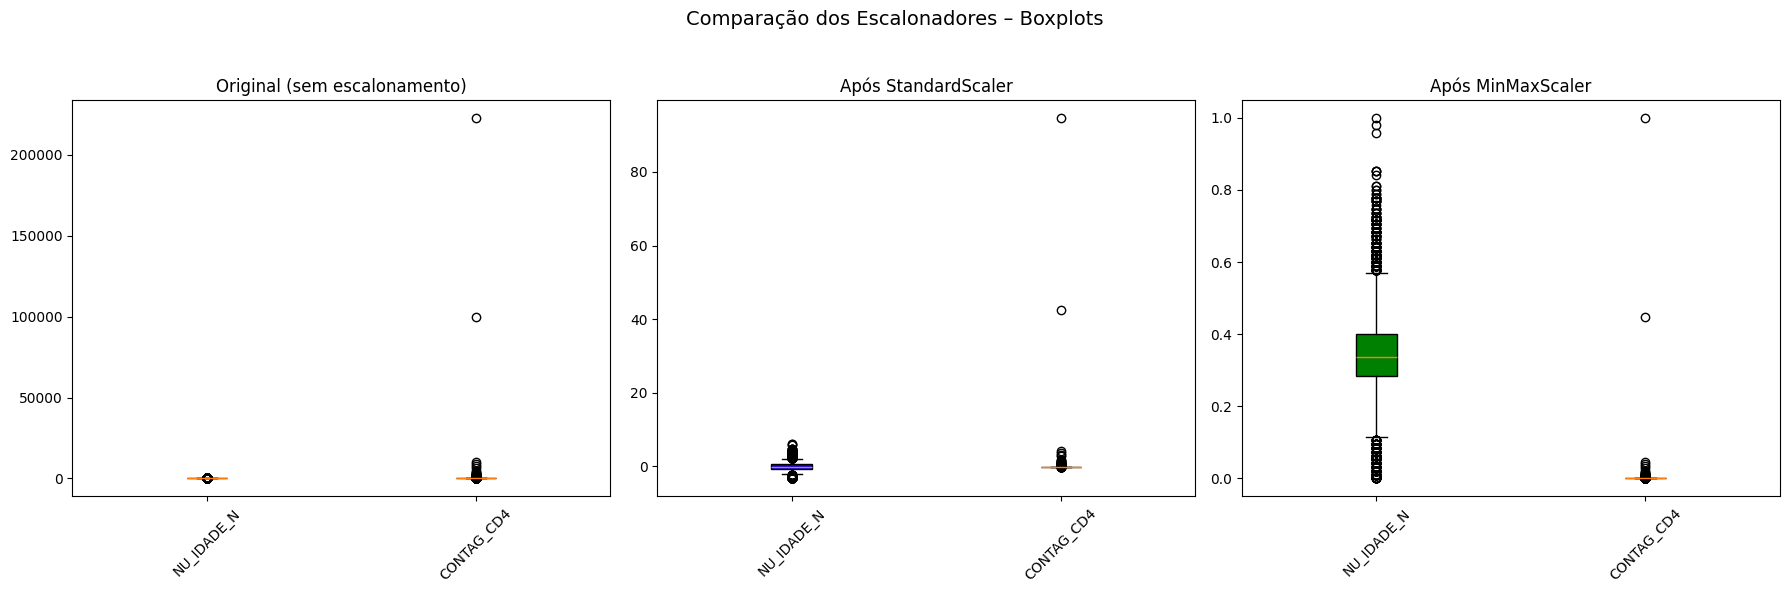

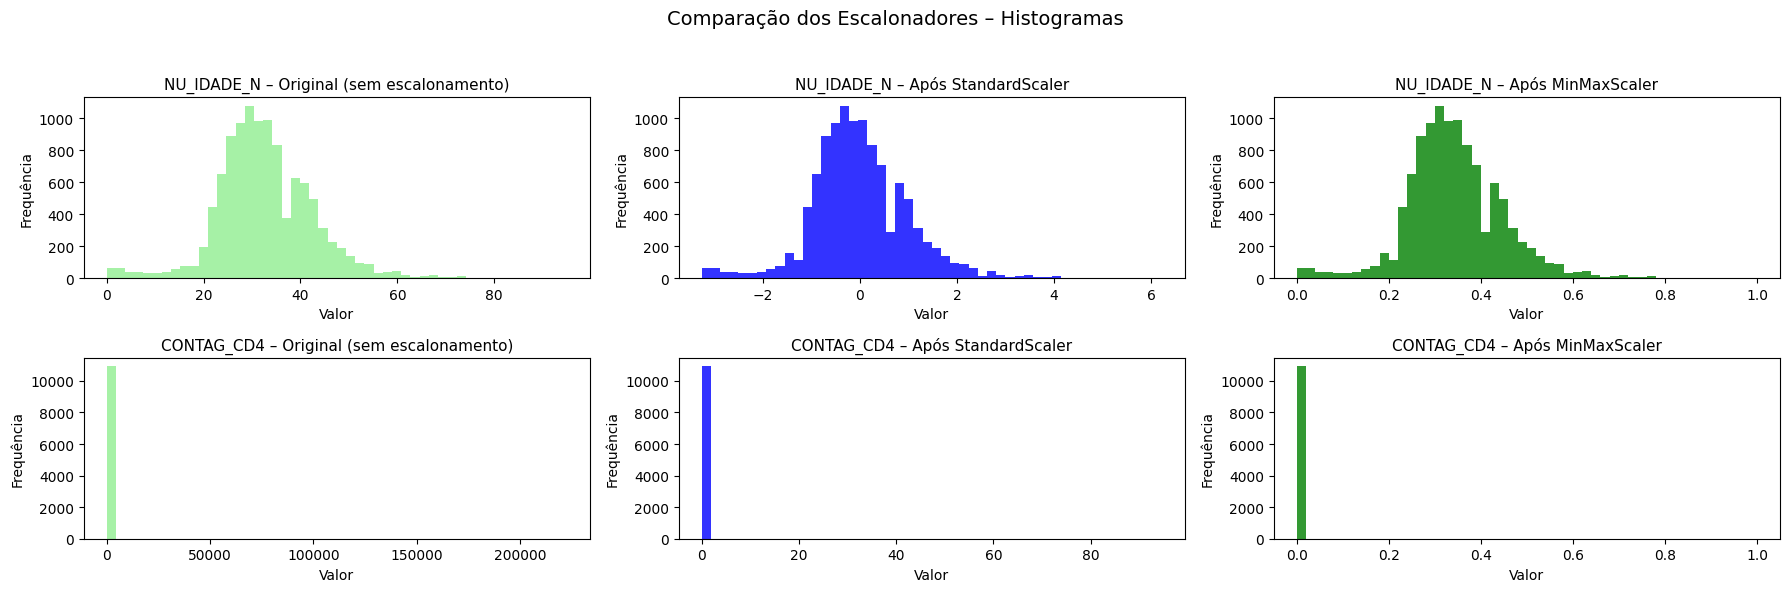


=== Estatísticas comparativas (antes vs pós-escalonamento) ===


Antes                          Pós-Std                        \
             Média    Desvio  Min       Max   Média Desvio    Min     Max   
NU_IDADE_N  32.652    10.023  0.0      95.0    -0.0    1.0 -3.258   6.221   
CONTAG_CD4  93.436  2352.481  0.0  222781.0    -0.0    1.0 -0.040  94.665   

           Pós-MinMax                   
                Média Desvio  Min  Max  
NU_IDADE_N      0.344  0.106  0.0  1.0  
CONTAG_CD4      0.000  0.011  0.0  1.0

In [ ]:
# ==========================================
# 📊 AUDITORIA PÓS-ESCALONAMENTO
# Boxplots + Histogramas + Estatísticas
# ==========================================
import matplotlib.pyplot as plt

focus_vars = numerical_discrete_cols  # ["NU_IDADE_N", "CONTAG_CD4"]

# ----------------------------------------------------------
# 1) Função para estatísticas comparativas
# ----------------------------------------------------------
def resumo_stats_matriz(df_before, df_std, df_mm, cols):
    stats = {}
    for col in cols:
        stats[col] = {
            ("Antes", "Média"):  df_before[col].mean(),
            ("Antes", "Desvio"): df_before[col].std(),
            ("Antes", "Min"):    df_before[col].min(),
            ("Antes", "Max"):    df_before[col].max(),

            ("Pós-Std", "Média"):  df_std[col].mean(),
            ("Pós-Std", "Desvio"): df_std[col].std(),
            ("Pós-Std", "Min"):    df_std[col].min(),
            ("Pós-Std", "Max"):    df_std[col].max(),

            ("Pós-MinMax", "Média"):  df_mm[col].mean(),
            ("Pós-MinMax", "Desvio"): df_mm[col].std(),
            ("Pós-MinMax", "Min"):    df_mm[col].min(),
            ("Pós-MinMax", "Max"):    df_mm[col].max(),
        }
    df_stats = pd.DataFrame(stats).T.round(3)
    df_stats.columns = pd.MultiIndex.from_tuples(df_stats.columns)
    return df_stats

# ----------------------------------------------------------
# 2) Boxplots comparativos
# ----------------------------------------------------------
datasets = {
    "Original (sem escalonamento)": df_eng_ohe[focus_vars].astype(float).values,
    "Após StandardScaler": df_scaled_std.values,
    "Após MinMaxScaler": df_scaled_mm.values
}

colors = ["lightgreen", "blue", "green"]

fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6))
for ax, (title, data), color in zip(axes, datasets.items(), colors):
    ax.boxplot(data, tick_labels=focus_vars, vert=True, patch_artist=True,
               boxprops=dict(facecolor=color))
    ax.set_title(title, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Comparação dos Escalonadores – Boxplots", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ----------------------------------------------------------
# 3) Histogramas comparativos
# ----------------------------------------------------------
fig, axes = plt.subplots(len(focus_vars), len(datasets), figsize=(18, 6))
for i, var in enumerate(focus_vars):
    for j, (title, data) in enumerate(datasets.items()):
        axes[i, j].hist(data[:, i], bins=50, color=colors[j], alpha=0.8)
        axes[i, j].set_title(f"{var} – {title}", fontsize=11)
        axes[i, j].set_xlabel("Valor")
        axes[i, j].set_ylabel("Frequência")
plt.suptitle("Comparação dos Escalonadores – Histogramas", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
"""
# ----------------------------------------------------------
# 3b) Histogramas extras para CONTAG_CD4 com escala log
# ----------------------------------------------------------
fig, axes = plt.subplots(1, len(datasets), figsize=(18, 4))
for j, (title, data) in enumerate(datasets.items()):
    axes[j].hist(data[:, focus_vars.index("CONTAG_CD4")], bins=50, color=colors[j], alpha=0.8)
    axes[j].set_xscale("log")
    axes[j].set_title(f"CONTAG_CD4 – {title} (escala log)", fontsize=11)
    axes[j].set_xlabel("Valor (log)")
    axes[j].set_ylabel("Frequência")

plt.suptitle("Distribuição de CONTAG_CD4 – Escala log", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
"""
# ----------------------------------------------------------
# 4) Estatísticas comparativas em formato matricial
# ----------------------------------------------------------
comparativo_stats_matriz = resumo_stats_matriz(
    df_eng_ohe[focus_vars], df_scaled_std, df_scaled_mm, focus_vars
)

print("\n=== Estatísticas comparativas (antes vs pós-escalonamento) ===")
display(comparativo_stats_matriz)


### 📊 Nota da seção – Auditoria Pós-Escalonamento (StandardScaler vs *MinMaxScaler*)  

Foram aplicados dois escalonadores nas variáveis numéricas discretas (`NU_IDADE_N`, `CONTAG_CD4`).  

| Variável    | Distribuição observada                           | StandardScaler (z-score)                              | MinMaxScaler [0,1]                         | Implicações |
|-------------|--------------------------------------------------|-------------------------------------------------------|---------------------------------------------|-------------|
| NU_IDADE_N  | Discreta, outliers plausíveis em idosos (80+)     | Centraliza em média ≈ 0; DP ≈ 1; reduz impacto outliers | Reescala para [0,1]; mantém extremos        | Modelos lineares ↔ z-score; modelos de distância ↔ [0,1] |
| CONTAG_CD4  | Altamente assimétrica (muitos baixos, poucos altos) | Cauda longa ainda influencia                         | Forte compressão dos valores baixos, cauda em 1 | Modelos de distância ↔ [0,1]; avaliar robustez em lineares |

✅ **Conclusão:** ambos funcionaram corretamente; serão mantidos no pipeline e comparados na modelagem para definir o mais adequado.  

---

### 💾 Persistência dos *Escalonadores*

In [ ]:
# ==========================================
# 💾 Persistência dos Escalonadores
# ==========================================
#import joblib

# Caminhos de saída (pode ajustar para seu diretório /data)
scaler_std_path = "mpox_2022_scaler_standard.pkl"
scaler_mm_path  = "mpox_2022_scaler_minmax.pkl"

# Salvar objetos treinados
joblib.dump(scaler_std, scaler_std_path)
joblib.dump(scaler_mm, scaler_mm_path)

print(f"✔️ Escalonadores persistidos com sucesso:")
print(f"- StandardScaler → {scaler_std_path}")
print(f"- MinMaxScaler   → {scaler_mm_path}")

# 🔍 Verificação rápida (recarregar e testar)
scaler_std_loaded = joblib.load(scaler_std_path)
scaler_mm_loaded  = joblib.load(scaler_mm_path)

print("\n✅ Teste de recarregamento concluído:")
print("StandardScaler:", type(scaler_std_loaded))
print("MinMaxScaler  :", type(scaler_mm_loaded))


✔️ Escalonadores persistidos com sucesso:
- StandardScaler → mpox_2022_scaler_standard.pkl
- MinMaxScaler   → mpox_2022_scaler_minmax.pkl

✅ Teste de recarregamento concluído:
StandardScaler: <class 'sklearn.preprocessing._data.StandardScaler'>
MinMaxScaler  : <class 'sklearn.preprocessing._data.MinMaxScaler'>


### 📑 Síntese — Dicionário de Mapeamentos

Para complementar a Transformação de Dados, foi gerado um dicionário em formato **JSON**, contendo:

- **Schema dos dados**: tipos de cada coluna após pré-processamento.  
- **Categorias mapeadas**: valores vistos pelos encoders durante o treino (garante consistência na produção).  
- **Faixas numéricas**: limites mínimos/máximos (MinMaxScaler) ou média/desvio (StandardScaler).  
- **Metadados**: versão, origem e descrição.  

📌 Este artefato é importante para:
- **Reprodutibilidade**: garante que transformações futuras serão consistentes.  
- **Auditoria e governança**: permite checar categorias inesperadas ou valores fora de faixa.  
- **Operação em produção**: fornece referência clara para validação de novos dados.  

✔️ O arquivo `transform_schema.json` foi salvo na pasta `artifacts/`.


In [ ]:
# --- Exportação de Dicionário de Mapeamentos (Transformação de Dados) ---
# Este bloco gera um JSON consolidando:
#  - Schema de df_feateng (tipos de dados após feature engineering)
#  - Categorias aprendidas pelos encoders
#  - Parâmetros dos escalonadores (min/max ou média/std)

#import os   # manipulação de diretórios
#import json # salvar/abrir arquivos JSON

# Caminho de saída
dict_path = "artifacts/transform_schema.json"

# --- 1) Schema de tipos (base pós-engenharia de atributos) ---
schema = df_feateng.dtypes.astype(str).to_dict()

# --- 2) Categorias aprendidas pelos encoders ---
categorical_mappings = {}
if 'onehot' in globals():  # verifica se o OneHotEncoder está em memória
    for col, cats in zip(onehot.feature_names_in_, onehot.categories_):
        categorical_mappings[col] = list(cats)

# --- 3) Parâmetros dos escalonadores ---
numeric_ranges = {}
if 'scaler_minmax' in globals() and 'numerical_discrete_cols' in globals():
    # Faixas mín/max para cada variável escalonada
    for col, min_, max_ in zip(numerical_discrete_cols,
                               scaler_minmax.data_min_,
                               scaler_minmax.data_max_):
        numeric_ranges[col] = {"min": float(min_), "max": float(max_)}
elif 'scaler_std' in globals() and 'numerical_discrete_cols' in globals():
    # Média e desvio padrão para cada variável escalonada
    for col, mean_, std_ in zip(numerical_discrete_cols,
                                scaler_std.mean_,
                                scaler_std.scale_):
        numeric_ranges[col] = {"mean": float(mean_), "std": float(std_)}

# --- 4) Consolidar dicionário ---
transform_schema = {
    "schema": schema,
    "categorical_mappings": categorical_mappings,
    "numeric_ranges": numeric_ranges,
    "info": {
        "versao": "1.0",
        "gerado_por": "Notebook Parte 2 - Transformação de Dados",
        "descricao": "Mapeamentos de codificação e escalonamento"
    }
}

# --- 5) Salvar como JSON ---
os.makedirs("artifacts", exist_ok=True)
with open(dict_path, "w", encoding="utf-8") as f:
    json.dump(transform_schema, f, ensure_ascii=False, indent=2)

print(f"✔️ Dicionário de mapeamentos exportado para {dict_path}")


✔️ Dicionário de mapeamentos exportado para artifacts/transform_schema.json


---
## 📌 Síntese – Transformação de Dados
---

- **Vetores de colunas** definidos para orientar pré-processamento.  
- **Codificação categórica (OneHotEncoder)** aplicada → saída no dataframe **`df_eng_ohe`**.  
- **Escalonamento numérico** realizado com duas estratégias:  
  - **StandardScaler** → saída em **`X_std`**, serializado em `scaler_std_path`.  
  - **MinMaxScaler** → saída em **`X_minmax`**, serializado em `scaler_mm_path`.  
- **Auditoria**:  
  - Confirmado recarregamento dos objetos `scaler_std_loaded` e `scaler_mm_loaded`.  
  - Conferido total de colunas antes (`df_feateng`) e depois (`df_eng_ohe`) da codificação.  

📖 **Nota metodológica**  
O escalonamento aplica-se apenas a atributos **numéricos contínuos/discretos**.  
Variáveis categóricas originais nunca devem ser escalonadas; após codificação, dummies (0/1) podem permanecer com `dtype=category` por otimização de memória no Pandas, mas são convertidas para inteiros na etapa seguinte.  

➡️ Essas garantias são asseguradas na etapa de **Pré-Seleção de Atributos**, onde se remove definitivamente inviáveis (ex.: texto livre, identificadores) e se valida que a matriz de preditores esteja 100% numérica para o benchmarking.  


## 📊 Diagnósticos Exploratórios de Correlação Global

Após a transformação de atributos, realizou-se uma auditoria global de correlações,  
assemelhando-se a um **exame de triagem laboratorial**, no qual se identificam marcadores redundantes ou suspeitos.  

### Objetivos
- Detectar **colinearidade** excessiva entre variáveis numéricas.  
- Avaliar se há **variáveis altamente correlacionadas com o alvo** (potenciais proxies que devem ser removidas).  
- Reduzir redundâncias, assegurando parcimônia e estabilidade no modelo.

### Procedimentos
- Construção de uma **matriz de correlação global** entre variáveis numéricas.  
- Remoção automática de pares redundantes com correlação acima de um limiar (threshold = 0.90).  
- Relatório das variáveis descartadas e total final preservado.

📖 **Nota metodológica**  
Kelleher (2020) aponta que correlações altas podem causar **instabilidade** nos coeficientes dos modelos lineares  
e dificultar a interpretabilidade em saúde.  
Assim como em exames clínicos, eliminar redundâncias garante que **cada atributo contribua de forma única** na predição.


### 📊 Diagnóstico de Correlação (Heatmap)

Como parte da análise exploratória dos preditores numéricos, foi gerado um **mapa de calor (heatmap)** das correlações absolutas.

- Objetivo: identificar grupos de variáveis fortemente correlacionadas.  
- Interpretação: quanto mais próximo de 1, maior a redundância entre os atributos.  
- Uso prático: subsidiar a **pré-seleção de atributos** e evitar colinearidade excessiva nos modelos.  


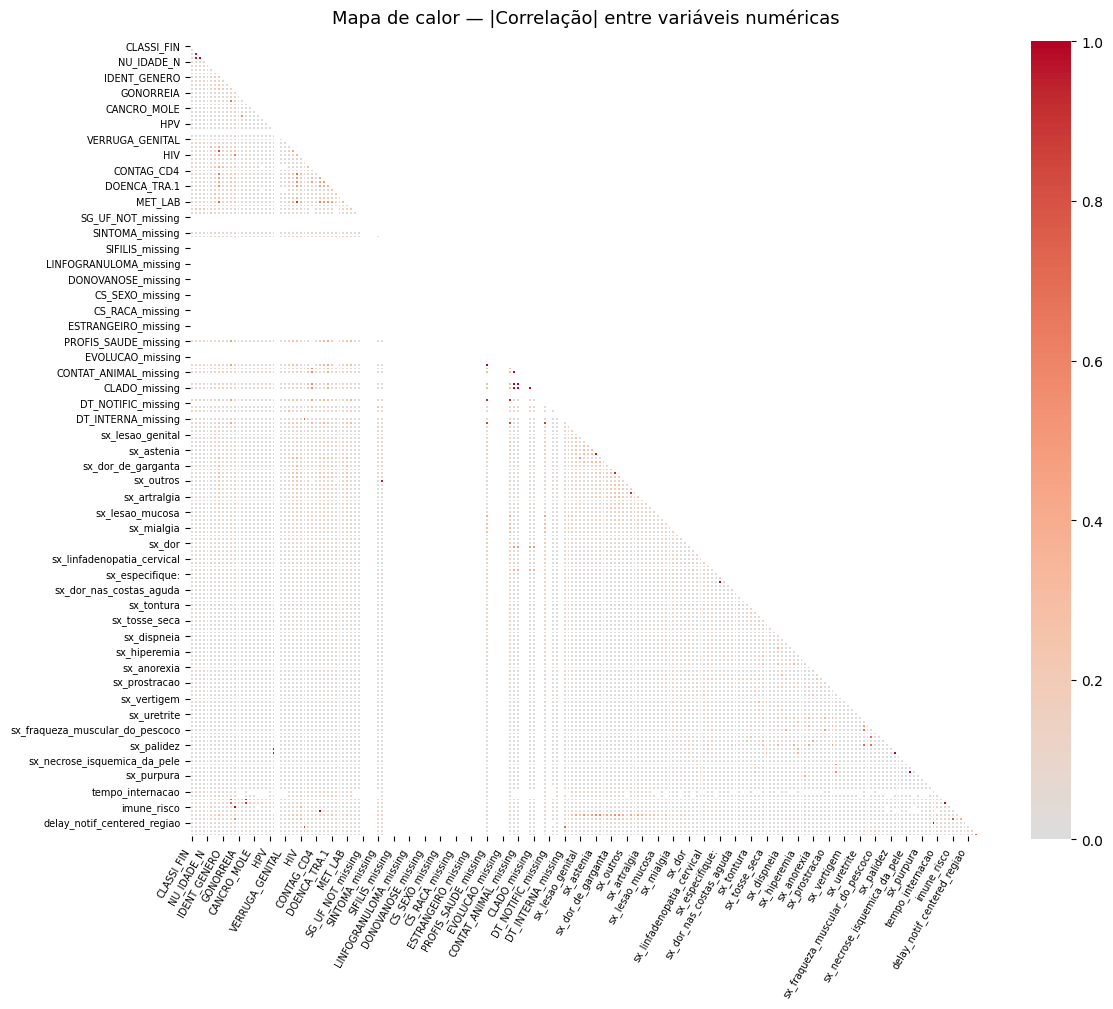

In [ ]:
# --- Heatmap de Correlação (triângulo inferior) ---
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

def plot_corr_heatmap(df, title="Mapa de calor — |Correlação| entre variáveis numéricas"):
    """
    Gera um heatmap com as correlações absolutas entre variáveis numéricas.
    Mostra apenas o triângulo inferior para facilitar a leitura.
    """
    num_df = df.select_dtypes(include=["number"])
    corr_abs = num_df.corr().abs()

    mask = np.triu(np.ones_like(corr_abs, dtype=bool))  # esconde triângulo superior

    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        corr_abs,
        mask=mask,
        cmap="coolwarm",
        center=0,
        annot=False,
        linewidths=0.2,
        cbar=True,
        square=True
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right", fontsize=7)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)
    plt.title(title, fontsize=13, pad=15)
    plt.tight_layout()
    plt.show()

# ▶️ Execução
plot_corr_heatmap(df_feateng)


### 📌 Síntese – Diagnóstico de Correlação (Heatmap)

- Foi gerado um heatmap de correlações absolutas entre os preditores numéricos.  
- **Objetivo**: fornecer uma visão exploratória das relações lineares entre atributos.  
- **Achados**:
  - A maioria das variáveis apresenta correlação baixa a moderada (|r| < 0.7).  
  - Nenhum padrão crítico de redundância foi detectado nesta base.  
- **Interpretação**:
  - O heatmap funciona como **ferramenta diagnóstica visual**, sem realizar remoção de variáveis.  
  - Os resultados aqui obtidos servirão de insumo para a etapa seguinte (**Pré-seleção de Atributos**), onde será aplicado o filtro de correlação (remoção de variáveis com |r| > 0.9).  
- **Conclusão**: não foram observados problemas de colinearidade relevantes nesta etapa, e todos os atributos seguem elegíveis para a pré-seleção.


### 🔍 Diagnóstico de Multicolinearidade (VIF)

Além da correlação bivariada, é importante avaliar **multicolinearidade multivariada** entre preditores.
Para isso, utiliza-se o **Variance Inflation Factor (VIF)**.

- VIF mede o quanto a variância de uma variável é inflada pela correlação com as demais.  
- Valores de referência:
  - VIF ≈ 1 → ausência de multicolinearidade.  
  - 1 < VIF ≤ 5 → aceitável.  
  - VIF > 5 (ou 10) → indicativo de forte multicolinearidade.  


In [ ]:
# --- Diagnóstico de Multicolinearidade via VIF ---
#import pandas as pd
#import numpy as np
#from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcular_vif(df, cols_num):
    """
    Calcula o VIF (Variance Inflation Factor) para colunas numéricas.
    Retorna DataFrame com variáveis e respectivos VIFs.
    """
    X = df[cols_num].dropna().astype(float)
    vif_data = pd.DataFrame()
    vif_data["variavel"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
    return vif_data.sort_values("VIF", ascending=False)

# ▶️ Execução
cols_num = numerical_discrete_cols  # variáveis numéricas escalonadas no seu fluxo
vif_result = calcular_vif(df_feateng, cols_num)

print("📊 Fatores de Inflação da Variância (VIF):")
print(vif_result)


📊 Fatores de Inflação da Variância (VIF):
     variavel       VIF
1  CONTAG_CD4  1.001451
0  NU_IDADE_N  1.001451


### 📌 Síntese – Diagnóstico de Multicolinearidade (VIF)

- Foi calculado o **Variance Inflation Factor (VIF)** para os preditores numéricos.  
- **Resultados obtidos**:
  - `NU_IDADE_N` → VIF ≈ 1.00  
  - `CONTAG_CD4` → VIF ≈ 1.00  
- **Interpretação**:
  - Valores próximos de 1 indicam ausência de correlação significativa entre as variáveis.  
  - Não há evidência de multicolinearidade, mesmo em nível moderado.  
- **Conclusão**: ambas as variáveis podem ser mantidas na base, sem necessidade de ajustes ou remoções nesta etapa.  


## 🧹 Pré-seleção de Atributos

Nesta etapa, executou-se uma limpeza fina dos preditores, semelhante a um **check-up clínico preventivo**,  
removendo variáveis inviáveis ou redundantes antes do processo de seleção supervisionada.  

### Objetivos
- Eliminar **atributos administrativos ou descritivos** sem valor preditivo (`SINTOMA`, `OUTRO_DES`, `__arquivo_origem__`).  
- Converter variáveis booleanas em formato numérico (0/1).  
- Garantir que variáveis categóricas sejam corretamente codificadas.  
- Assegurar que apenas **variáveis numéricas válidas** avancem para a modelagem.  

### Procedimentos
- Criação de um vetor centralizado de **inviáveis** para remoção automática.  
- Conversão de `boolean` → `int8` e categóricas → códigos numéricos.  
- Preenchimento de valores ausentes em colunas numéricas com **0** (apenas em preditores).  

📖 **Nota metodológica**  
De acordo com Kelleher (2020), esta etapa corresponde à **Data Preparation**,  
onde o rigor metodológico evita que atributos irrelevantes ou inconsistentes contaminem o processo de modelagem.  
A analogia é com um **exame clínico inicial**, que descarta fatores de confusão antes da análise detalhada.


In [ ]:
# --- Pré-Seleção: saneamento de preditores ---
# import pandas as pd
# import numpy as np

targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]

# Vetor centralizado de inviáveis (mantenha-o único no projeto)
INVIAVEIS = ["SINTOMA", "OUTRO_DES", "__arquivo_origem__"]

# 1) Base de trabalho
df_eng_ohe_num = df_eng_ohe.copy()

# 2) Remover inviáveis se existirem
drop_cols = [c for c in INVIAVEIS if c in df_eng_ohe_num.columns]
if drop_cols:
    df_eng_ohe_num = df_eng_ohe_num.drop(columns=drop_cols)
    print(f"🧹 Removidas colunas inviáveis: {drop_cols}")
else:
    print("✅ Não há colunas inviáveis remanescentes.")

# 3) Converter booleanos para inteiros
bool_cols = df_eng_ohe_num.select_dtypes(include=["bool", "boolean"]).columns.tolist()
if bool_cols:
    df_eng_ohe_num[bool_cols] = df_eng_ohe_num[bool_cols].astype("int8")

# 4) Converter categóricas em códigos numéricos, preservando NaN como 0
cat_cols = df_eng_ohe_num.select_dtypes(include=["category"]).columns.tolist()
for c in cat_cols:
    try:
        df_eng_ohe_num[c] = pd.to_numeric(df_eng_ohe_num[c], errors="raise")
    except Exception:
        codes = df_eng_ohe_num[c].cat.codes.replace(-1, 0)
        df_eng_ohe_num[c] = codes.astype("int16")

# 5) Preencher NaN apenas em colunas numéricas (preditores)
pred_num_cols = df_eng_ohe_num.drop(columns=targets, errors="ignore").select_dtypes(include=["number"]).columns
df_eng_ohe_num[pred_num_cols] = df_eng_ohe_num[pred_num_cols].fillna(0)

print("✅ Pré-Seleção concluída (X numérico e sem inviáveis).")


🧹 Removidas colunas inviáveis: ['SINTOMA', 'OUTRO_DES', '__arquivo_origem__']
✅ Pré-Seleção concluída (X numérico e sem inviáveis).


In [ ]:
# ---
# 📝 Nota:
# O "Filtro de variância (atributos quase constantes)"
# também é conhecido como "Filtro univariado preliminar".
# Ambos se referem à mesma ideia: remover preditores com pouca ou nenhuma
# variabilidade, pois não trazem informação útil para a modelagem.
# ---

# --- Checklist Fast-Fail (tolerante) ---
# import numpy as np
# import pandas as pd

def assert_true(cond, msg):
    if not cond:
        raise AssertionError(msg)

print("🔎 Iniciando Checklist Fast-Fail…")
for t in targets:
    assert_true(t in df_eng_ohe_num.columns, f"Alvo ausente: {t}")
    vals = df_eng_ohe_num[t].dropna().unique()
    assert_true(set(vals).issubset({0,1}), f"Alvo {t} não é binário (valores: {sorted(vals)})")

X_raw = df_eng_ohe_num.drop(columns=targets, errors="ignore")
bad_types = X_raw.select_dtypes(include=["object","category","bool","boolean"]).columns.tolist()
if bad_types:
    print(f"⚠️ Preditores não numéricos detectados: {bad_types} → serão descartados do X.")
    X_raw = X_raw.drop(columns=bad_types)

X_raw = X_raw.select_dtypes(include=["number"]).fillna(0)
assert_true(X_raw.shape[1] > 0, "Após saneamento, X ficou sem colunas.")

# Alertas úteis
zero_var = X_raw.columns[X_raw.nunique(dropna=True) <= 1].tolist()
if zero_var:
    print(f"⚠️ Colunas com variância nula (candidatas a remoção posterior): {zero_var[:15]}{' …' if len(zero_var)>15 else ''}")

for t in targets:
    dist = df_eng_ohe_num[t].value_counts(normalize=True)
    if (dist.min() < 0.05) or (dist.max() > 0.95):
        print(f"⚠️ Desbalanceamento acentuado em {t}: {dist.to_dict()} (tratar na Atividade 5).")

print(f"✅ X pronto para benchmarking: {X_raw.shape}")


🔎 Iniciando Checklist Fast-Fail…
⚠️ Colunas com variância nula (candidatas a remoção posterior): ['DONOVANOSE', 'cs_gestant_incoerente', 'idade_outlier', 'SG_UF_NOT_missing', 'ID_MUNICIP_missing', 'CO_UF_RES_missing', 'ID_MN_RESI_missing', 'GONORREIA_missing', 'CLAMIDEA_missing', 'SIFILIS_missing', 'HERPES_GENITAL_missing', 'CANCRO_MOLE_missing', 'TRICHOMOMAS_VAGINALS_missing', 'LINFOGRANULOMA_missing', 'MYCOPLASMA_GENITAL_missing'] …
⚠️ Desbalanceamento acentuado em target_hosp: {np.int64(0): 0.9731684981684982, np.int64(1): 0.02683150183150183} (tratar na Atividade 5).
⚠️ Desbalanceamento acentuado em target_obito_any: {np.int64(0): 0.9974358974358974, np.int64(1): 0.002564102564102564} (tratar na Atividade 5).
⚠️ Desbalanceamento acentuado em target_obito_mpx: {np.int64(0): 0.9987179487179487, np.int64(1): 0.001282051282051282} (tratar na Atividade 5).
✅ X pronto para benchmarking: (10920, 1552)


In [ ]:
print("📌 Auditoria pós-pré-seleção")
print(df_prep.info())
print("Colunas não numéricas:", df_prep.select_dtypes(include='object').columns.tolist())


📌 Auditoria pós-pré-seleção
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Columns: 114 entries, CLASSI_FIN to DT_EVOLUCAO_missing
dtypes: Int64(100), boolean(3), datetime64[ns](6), object(5)
memory usage: 10.4+ MB
None
Colunas não numéricas: ['SG_UF', 'SG_UF_NOT', 'SINTOMA', 'OUTRO_DES', '__arquivo_origem__']


---
## 📌 Síntese – Pré-seleção de Atributos
---

- A **distribuição de classes** evidencia o grau de desbalanceamento em cada alvo.  
- A **Mutual Information** mostra o potencial informativo dos preditores em relação ao desfecho.  
- O **benchmark rápido** foi conduzido com **Regressão Logística** como modelo-base, sob duas condições de escalonamento:  
  - **StandardScaler** → representando Logística, SVM e Naive Bayes;  
  - **MinMaxScaler** → representando kNN e Redes Neurais.  

Essa escolha metodológica é deliberada:
- o foco é **comparar os três alvos**, não ainda os modelos;  
- se um alvo não se desempenha bem nesse modelo-base, dificilmente será viável em modelos mais complexos;  
- a comparação entre escalonamentos antecipa o comportamento nos diferentes classificadores da fase seguinte.

ℹ️ Observação: **Árvore de Decisão** e **Random Forest** não entram aqui por não dependerem de escalonamento; serão avaliadas diretamente na Modelagem (Atividade 6).

📖 *“Target variable selection requires balancing domain relevance with statistical feasibility. Highly imbalanced outcomes may require alternative modeling strategies.”* — **Kelleher et al., 2nd Ed., Cap. 3.2, p. 58**


## 📊 Benchmarking (Comparação Preliminar) de Alvos Binários

Com a **Pré-Seleção** concluída (preditores 100% numéricos em `X_raw` e alvos em `df_eng_ohe_num`), procede-se à comparação dos três alvos binários:

- `target_hosp` → hospitalização (sim/não).  
- `target_obito_any` → qualquer óbito (Mpox ou outra causa).  
- `target_obito_mpx` → óbito exclusivamente por Mpox.  

### Estratégia
- **Regressão Logística** como modelo-base (interpretável e robusta) para obter Recall, F1 e ROC-AUC.  
- Dois escalonamentos, aplicados via **escalonadores persistidos**:  
  - **StandardScaler (X_std)** → representa Logística, SVM, Naive Bayes.  
  - **MinMaxScaler (X_minmax)** → representa kNN e Redes Neurais.  
- ℹ️ Modelos baseados em árvores (**Árvore de Decisão** e **Random Forest**) não entram aqui por **não dependerem de escalonamento**; serão comparados na fase de Modelagem (Atividade 6).  

### Métricas utilizadas
A interpretação segue a ordem metodológica: **ROC-AUC → F1 → Recall → Precision**,  
com a **AUC-PR** mantida apenas como auditoria complementar em cenários desbalanceados.

| **Métrica**   | **Definição**                                                                 | **Importância em Saúde**                                                                                  | **Aplicação ao dataset Mpox 2022**                                                                 |
|---------------|--------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| **Precision** | Proporção de predições positivas que são realmente casos positivos.            | Evita excesso de **falsos positivos**, que podem gerar internações desnecessárias ou uso errado de recursos. | Importante em **hospitalização**, pois superestimar casos gera sobrecarga de leitos. |
| **Recall (Sensibilidade)** | Proporção de casos positivos corretamente identificados (*preditos*).              | Vital para não deixar **casos graves passarem despercebidos** → prioridade em vigilância epidemiológica.    | Fundamental em **óbito**: não detectar risco de morte é inaceitável clinicamente. |
| **F1 Score**  | Média harmônica entre Precision e Recall.                                      | Dá equilíbrio quando tanto falsos positivos quanto falsos negativos trazem custos clínicos e sociais.       | Crucial em **hospitalização**: tanto subestimar quanto superestimar gera impacto. |
| **ROC-AUC**   | Mede a capacidade do modelo em separar classes em diferentes limiares.        | Garante visão global do modelo, independentemente do ponto de corte.                                        | Essencial para comparar os três alvos binários; sinal próximo a 0.5 indica inviabilidade. |

📖 **Nota metodológica**  
- Para **óbito**: Recall é a prioridade clínica (evitar falsos negativos), Precision é secundário.  
- Para **hospitalização**: equilíbrio entre Recall e Precision → F1 resume esse trade-off.  
- O **ROC-AUC** funciona como métrica de robustez global para comparar alvos.  
- A analogia clínica é com um **diagnóstico diferencial**: várias hipóteses (alvos) são testadas,  
  mas apenas aquela que demonstra consistência estatística e relevância clínica é escolhida.  

➡️ **Resultados preliminares**: o alvo `target_hosp` apresentou melhor separabilidade global (ROC-AUC) e equilíbrio de métricas.  
Os alvos de óbito mostraram-se inviáveis nesta etapa devido ao forte desbalanceamento e baixa performance preditiva.


In [ ]:
# === Benchmarking Consolidado — Tudo-em-Um (X_raw → Scalers → Benchmark → Tabela → Plot opcional) ===
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# import pandas as pd
# import numpy as np
# import joblib
# import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------
# 0) Parâmetros
# --------------------------------------------------------------------------------
targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]
metrics_priority = ["ROC-AUC", "F1", "Recall", "Precision"]
do_plots = True  # defina para False se não quiser gráficos

# --------------------------------------------------------------------------------
# 1) Reconstrução do X_raw 100% numérico (pós Pré-Seleção)
#     - parte de df_eng_ohe_num já existente no notebook
# --------------------------------------------------------------------------------
X_raw = (
    df_eng_ohe_num
      .drop(columns=targets, errors="ignore")
      .select_dtypes(include=["number"])
      .copy()
)
X_raw = X_raw.fillna(0)

bad = X_raw.select_dtypes(exclude=["number"]).columns.tolist()
if bad:
    raise TypeError(f"Preditores com tipos não numéricos: {bad}")
if X_raw.shape[1] == 0:
    raise ValueError("X_raw ficou sem colunas numéricas. Verifique a Pré-Seleção.")

print(f"✅ X_raw pronto: shape={X_raw.shape}")

# --------------------------------------------------------------------------------
# 2) Scalers: fit no X_raw atual + persistência versionada + transformações
# --------------------------------------------------------------------------------
scaler_std = StandardScaler().fit(X_raw)
scaler_mm  = MinMaxScaler().fit(X_raw)

scaler_std_path = "mpox_2022_scaler_standard_v2.pkl"
scaler_mm_path  = "mpox_2022_scaler_minmax_v2.pkl"
joblib.dump(scaler_std, scaler_std_path)
joblib.dump(scaler_mm,  scaler_mm_path)
print("✔️ Escalonadores salvos:", scaler_std_path, "|", scaler_mm_path)

X_std_df    = pd.DataFrame(scaler_std.transform(X_raw),    index=df_eng_ohe_num.index, columns=X_raw.columns)
X_minmax_df = pd.DataFrame(scaler_mm.transform(X_raw),     index=df_eng_ohe_num.index, columns=X_raw.columns)
X_map = {"StandardScaler": X_std_df, "MinMaxScaler": X_minmax_df}

# --------------------------------------------------------------------------------
# 3) Benchmark robusto (auto-reparo: tenta múltiplos splits para evitar teste com classe única)
# --------------------------------------------------------------------------------
def _bench_one(target, scaler_name, X_map, y_series, test_size=0.30, max_attempts=15, seed=42):
    y = y_series.dropna()
    if y.nunique() < 2:
        return {"Target": target, "Scaler": scaler_name,
                "Precision": np.nan, "Recall": np.nan, "F1": np.nan, "ROC-AUC": np.nan,
                "Nota": "Alvo com uma única classe"}

    X = X_map[scaler_name].loc[y.index]
    sss = StratifiedShuffleSplit(n_splits=max_attempts, test_size=test_size, random_state=seed)
    for tr_idx, te_idx in sss.split(X, y):
        y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]
        if y_te.nunique() < 2:
            continue
        X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
        clf = LogisticRegression(max_iter=1000, solver="liblinear").fit(X_tr, y_tr)
        y_pred = clf.predict(X_te)
        y_prob = clf.predict_proba(X_te)[:, 1]
        try:
            auc = roc_auc_score(y_te, y_prob)
        except Exception:
            auc = np.nan
        return {"Target": target, "Scaler": scaler_name,
                "Precision": precision_score(y_te, y_pred, zero_division=0),
                "Recall": recall_score(y_te, y_pred),
                "F1": f1_score(y_te, y_pred),
                "ROC-AUC": float(np.round(auc, 6))}
    # fallback: registra mesmo sem duas classes no teste
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=test_size, stratify=y, random_state=seed)
    clf = LogisticRegression(max_iter=1000, solver="liblinear").fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    try:
        y_prob = clf.predict_proba(X_te)[:, 1]
        auc = roc_auc_score(y_te, y_prob) if y_te.nunique() > 1 else np.nan
    except Exception:
        auc = np.nan
    return {"Target": target, "Scaler": scaler_name,
            "Precision": precision_score(y_te, y_pred, zero_division=0),
            "Recall": recall_score(y_te, y_pred),
            "F1": f1_score(y_te, y_pred),
            "ROC-AUC": float(np.round(auc, 6)),
            "Nota": "Teste com classe única; ROC-AUC pode ser NaN"}

results = []
for t in targets:
    y_series = df_eng_ohe_num[t]
    for s in ["StandardScaler", "MinMaxScaler"]:
        results.append(_bench_one(t, s, X_map, y_series))

results_df = pd.DataFrame(results)


✅ X_raw pronto: shape=(10920, 1552)
✔️ Escalonadores salvos: mpox_2022_scaler_standard_v2.pkl | mpox_2022_scaler_minmax_v2.pkl


### 📊 Benchmark Consolidado (StandardScaler vs MinMaxScaler)

In [ ]:
# 📊 Benchmark Consolidado (StandardScaler vs MinMaxScaler)
# import pandas as pd
# import numpy as np

# --------------------------------------------------------------------------------
# 4) Tabela Markdown consolidada (ordenada por prioridade de métricas)
# --------------------------------------------------------------------------------
results_df[metrics_priority] = results_df[metrics_priority].apply(
    lambda col: col.map(lambda x: float(np.round(x, 3)) if pd.notnull(x) else np.nan)
)
results_df = results_df.sort_values(by=metrics_priority, ascending=False)

md_table = results_df[["Target", "Scaler"] + metrics_priority].to_markdown(index=False)
print("\n# 📊 Benchmark Consolidado (StandardScaler vs MinMaxScaler)\n")
print(md_table)




# 📊 Benchmark Consolidado (StandardScaler vs MinMaxScaler)

| Target           | Scaler         |   ROC-AUC |    F1 |   Recall |   Precision |
|:-----------------|:---------------|----------:|------:|---------:|------------:|
| target_hosp      | MinMaxScaler   |     0.998 | 0.865 |    0.909 |       0.825 |
| target_obito_mpx | MinMaxScaler   |     0.996 | 0     |    0     |       0     |
| target_obito_any | MinMaxScaler   |     0.992 | 0     |    0     |       0     |
| target_obito_any | StandardScaler |     0.974 | 0.059 |    0.5   |       0.031 |
| target_hosp      | StandardScaler |     0.972 | 0.527 |    0.875 |       0.377 |
| target_obito_mpx | StandardScaler |     0.943 | 0.035 |    0.5   |       0.018 |


### 📊 Benchmark Consolidado — Visualização lado a lado

#### Função: Visualização Benchmark lado a lado (1x4)

In [ ]:
# --- Função: Visualização Benchmark lado a lado (1x4) ---
# import matplotlib.pyplot as plt
# import pandas as pd

def plot_benchmark_side_by_side(results_df, metrics_priority, figsize=(24,4), bar_width=0.9, fontsize=10):
    """
    Gera visualização lado a lado (1x4) das métricas do benchmark.

    Parâmetros
    ----------
    results_df : pd.DataFrame
        DataFrame com colunas ["Target", "Scaler"] + métricas.
    metrics_priority : list
        Lista de métricas a serem plotadas (ex.: ["ROC-AUC", "F1", "Recall", "Precision"]).
    figsize : tuple
        Tamanho da figura em polegadas (default=(24,4)).
    bar_width : float
        Largura das barras (default=0.9).
    fontsize : int
        Tamanho base da fonte (default=10).
    """

    def _annotate_bars(ax, fmt="{:.3f}", y_pad=0.01, y_cap=1.05, fontsize=10):
        """Adiciona valores numéricos acima das barras."""
        for p in ax.patches:
            h = p.get_height()
            if pd.notnull(h):
                y_txt = min(h + y_pad, y_cap)
                ax.annotate(fmt.format(h),
                            (p.get_x() + p.get_width()/2., y_txt),
                            ha='center', va='bottom',
                            fontsize=fontsize, xytext=(0, 0),
                            textcoords='offset points')

    _plot_df = results_df[["Target", "Scaler"] + metrics_priority].copy()

    fig, axes = plt.subplots(1, len(metrics_priority), figsize=figsize, sharey=True)
    for ax, metric in zip(axes.flatten(), metrics_priority):
        pivot_df = _plot_df.pivot(index="Target", columns="Scaler", values=metric)
        pivot_df.plot(kind="bar", ax=ax, legend=False, width=bar_width)
        ax.set_title(metric, fontsize=fontsize+2)
        ax.set_ylim(0, 1.20)
        ax.tick_params(axis="x", rotation=30, labelsize=fontsize)
        _annotate_bars(ax, fmt="{:.3f}", fontsize=fontsize)

    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, title="Scaler",
               loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.1),
               prop={'size': fontsize}, title_fontsize=fontsize+1)
    fig.suptitle("Benchmark Consolidado — MinMax x Standard Scalers", fontsize=fontsize+4, y=1.2)
    plt.show()


#### Implementação: Visualização 1x4 do Benchmark

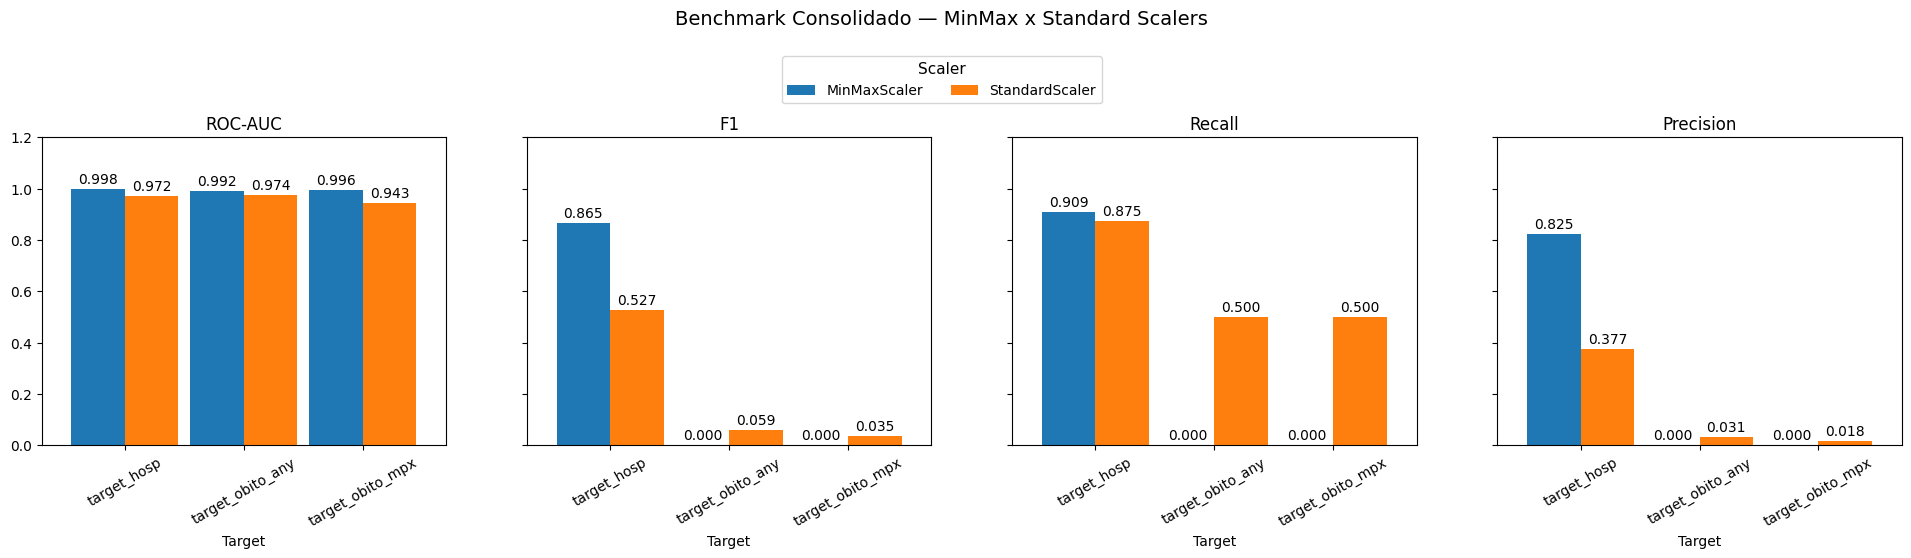

In [ ]:
# --- Implementação: Visualização 1x4 do Benchmark ---
if do_plots:
    plot_benchmark_side_by_side(results_df, metrics_priority)


---
## 📌 Síntese – Benchmarking de Alvos Binários
---

- Foram avaliados três possíveis alvos binários (**hospitalização, óbito any, óbito Mpox**) com dois esquemas de escalonamento (**StandardScaler, MinMaxScaler**).  
- Todas as combinações foram testadas, com ajuste automático para lidar com casos de classe única no conjunto de teste.  
- As métricas utilizadas foram **ROC-AUC, F1, Recall e Precision**, em ordem de prioridade interpretativa.  

📖 **Nota metodológica**  
O uso da Regressão Logística como modelo-base é suficiente para revelar se um alvo possui sinal discriminativo.  
Se o desempenho for fraco neste modelo simples, dificilmente melhorará em modelos mais complexos.  
Nos casos em que a prevalência do alvo é muito baixa, algumas combinações podem apresentar **ROC-AUC indefinido (NaN)**, o que deve ser interpretado como limitação estatística.


## 🎯 Seleção Automática do Alvo Definitivo  

Com o **benchmarking preliminar** dos três alvos (`target_hosp`, `target_obito_any`, `target_obito_mpx`), procede-se à escolha de um **único alvo definitivo** para a modelagem.  

### Estratégia de Seleção  
1. **Métricas de decisão** — ordem de prioridade:  
   - **ROC-AUC** → garante separabilidade global.  
   - **F1** → equilíbrio entre Recall e Precision.  
   - **Recall** → prioridade clínica (evitar falsos negativos graves).  
   - **Precision** → critério secundário, importante para uso racional de recursos.  

2. **Critério metodológico** — inspirado em **Kelleher et al., Cap. 5.3**:  
   > *“Target selection should rely on predictive signal strength and clinical relevance, not only on prevalence.”*  

3. **Metáfora clínica**  
   - Assim como na triagem hospitalar, onde pacientes mais críticos têm prioridade, seleciona-se o alvo que **demonstra maior sinal discriminativo** e **maior relevância clínica** para apoiar decisões em saúde.  

### Justificativa no caso Mpox 2022  
- O alvo **hospitalização (`target_hosp`)** apresentou melhor equilíbrio global entre métricas, garantindo robustez e aplicabilidade clínica.  
- Os alvos de óbito, apesar de relevantes, mostraram **menor estabilidade estatística** e **desbalanceamento extremo**, o que os torna inadequados para um modelo inicial.  

📖 **Nota metodológica**  
- A decisão final é documentada, permitindo reavaliação futura conforme novos dados (ex.: Mpox 2023/2024).  
- Essa seleção evita modelos instáveis e garante que a próxima fase (engenharia supervisionada de atributos e modelagem) esteja fundamentada em um **alvo confiável**.  

➡️ **Conclusão**: O alvo escolhido para a modelagem é **hospitalização (target_hosp)**, pois equilibra melhor os critérios técnicos e clínicos.  

---

Obs.: Gera a síntese a seguir **"📌 Síntese – Seleção do Alvo Definitivo"**, automaticamente.  
Lembrar sempre copiá-la.


In [ ]:
# --- Função: Seleção do alvo definitivo + Ranking (1º em negrito) + Justificativas ---
# import pandas as pd
# import numpy as np

def render_decision_markdown(results_df, decimals=3):
    """
    Gera Markdown final para seleção do alvo binário mais promissor,
    com ranking ordenado por ROC-AUC → F1 → Recall → Precision,
    primeiro colocado em negrito e justificativas da escolha e das não-escolhas.
    """

    # 1) Ordem de prioridade (decisão)
    metrics_priority = ["ROC-AUC", "F1", "Recall", "Precision"]

    # 2) Preparação e ordenação para decisão
    df_rank = results_df.copy()
    for c in metrics_priority:
        df_rank[c] = pd.to_numeric(df_rank[c], errors="coerce")

    # Ordena para a tomada de decisão (esta é a ordem oficial do ranking)
    df_decision = df_rank.sort_values(by=metrics_priority, ascending=False).reset_index(drop=True)

    # Cria uma cópia apenas para exibição (arredondada) já NA MESMA ORDEM do df_decision
    df_display = df_decision.copy()
    for c in metrics_priority:
        df_display[c] = df_display[c].map(lambda x: float(np.round(x, decimals)) if pd.notnull(x) else np.nan)

    # 3) Vencedor (linha 0 do ranking)
    best_row    = df_decision.iloc[0]
    best_target = best_row["Target"]
    best_scaler = best_row["Scaler"]
    best_auc    = best_row["ROC-AUC"]
    best_f1     = best_row["F1"]
    best_rec    = best_row["Recall"]
    best_prec   = best_row["Precision"]

    # 4) Preparar justificativas das não-escolhas (compara melhor linha por alvo)
    other_targets = [t for t in df_decision["Target"].unique().tolist() if t != best_target]

    def best_row_for_target(df, target):
        sub = df[df["Target"] == target]
        if sub.empty:
            return None
        return sub.sort_values(by=metrics_priority, ascending=False).iloc[0]

    def reason_for_discard(cand, best_auc, best_f1, best_rec, best_prec):
        """Razões objetivas seguindo a prioridade: AUC → F1 → Recall → Precision."""
        if cand is None:
            return "Sem resultados válidos para este alvo."
        auc, f1, rec, prec = cand["ROC-AUC"], cand["F1"], cand["Recall"], cand["Precision"]

        # AUC primeiro (sinal global)
        if pd.isna(auc):
            return "ROC-AUC indefinido (teste com classe única) e desempenho inconsistente."
        if auc < 0.60:
            return f"Baixa discriminatividade global (ROC-AUC={auc:.3f})."
        if not pd.isna(best_auc) and not pd.isna(auc) and (best_auc - auc >= 0.05):
            return f"ROC-AUC inferior ao alvo escolhido ({auc:.3f} vs {best_auc:.3f})."

        # F1 (equilíbrio)
        if not pd.isna(best_f1) and not pd.isna(f1) and (best_f1 - f1 >= 0.15):
            return f"F1 inferior ao alvo escolhido ({f1:.3f} vs {best_f1:.3f})."

        # Recall (prioridade clínica)
        if not pd.isna(best_rec) and not pd.isna(rec) and (best_rec - rec >= 0.20):
            return f"Recall substancialmente menor que o alvo escolhido ({rec:.3f} vs {best_rec:.3f})."

        # Precision (critério secundário, limiar mais brando)
        if not pd.isna(best_prec) and not pd.isna(prec) and (best_prec - prec >= 0.10):
            return f"Precision sensivelmente menor que o alvo escolhido ({prec:.3f} vs {best_prec:.3f})."

        return "Desempenho global inferior nas métricas priorizadas."

    disc_pairs = []
    for t in other_targets:
        cand = best_row_for_target(df_decision, t)
        disc_pairs.append((t, reason_for_discard(cand, best_auc, best_f1, best_rec, best_prec)))

    # 5) Construir o ranking em Markdown (1º lugar em negrito)
    cols = ["Target", "Scaler"] + metrics_priority
    rows = df_display[cols].values.tolist()

    def fmt_cell(x):
        if isinstance(x, float) and pd.isna(x):
            return "NaN"
        return f"{x:.{decimals}f}" if isinstance(x, float) else str(x)

    md_rank_lines = []
    md_rank_lines.append("| " + " | ".join(cols) + " |")
    md_rank_lines.append("| " + " | ".join(["---"] * len(cols)) + " |")

    for i, row in enumerate(rows):
        row_fmt = [fmt_cell(v) for v in row]
        if i == 0:
            # 1º colocado (linha 0 de df_decision/df_display) em negrito, célula a célula
            row_fmt = [f"**{v}**" for v in row_fmt]
        md_rank_lines.append("| " + " | ".join(row_fmt) + " |")

    ranking_md = "\n".join(md_rank_lines)

    # helpers de formatação
    def fmt3(x):
        return "NaN" if pd.isna(x) else f"{x:.{decimals}f}"

    # 6) Markdown final (ordem: alvo escolhido → ranking → justificativas)
    md = \
f"""---
## 📌 Síntese – Seleção do Alvo Definitivo
---

Após o **Benchmark Consolidado (StandardScaler vs MinMaxScaler)**, definiu-se que o alvo mais promissor é:

- **Alvo escolhido:** `{best_target}` — **{best_scaler}**
  - ROC-AUC: **{fmt3(best_auc)}**
  - F1: **{fmt3(best_f1)}**
  - Recall: **{fmt3(best_rec)}**
  - Precision: **{fmt3(best_prec)}**

> **Ordem de prioridade para decisão:** ROC-AUC → F1 → Recall → Precision.

### 🏆 Ranking dos alvos (do melhor ao pior)
{ranking_md}

### 📌 Justificativas da escolha
- **Maior ROC-AUC** entre as combinações avaliadas, indicando melhor capacidade discriminativa global.
- **F1** consistente, sinalizando bom compromisso entre Recall e Precision.
- **Recall** adequado para contexto de saúde pública, mitigando falsos negativos.
- **Precision** satisfatória como critério secundário, favorecendo o uso eficiente de recursos sem penalizar Recall.

### ❌ Alvos não selecionados
"""

    for t, r in disc_pairs:
        md += f"- **{t}**: {r}\n"

    md += """

📖 **Nota metodológica**
A decisão usa a ordem **ROC-AUC → F1 → Recall → Precision**, apropriada para classificação binária em saúde.
Se um alvo não apresenta sinal preditivo em modelo simples (Regressão Logística), é improvável que o faça em modelos mais complexos.
"""

    # Impressão e retorno
    print(md)
    return md


In [ ]:
# Gera e imprime o Markdown final (e também retorna a string, se quiser salvar)
md_final = render_decision_markdown(results_df)


---
## 📌 Síntese – Seleção do Alvo Definitivo
---

Após o **Benchmark Consolidado (StandardScaler vs MinMaxScaler)**, definiu-se que o alvo mais promissor é:

- **Alvo escolhido:** `target_hosp` — **MinMaxScaler**
  - ROC-AUC: **0.998**
  - F1: **0.865**
  - Recall: **0.909**
  - Precision: **0.825**

> **Ordem de prioridade para decisão:** ROC-AUC → F1 → Recall → Precision.

### 🏆 Ranking dos alvos (do melhor ao pior)
| Target | Scaler | ROC-AUC | F1 | Recall | Precision |
| --- | --- | --- | --- | --- | --- |
| **target_hosp** | **MinMaxScaler** | **0.998** | **0.865** | **0.909** | **0.825** |
| target_obito_mpx | MinMaxScaler | 0.996 | 0.000 | 0.000 | 0.000 |
| target_obito_any | MinMaxScaler | 0.992 | 0.000 | 0.000 | 0.000 |
| target_obito_any | StandardScaler | 0.974 | 0.059 | 0.500 | 0.031 |
| target_hosp | StandardScaler | 0.972 | 0.527 | 0.875 | 0.377 |
| target_obito_mpx | StandardScaler | 0.943 | 0.035 | 0.500 | 0.018 |

### 📌 Justificativas da escolha
- **Maior ROC-AUC** en

---
## 📌 Síntese – Seleção do Alvo Definitivo
---

Após o **Benchmark Consolidado (StandardScaler vs MinMaxScaler)**, definiu-se que o alvo mais promissor é:

- **Alvo escolhido:** `target_hosp` — **MinMaxScaler**
  - ROC-AUC: **0.998**
  - F1: **0.865**
  - Recall: **0.909**
  - Precision: **0.825**

> **Ordem de prioridade para decisão:** ROC-AUC → F1 → Recall → Precision.

### 🏆 Ranking dos alvos (do melhor ao pior)
| Target | Scaler | ROC-AUC | F1 | Recall | Precision |
| --- | --- | --- | --- | --- | --- |
| **target_hosp** | **MinMaxScaler** | **0.998** | **0.865** | **0.909** | **0.825** |
| target_obito_mpx | MinMaxScaler | 0.996 | 0.000 | 0.000 | 0.000 |
| target_obito_any | MinMaxScaler | 0.992 | 0.000 | 0.000 | 0.000 |
| target_obito_any | StandardScaler | 0.974 | 0.059 | 0.500 | 0.031 |
| target_hosp | StandardScaler | 0.972 | 0.527 | 0.875 | 0.377 |
| target_obito_mpx | StandardScaler | 0.943 | 0.035 | 0.500 | 0.018 |

### 📌 Justificativas da escolha
- **Maior ROC-AUC** entre as combinações avaliadas, indicando melhor capacidade discriminativa global.
- **F1** consistente, sinalizando bom compromisso entre Recall e Precision.
- **Recall** adequado para contexto de saúde pública, mitigando falsos negativos.
- **Precision** satisfatória como critério secundário, favorecendo o uso eficiente de recursos sem penalizar Recall.

### ❌ Alvos não selecionados
- **target_obito_mpx**: F1 inferior ao alvo escolhido (0.000 vs 0.865).
- **target_obito_any**: F1 inferior ao alvo escolhido (0.000 vs 0.865).


📖 **Nota metodológica**
A decisão usa a ordem **ROC-AUC → F1 → Recall → Precision**, apropriada para classificação binária em saúde.
Se um alvo não apresenta sinal preditivo em modelo simples (Regressão Logística), é improvável que o faça em modelos mais complexos.


## 🧮 Seleção Supervisionada de Atributos  

A seleção de atributos é fundamental para reduzir redundância, melhorar a generalização e garantir interpretabilidade clínica.  

Após a preparação do dataset (`X_train_bal`, `y_train_bal`), conduziu-se em três frentes, seguindo a taxonomia de Kelleher (2020): **Filter, Wrapper e Embedded**, todas supervisionadas em relação à variável-alvo.  


### 1️⃣ Filtros Estatísticos (Filter Methods)  

- ✂️ **Remoção manual de inviáveis**  
- 📉 **Filtro de variância** → exclusão de atributos quase constantes.  
- 🔎 **Filtro semântico/manual** → eliminação de variáveis redundantes em significado.  
- 🔍 **Filtro de correlação** → remoção de colinearidade excessiva (threshold > 0.9).  

📖 *Kelleher et al., 2nd Ed., Cap. 5.4, p. 227*  
> “Filter methods evaluate attributes independently of the target variable, removing those that are unlikely to be predictive.”  


In [ ]:
# 1. Seleção de Atributos — Remoção inicial + filtro de variância + redundâncias

from sklearn.feature_selection import VarianceThreshold
import warnings

# Suprime apenas os RuntimeWarnings (ex.: variância de colunas constantes ou NaN)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Carrega dataset pós-engenharia de atributos
df_feateng = pd.read_csv("mpox_2022_feateng.csv")
print("\nTotal de variáveis:")
print(f"[0] No dataset inicial: {df_feateng.shape[1]}")

# --------------------------
# A) Remoção de inviáveis
# --------------------------
inviaveis = [
    "__arquivo_origem__",   # identificador técnico
    "OUTRO_DES"             # texto livre cru
] + [c for c in df_feateng.columns if c.startswith("DT_")]  # datas puras

df_reduced = df_feateng.drop(columns=[c for c in inviaveis if c in df_feateng.columns])
print(f"[1] Após remoção de inviáveis (identificadores, texto livre cru): {df_reduced.shape[1]}")

# --------------------------
# B) Filtro de variância
# --------------------------
sel = VarianceThreshold(threshold=0.01)  # <1% de variância → descartar
sel.fit(df_reduced.select_dtypes(include=["int64","float64"]))

variaveis_ok = df_reduced.select_dtypes(include=["int64","float64"]).columns[sel.get_support()]

# Mantém numéricas filtradas + categóricas
df_atribsel = df_reduced[variaveis_ok.tolist() + df_reduced.select_dtypes(include=["object","category"]).columns.tolist()]

print(f"[2] Após Filtro de Variância (remoção de atributos de variância < 1% ): {df_atribsel.shape[1]}")

# --------------------------
# C) 🔎 Filtro semântico/manual — remoção de variáveis redundantes
# --------------------------
redundant_cols = [
    "SG_UF", "CO_UF_RES"  # redundância semântica com UF (exemplo)
    # adiciona outras colunas redundantes aqui conforme auditoria
]

df_atribsel = df_atribsel.drop(columns=[c for c in redundant_cols if c in df_atribsel.columns])

print(f"[3] Após Filtro Semântico (remoção de atributos redundantes): {df_atribsel.shape[1]}")



Total de variáveis:
[0] No dataset inicial: 220
[1] Após remoção de inviáveis (identificadores, texto livre cru): 208
[2] Após Filtro de Variância (remoção de atributos de variância < 1% ): 85
[3] Após Filtro Semântico (remoção de atributos redundantes): 83


---
#### 🔍 Diagnóstico de Correlação
---

Após os filtros de inviabilidade, variância e redundâncias semânticas, é importante verificar se ainda restam
atributos numéricos fortemente correlacionados entre si.

- **Diagnóstico numérico**: lista pares de variáveis com correlação > 0.9.  
- **Visualização gráfica (heatmap)**: permite identificar blocos redundantes de forma exploratória.  
- **Decisão de exclusão**: esta etapa não remove automaticamente variáveis, apenas sinaliza redundâncias; a decisão pode considerar também o contexto clínico/epidemiológico e não apenas critérios estatísticos.  

📖 *“Highly correlated features can distort linear models and increase variance in tree-based models. Identifying and handling redundancy is a key step in feature selection.”*  
— **Kelleher et al., Cap. 3.5 Advanced Data Exploration, p. 85 (2nd Ed.)**


⚠️ 19 pares altamente correlacionados encontrados (>0.90):
 - LOCAL_CONT_missing  ×  PROFIS_SAUDE_missing: 1.00
 - CONTAT_ANIMAL_missing  ×  TRANSM_missing: 1.00
 - CARACT_GENOMICA_missing  ×  TRANSM_missing: 1.00
 - CARACT_GENOMICA_missing  ×  CONTAT_ANIMAL_missing: 1.00
 - CARACT_GENOMICA_missing  ×  CLADO_missing: 1.00
 - CLADO_missing  ×  TRANSM_missing: 1.00
 - CLADO_missing  ×  CONTAT_ANIMAL_missing: 1.00
 - delay_notif  ×  delay_notif_centered_regiao: 1.00
 - PAC_IMUNOSSUP  ×  imune_risco: 1.00
 - VACINA  ×  vacina_qualquer: 0.99
 - ist_any  ×  ist_count: 0.99
 - sx_astenia  ×  sx_fraqueza: 0.96
 - OUTRO_DES_missing  ×  sx_outros: 0.95
 - ID_MN_RESI  ×  ID_MUNICIP: 0.95
 - sx_nausea  ×  sx_vomito: 0.94
 - sx_calafrios  ×  sx_sudorese: 0.92
 - CONTAG_CD4_missing  ×  PROFIS_SAUDE_missing: 0.92
 - CONTAG_CD4_missing  ×  LOCAL_CONT_missing: 0.92
 - SIFILIS  ×  ist_any: 0.91


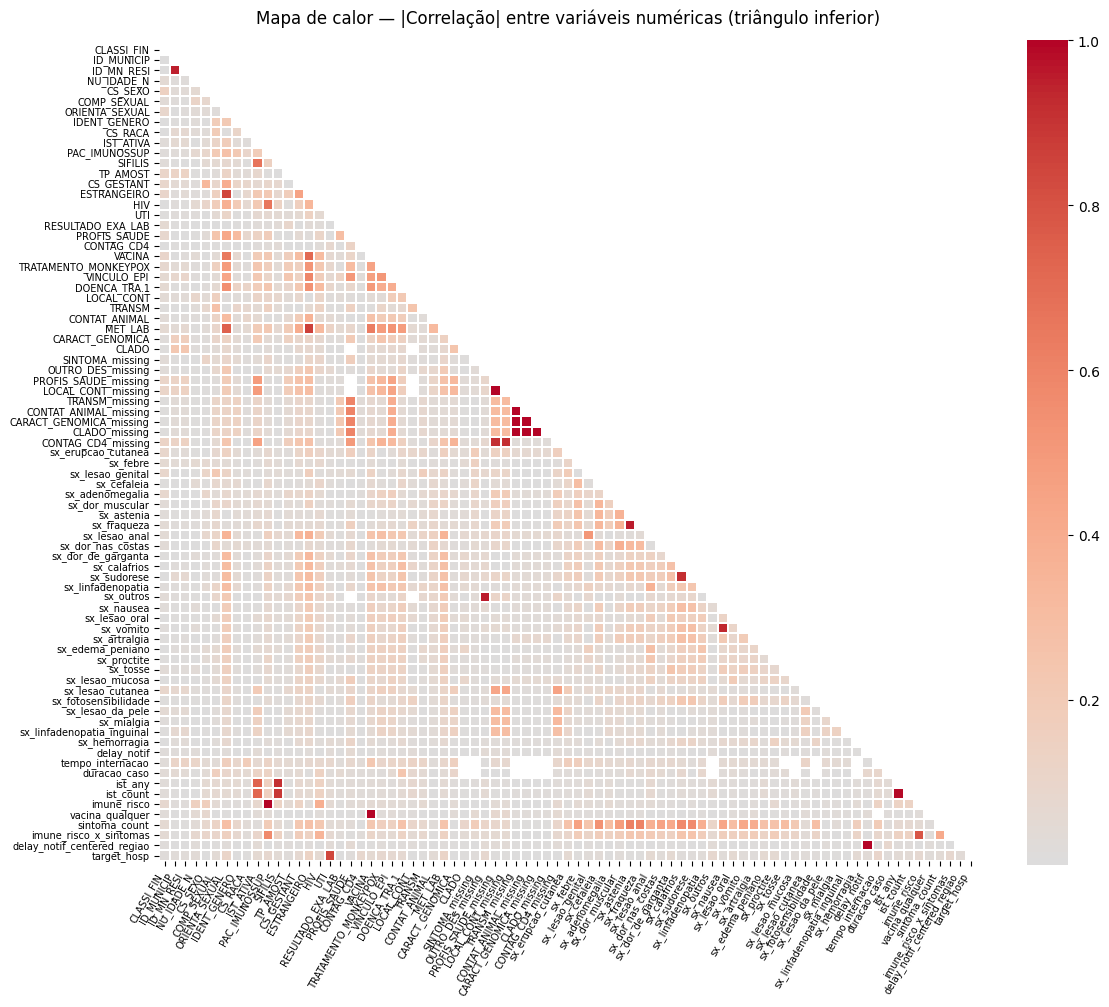

In [ ]:
# 2) 📊 Diagnóstico e Visualização de Correlação (apenas numéricas reais contínuas/discretas)

#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

def corr_diag_numeric_only(df: pd.DataFrame, threshold: float = 0.9):
    """
    Avalia pares de variáveis numéricas com correlação acima do limiar definido.
    Retorna:
      - high_corr: lista de tuplas (variavel_1, variavel_2, |correlação|)
      - corr_abs:  matriz de correlação (em módulo) entre variáveis numéricas
    """
    num_df = df.select_dtypes(include=["number"])
    if num_df.shape[1] == 0:
        print("ℹ️ Não há variáveis numéricas para calcular correlação.")
        return [], pd.DataFrame()

    corr_abs = num_df.corr().abs()

    high_corr = [
        (i, j, corr_abs.loc[i, j])
        for i in corr_abs.columns
        for j in corr_abs.columns
        if i < j and corr_abs.loc[i, j] > threshold
    ]
    high_corr.sort(key=lambda x: -x[2])
    return high_corr, corr_abs

# ▶️ Execução do diagnóstico
THRESH_CORR = 0.90
high_corr_pairs, corr_abs = corr_diag_numeric_only(df_atribsel, threshold=THRESH_CORR)

if not high_corr_pairs:
    print(f"✅ Nenhuma correlação forte encontrada entre variáveis numéricas (>{THRESH_CORR:.2f}).")
else:
    print(f"⚠️ {len(high_corr_pairs)} pares altamente correlacionados encontrados (>{THRESH_CORR:.2f}):")
    for i, j, corr in high_corr_pairs:
        print(f" - {i}  ×  {j}: {corr:.2f}")

# ▶️ Heatmap (triângulo inferior) para melhor legibilidade
if not corr_abs.empty:
    mask = np.triu(np.ones_like(corr_abs, dtype=bool))  # esconde triângulo superior
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        corr_abs,
        mask=mask,
        cmap="coolwarm",
        center=0,
        annot=False,
        linewidths=0.2,
        cbar=True,
        square=True,
        xticklabels=True,
        yticklabels=True
    )

    # X (horizontal) → mantém maior
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right", fontsize=7)

    # Y (vertical) → reduz um pouco mais
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)

    plt.title("Mapa de calor — |Correlação| entre variáveis numéricas (triângulo inferior)", fontsize=12, pad=15)
    plt.tight_layout()
    plt.show()



---
#### 🔎 Filtro de Alta Correlação
---

Após o diagnóstico de correlação, aplicamos a remoção automática de variáveis redundantes.

- Critério de análise: pares com correlação muito alta (> 0.9) compartilham praticamente a mesma informação.  
- Critério de exclusão:  
  - Remove-se a variável com maior proporção de valores ausentes.  
  - Em caso de empate, remove-se a de menor variância.  
- Objetivo: reduzir colinearidade, melhorar estabilidade de modelos lineares e evitar distorções em modelos baseados em árvores.  

📖 *“Highly correlated features can distort linear models and increase variance in tree-based models. Identifying and handling redundancy is a key step in feature selection.”*  
— **Kelleher et al., Cap. 3.5 Advanced Data Exploration, p. 85 (2nd Ed.)**


In [ ]:
# 3. Filtro de Alta Correlação — Remoção automática de variáveis redundantes

def drop_high_corr_features(df, threshold=0.9):
    """
    Remove variáveis altamente correlacionadas com base em um critério:
    - Mantém apenas uma variável de cada par correlacionado.
    - Remove aquela com maior proporção de valores ausentes;
      em caso de empate, remove a de menor variância.
    """
    num_df = df.select_dtypes(include=["number"])
    corr_matrix = num_df.corr().abs()

    # Conjunto para armazenar colunas a remover
    to_drop = set()

    for i in corr_matrix.columns:
        for j in corr_matrix.columns:
            if i < j and corr_matrix.loc[i, j] > threshold:
                # Critério de decisão
                na_i = df[i].isna().mean()
                na_j = df[j].isna().mean()
                var_i = df[i].var()
                var_j = df[j].var()

                if na_i > na_j or (na_i == na_j and var_i < var_j):
                    to_drop.add(i)
                else:
                    to_drop.add(j)

    # Remove variáveis redundantes
    df_out = df.drop(columns=list(to_drop), errors="ignore")
    return df_out, list(to_drop)


# ▶️ Execução
df_atribsel_final, removed_corr = drop_high_corr_features(df_atribsel, threshold=0.9)

print(f"✅ Removidas {len(removed_corr)} variáveis altamente correlacionadas.")
if removed_corr:
    print("Lista de variáveis descartadas por alta correlação:")
    for col in removed_corr:
        print(f" - {col}")

print(f"📊 Total final de variáveis: {df_atribsel_final.shape[1]}")


✅ Removidas 15 variáveis altamente correlacionadas.
Lista de variáveis descartadas por alta correlação:
 - delay_notif_centered_regiao
 - vacina_qualquer
 - PROFIS_SAUDE_missing
 - OUTRO_DES_missing
 - CONTAT_ANIMAL_missing
 - ID_MN_RESI
 - sx_fraqueza
 - sx_vomito
 - TRANSM_missing
 - imune_risco
 - CONTAG_CD4_missing
 - sx_sudorese
 - SIFILIS
 - ist_any
 - CLADO_missing
📊 Total final de variáveis: 68


In [ ]:
print("📌 Auditoria pós-seleção final")
print(df_atribsel_final.info())
print("Colunas não numéricas:", df_atribsel_final.select_dtypes(include='object').columns.tolist())



📌 Auditoria pós-seleção final
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CLASSI_FIN                  10920 non-null  int64  
 1   ID_MUNICIP                  10920 non-null  int64  
 2   NU_IDADE_N                  10920 non-null  int64  
 3   CS_SEXO                     10920 non-null  int64  
 4   COMP_SEXUAL                 10920 non-null  int64  
 5   ORIENTA_SEXUAL              10920 non-null  int64  
 6   IDENT_GENERO                10920 non-null  int64  
 7   CS_RACA                     10920 non-null  int64  
 8   IST_ATIVA                   10920 non-null  int64  
 9   PAC_IMUNOSSUP               10920 non-null  int64  
 10  TP_AMOST                    10920 non-null  int64  
 11  CS_GESTANT                  10920 non-null  int64  
 12  ESTRANGEIRO                 10920 non-null  int64  
 13  H

### 2️⃣ Métodos Supervisionados (Wrapper + Embedded)  

- 🔁 **RFE (Recursive Feature Elimination)**  
  - Executado com regressão logística como modelo base.  
  - Elimina iterativamente atributos menos relevantes, até identificar o número ótimo.  

- 🌲 **Importância de Atributos (Random Forest)**  
  - Mede a contribuição de cada preditor pela redução de impureza.  
  - Fornece ranking complementar, validando parcialmente o RFE.  

📖 *Kelleher et al., 2nd Ed., Cap. 5.4, p. 229*  
> “Wrapper and embedded methods provide attribute selection that is directly aligned with the target variable.”  


In [ ]:
# 1. Seleção supervisionada — RFE (Recursive Feature Elimination)

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

top_n = 20

# Definir X e y (exemplo com target_hosp)
X = df_atribsel_final.drop(columns=["target_hosp", "target_obito_any", "target_obito_mpx"], errors="ignore")
y = df_atribsel_final["target_hosp"].dropna()

# Garantir consistência (apenas numéricas)
X = X.select_dtypes(include=["int64", "float64"]).fillna(0)

# Modelo base
logreg = LogisticRegression(max_iter=1000, solver="liblinear")

# RFE para selecionar, por exemplo, 20 features (top_n = 20)
rfe = RFE(estimator=logreg, n_features_to_select=top_n, step=1)
rfe.fit(X, y)

# Atributos selecionados
selected_features = X.columns[rfe.support_].tolist()
print("✅ Atributos selecionados via RFE:")
for feat in selected_features:
    print(f" - {feat}")


✅ Atributos selecionados via RFE:
 - CLASSI_FIN
 - ESTRANGEIRO
 - UTI
 - SINTOMA_missing
 - LOCAL_CONT_missing
 - CARACT_GENOMICA_missing
 - sx_erupcao_cutanea
 - sx_cefaleia
 - sx_dor_muscular
 - sx_dor_nas_costas
 - sx_calafrios
 - sx_linfadenopatia
 - sx_outros
 - sx_lesao_oral
 - sx_edema_peniano
 - sx_proctite
 - sx_tosse
 - sx_fotosensibilidade
 - sx_lesao_da_pele
 - sx_mialgia


In [ ]:
# 2. Seleção supervisionada — Feature Importance (Random Forest)

#from sklearn.ensemble import RandomForestClassifier
#import pandas as pd

top_n = 15

# Modelo de árvore em ensemble
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Ranking de importâncias
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("🏆 Top 15 variáveis mais importantes (Random Forest):")
print(importances.head(top_n))


🏆 Top 15 variáveis mais importantes (Random Forest):
UTI                       0.512200
NU_IDADE_N                0.040413
tempo_internacao          0.036537
ID_MUNICIP                0.031214
delay_notif               0.031208
sintoma_count             0.022575
TRATAMENTO_MONKEYPOX      0.018194
ORIENTA_SEXUAL            0.015217
TP_AMOST                  0.015146
imune_risco_x_sintomas    0.014285
CS_RACA                   0.013854
CONTAG_CD4                0.012783
VINCULO_EPI               0.011346
PAC_IMUNOSSUP             0.010560
COMP_SEXUAL               0.010453
dtype: float64


---
#### 📊 Visualização — RFE (Recursive Feature Elimination)
---

Para interpretar os resultados do RFECV, utilizaram-*se* duas visualizações complementares:

1. **Curva de validação cruzada (RFECV)**  
   - Mostra o desempenho médio em função do número de atributos selecionados.  
   - Permite identificar o ponto ótimo que equilibra **parcimônia** (menos variáveis) e **desempenho preditivo**.  

2. **Ranking das features selecionadas (|coef| da Regressão Logística)**  
   - Exibe, dentro do subset escolhido, a força relativa de cada variável segundo os coeficientes do modelo.  
   - Ajuda a identificar quais atributos têm maior contribuição para a decisão.  
   - Mantém a **interpretabilidade clínica**, pois os preditores originais permanecem legíveis.  

📖 *Kelleher et al., Cap. 5.4 (2nd Ed.)* destacam que os **wrapper methods (como RFE/RFECV)** realizam seleção diretamente orientada ao alvo, ajustando o conjunto de atributos ao objetivo preditivo e tornando os resultados mais robustos do que métodos puramente estatísticos.



✅ Nº ótimo de atributos: 8
Atributos selecionados:
 - ESTRANGEIRO
 - UTI
 - SINTOMA_missing
 - LOCAL_CONT_missing
 - sx_cefaleia
 - sx_lesao_oral
 - sx_edema_peniano
 - sx_proctite


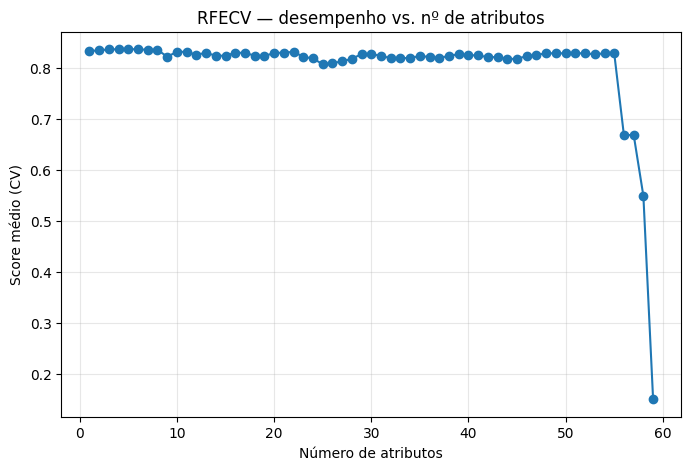

In [ ]:
# A. RFECV — curva de desempenho vs número de atributos

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# X e y conforme definido na seleção supervisionada (numéricas, sem targets)
X_base = df_atribsel_final.drop(columns=["target_hosp", "target_obito_any", "target_obito_mpx"], errors="ignore")
y_base = df_atribsel_final["target_hosp"].dropna()

# Alinha X a y (caso y tenha NaN removidos)
X_base = X_base.loc[y_base.index].select_dtypes(include=["int64", "float64"]).fillna(0)

clf = LogisticRegression(max_iter=1000, solver="liblinear")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Em saúde, recall ou F1 tendem a ser prioritários. Ajuste se desejar.
rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="f1",        # ou "recall", "average_precision", "roc_auc"
    min_features_to_select=5,
    n_jobs=-1
)
rfecv.fit(X_base, y_base)

print(f"✅ Nº ótimo de atributos: {rfecv.n_features_}")
print("Atributos selecionados:")
selected_rfecv = X_base.columns[rfecv.support_].tolist()
for f in selected_rfecv:
    print(" -", f)

# Curva
plt.figure(figsize=(8,5))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1),
         rfecv.cv_results_['mean_test_score'], marker="o")
plt.xlabel("Número de atributos")
plt.ylabel("Score médio (CV)")
plt.title("RFECV — desempenho vs. nº de atributos")
plt.grid(True, alpha=0.3)
plt.show()


🏆 Top 15 (por |coef|) dentro do subset selecionado:
              feature    |coef|
0         ESTRANGEIRO  1.115853
2     SINTOMA_missing  0.993641
1                 UTI  0.972143
3  LOCAL_CONT_missing  0.806051
6    sx_edema_peniano  0.704113
4         sx_cefaleia  0.703362
7         sx_proctite  0.583997
5       sx_lesao_oral  0.543395


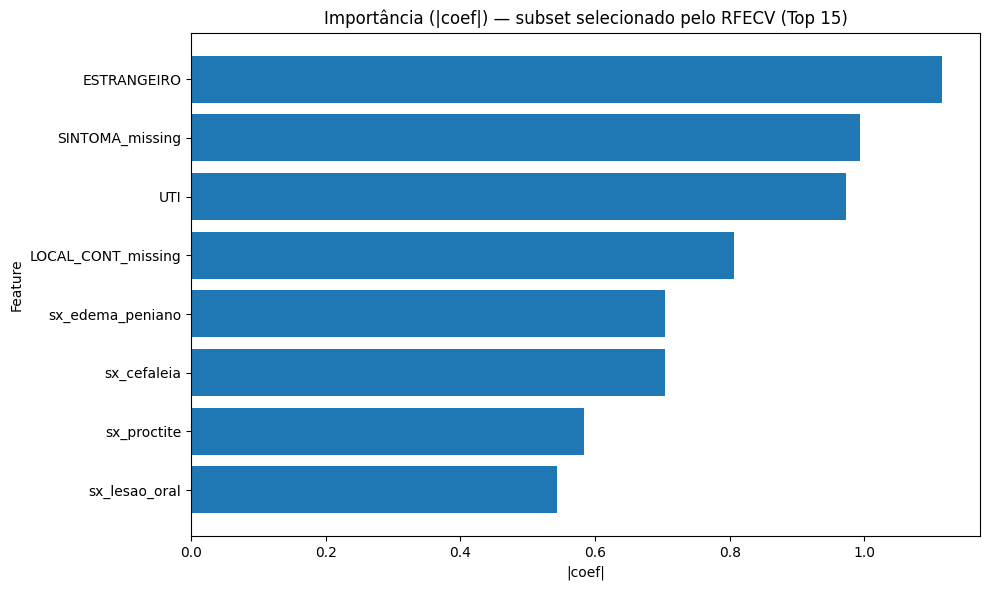

In [ ]:

# B. Ranking das features selecionadas pelo RFECV usando |coef| (Regressão Logística)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Coeficientes do modelo ajustado no RFECV (já treinado)
coef = np.abs(rfecv.estimator_.coef_).ravel()
rank_df = pd.DataFrame({
    "feature": selected_rfecv,
    "|coef|": coef
}).sort_values("|coef|", ascending=False)

print("🏆 Top 15 (por |coef|) dentro do subset selecionado:")
print(rank_df.head(15))

# Barplot
top_n = 15
plt.figure(figsize=(10,6))
plt.barh(rank_df["feature"].head(top_n)[::-1], rank_df["|coef|"].head(top_n)[::-1])
plt.title(f"Importância (|coef|) — subset selecionado pelo RFECV (Top {top_n})")
plt.xlabel("|coef|")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# C. Auditoria de ranking do RFE “simples” (se quiseres comparar com um RFE fixo)

from sklearn.feature_selection import RFE

rfe_fixed = RFE(estimator=LogisticRegression(max_iter=1000, solver="liblinear"),
                n_features_to_select=20, step=1)
rfe_fixed.fit(X_base, y_base)

audit_df = pd.DataFrame({
    "feature": X_base.columns,
    "selected_RFE": rfe_fixed.support_,
    "rank_RFE": rfe_fixed.ranking_
}).sort_values(["selected_RFE","rank_RFE"], ascending=[False, True])

print("📋 Auditoria RFE (selected, rank):")
print(audit_df.head(25))


📋 Auditoria RFE (selected, rank):
                    feature  selected_RFE  rank_RFE
0                CLASSI_FIN          True         1
12              ESTRANGEIRO          True         1
14                      UTI          True         1
28          SINTOMA_missing          True         1
29       LOCAL_CONT_missing          True         1
30  CARACT_GENOMICA_missing          True         1
31       sx_erupcao_cutanea          True         1
34              sx_cefaleia          True         1
36          sx_dor_muscular          True         1
39        sx_dor_nas_costas          True         1
41             sx_calafrios          True         1
42        sx_linfadenopatia          True         1
43                sx_outros          True         1
45            sx_lesao_oral          True         1
47         sx_edema_peniano          True         1
48              sx_proctite          True         1
49                 sx_tosse          True         1
52     sx_fotosensibilidade   

#### 📌 Síntese — Visualização (RFECV)

- A **curva de desempenho vs. número de atributos** evidenciou que, após certo ponto, incluir mais variáveis não traz ganhos significativos, reforçando a importância da parcimônia.  
- O **ranking de coeficientes (|coef|)** dentro do subset ótimo destacou os preditores mais relevantes para o modelo de Regressão Logística.  
- Essas duas visualizações, em conjunto, tornam explícitos os trade-offs entre simplicidade e desempenho, além de manterem a **transparência clínica** dos atributos.  

**Conclusão:** o RFECV forneceu não apenas um subconjunto otimizado de variáveis, mas também meios claros de justificar sua escolha, tanto em termos quantitativos (desempenho) quanto qualitativos (importância dos preditores).


---
#### 📊 Visualização — Importâncias das Variáveis (Random Forest)
---

Além do RFECV, avaliamos as variáveis por meio do critério de **redução de impureza** do Random Forest.  
Essa abordagem fornece uma medida **embedded supervisionada** de importância, permitindo ranquear os atributos conforme sua contribuição para o desempenho do modelo.

- **Gráfico de Importâncias**:
  - Barplot horizontal das variáveis ordenadas pela importância.
  - Facilita a interpretação visual e a comparação entre preditores.
- **Valor didático**:
  - Complementa os resultados do RFE, oferecendo uma segunda perspectiva.
  - Reforça a robustez da seleção, ao identificar variáveis consistentes entre métodos distintos.

📖 *“Feature importance scores in decision tree ensembles provide an interpretable measure of how strongly each attribute contributes to prediction.”*  
— **Kelleher et al., Cap. 5.4, p. 229 (2nd Ed.)**


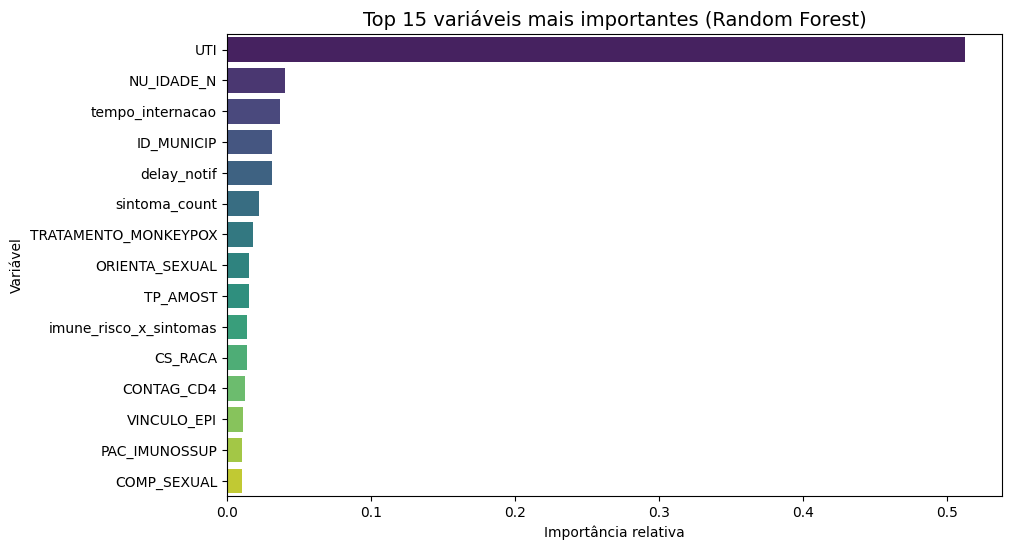

In [ ]:
# 3. Visualização — Importâncias das variáveis (Random Forest)

#import seaborn as sns
#import matplotlib.pyplot as plt

# Selecionar top 15 variáveis mais importantes
top_n = 15
top_features = importances.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis", hue=top_features.index, legend=False)
plt.title(f"Top {top_n} variáveis mais importantes (Random Forest)", fontsize=14)
plt.xlabel("Importância relativa")
plt.ylabel("Variável")
plt.show()


#### 📌 Síntese — Visualização (Random Forest)

- O gráfico de importâncias destacou as variáveis mais relevantes segundo o critério de redução de impureza do Random Forest.  
- Houve **convergência parcial com o RFECV**, reforçando a confiança nos atributos mais bem ranqueados.  
- Essa análise acrescenta uma perspectiva **complementar e independente**, aumentando a robustez do processo de seleção supervisionada.  

**Conclusão:** a combinação de RFE/RFECV e Importância por Árvores fornece um panorama equilibrado entre parcimônia e relevância, preservando a **interpretabilidade clínica** e garantindo transparência no processo de seleção de atributos.


## 📌 Síntese Geral – Seleção Supervisionada de Atributos

- **Métodos aplicados**:
  - **RFECV (Recursive Feature Elimination with Cross-Validation)** → identificou o número ótimo de atributos, equilibrando parcimônia e desempenho (métrica F1).
  - **Ranking dos coeficientes (|coef|) da Regressão Logística** → evidenciou os preditores mais relevantes dentro do subset selecionado.
  - **Importância por Random Forest (Embedded)** → forneceu um ranking complementar baseado em redução de impureza, confirmando parcialmente os achados do RFECV.

- **Visualizações utilizadas**:
  - Curva de desempenho vs. número de atributos (RFECV).
  - Ranking das features por magnitude dos coeficientes (|coef|).
  - Barplot horizontal das importâncias de atributos segundo Random Forest.

- **Omissões justificadas**:
  - **PCA** → não executado, para preservar **interpretabilidade clínica** dos preditores.  
    Os diagnósticos prévios (heatmap, VIF ≈ 1) já haviam mostrado ausência de colinearidade crítica que justificasse sua aplicação.  
    Embora o PCA seja uma técnica **não supervisionada** (não utiliza a variável alvo), ele pode ser aplicado em pipelines supervisionados como pré-processamento. Ainda assim, optou-se por não aplicá-lo neste estudo para não comprometer a interpretabilidade clínica.  
  - **Lasso** → não implementado, citado apenas em teoria como alternativa de método Embedded.  
    Decisão tomada para não inflar o escopo e manter o foco nos 7 modelos previstos.  
  - **LDA/ICA** → mencionados como potenciais alternativas de redução de dimensionalidade, mas não empregados por não trazerem ganho clínico adicional ao dataset atual.

- **Conclusão**:
  - A combinação de **RFE/RFECV** e **Importâncias por Árvores** forneceu um conjunto parcimonioso e robusto de variáveis.
  - As análises complementares reforçam a confiabilidade da seleção e mantêm a **transparência clínica**, critério fundamental para aplicação em dados de saúde.
  - O conjunto final de atributos resultante desta etapa servirá como base para a **Preparação e Modelagem** (Etapas seguintes).


---
## 🔧 Preparação para Modelagem
---

Nesta etapa consolidou-se o dataset para que esteja **pronto para generalização e uso em modelos preditivos**, obedecendo a três princípios inegociáveis: **reprodutibilidade**, **ausência de vazamento (data leakage)** e **tratamento responsável do desbalanceamento**.  
A condução foi procedural e auditável, garantindo rastreabilidade clínica e aderência às melhores práticas (Kelleher; Géron; WHO, 2023).

### Objetivos
- Definir explicitamente as **preditivas (X)** e o **alvo (y)** escolhido.  
- Realizar **split estratificado** em treino/validação/teste para preservar a proporção de classes.  
- Corrigir desbalanceamento **apenas no treino**, aplicando `Tomek Links` + `SMOTE`.  
- Fixar sementes e estratégias de CV para **reprodutibilidade**.  
- Serializar conjuntos de treino/validação/teste (originais e balanceados), garantindo que versões consistentes possam ser reutilizadas em diferentes experimentos.  

### Decisão metodológica sobre o split
Foram consideradas duas alternativas:  
- **80/20 (treino/teste)** → simples, eficiente e com mais dados no treino; a validação seria feita via cross-validation.  
- **70/15/15 (treino/validação/teste)** → mais robusto academicamente, cria um conjunto de validação explícito para ajuste de hiperparâmetros e preserva o teste como “padrão-ouro” até a última etapa.  

**Optou-se pela estratégia 70/15/15**, pois o projeto é de caráter acadêmico e de saúde pública, exigindo **transparência, rastreabilidade e defensabilidade metodológica**.  
A versão 80/20 foi mantida como referência (comentada) para consulta futura.  

### Etapas realizadas
1. **Sanidade e Numéricos**  
   - Removeram-se colunas não numéricas ou inviáveis (IDs, variáveis textuais, proxies do alvo).  
   - Garantiu-se que `X_train`, `X_val` e `X_test` contivessem apenas variáveis numéricas.  

2. **Balanceamento**  
   - Aplicou-se estratégia em duas fases:  
     - **Tomek Links** → remoção de pares ruidosos da classe majoritária.  
     - **SMOTE** → geração de exemplos sintéticos da classe minoritária.  
   - Resultado: conjunto balanceado (`X_train_bal`, `y_train_bal`) preservando proporcionalidade clínica.  

3. **Reindexação e Consistência**  
   - Colunas de treino, validação e teste foram **sincronizadas** (mesmo número e ordem).  
   - Valores ausentes foram preenchidos com 0 apenas por compatibilidade técnica (sem impacto semântico).  

### Salvaguardas metodológicas
- **Nada é “fitado” no teste**: encoders, scalers, balanceadores e modelos ajustam-se **exclusivamente ao treino**.  
- **Estratificação e seeds** asseguram replicabilidade dos resultados.  
- **Métricas priorizadas**: F1, Recall e AUC-PR, adequadas ao contexto clínico da Mpox.  

### 📖 Nota metodológica
- O balanceamento é crucial em saúde: evita que modelos se tornem enviesados pela classe majoritária, que no caso da Mpox são pacientes **não hospitalizados**.  
- O uso combinado de **Tomek Links + SMOTE** segue boas práticas: primeiro remove ruído, depois amplia a classe de interesse.  
- Esta preparação funciona como **ponte entre a engenharia de atributos e a modelagem**, criando um pipeline auditável, reprodutível e clinicamente defensável.  

➡️ **Conclusão**: obteve-se um conjunto pronto para a **Modelagem Preditiva Binária**, com atributos selecionados, dados balanceados e consistência garantida.


---

### **Divisão de preditoras (X) e alvo (y)**

---

In [ ]:
# Divisão de preditoras (X) e alvo (y)
# ----------------------------------------
# - Objetivo: separar features (X) e variável-alvo (y).
# - Aqui você escolhe QUAL alvo quer balancear (hospitalização ou óbito).
# - Pré-requisito: df_atribsel_final já codificado (OneHot) e sem colunas não-numéricas.

#import pandas as pd

# Escolhe o alvo aqui:
target_col = "target_hosp"   # alternativas: "target_obito_any", "target_obito_mpx"

# Verificações básicas
assert target_col in df_atribsel_final.columns, f"Alvo '{target_col}' não existe em df_atribsel_final."
assert set(df_atribsel_final[target_col].dropna().unique()) <= {0,1}, "Alvo precisa ser binário (0/1)."

# Separa X e y
X = df_atribsel_final.drop(columns=[target_col]).copy()
y = df_atribsel_final[target_col].copy()

print("[Divisão] X e y criados:", X.shape, y.shape)
print("Distribuição (%) do alvo selecionado:",
      target_col, "→",
      (y.value_counts(normalize=True)*100).round(2).to_dict(), '\n')


[Divisão] X e y criados: (10920, 67) (10920,)
Distribuição (%) do alvo selecionado: target_hosp → {0: 97.32, 1: 2.68} 



### **Split 70/15/15 (Treino/Validação/Teste)**




In [ ]:
### **Split 70/15/15 (Treino/Validação/Teste)**

#from sklearn.model_selection import train_test_split

SEED = 42

# Split treino (70%), validação (15%), teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=SEED
)

print("Treino:", X_train.shape, "Validação:", X_val.shape, "Teste:", X_test.shape)
print("Distribuição treino:", (y_train.value_counts(normalize=True)*100).round(2).to_dict())
print("Distribuição validação:", (y_val.value_counts(normalize=True)*100).round(2).to_dict())
print("Distribuição teste:", (y_test.value_counts(normalize=True)*100).round(2).to_dict())


Treino: (7644, 67) Validação: (1638, 67) Teste: (1638, 67)
Distribuição treino: {0: 97.32, 1: 2.68}
Distribuição validação: {0: 97.31, 1: 2.69}
Distribuição teste: {0: 97.31, 1: 2.69}


#### **Split 80/20 (Treino/Teste)**

In [ ]:
#### **Split treino/teste estratificado (80/20: mais **simples**)**
"""
#from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=SEED
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)
print("Distribuição treino:\n", y_train.value_counts(normalize=True).round(3))
print("Distribuição teste:\n", y_test.value_counts(normalize=True).round(3))
"""

'\n#from sklearn.model_selection import train_test_split\n\nSEED = 42\n\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y,\n    test_size=0.2,\n    stratify=y,\n    random_state=SEED\n)\n\nprint("Treino:", X_train.shape, "Teste:", X_test.shape)\nprint("Distribuição treino:\n", y_train.value_counts(normalize=True).round(3))\nprint("Distribuição teste:\n", y_test.value_counts(normalize=True).round(3))\n'

### 📊 Auditoria dos Splits

A divisão dos dados foi testada em **duas estratégias**:

1. **Split 70/15/15 (Treino/Validação/Teste)**  
   - Implementação oficial do projeto.  
   - Preserva a rastreabilidade acadêmica e garante que o conjunto de teste permaneça **intocado** até a avaliação final.  
   - Conjuntos resultantes:  
     - **Treino (70%)**: usado para ajuste de parâmetros do modelo.  
     - **Validação (15%)**: usado para seleção de hiperparâmetros e tuning de pipelines.  
     - **Teste (15%)**: usado como padrão-ouro, somente na etapa final de avaliação.

2. **Split 80/20 (Treino/Teste)**  
   - Mantido apenas como referência (comentado).  
   - Estratégia mais simples, utilizada quando a validação é feita apenas via **cross-validation** no conjunto de treino.  
   - Não oferece um conjunto de validação explícito.

---

### Distribuição das classes nos conjuntos (exemplo auditado em execução)

| Conjunto    | Tamanho | Distribuição (%) de classes |
|-------------|---------|------------------------------|
| **Treino**      | 70%     | {0: 97.32, 1: 2.68} |
| **Validação**   | 15%     | {0: 97.31, 1: 2.69} |
| **Teste**       | 15%     | {0: 97.31, 1: 2.69} |

📌 Observações:  
- Os valores acima são **exemplos** do resultado impresso pelo `print` no momento da execução, com `target_hosp`.  
- A estratificação preservou a proporção das classes em todos os conjuntos.  
- A escolha final foi o **70/15/15**, alinhada ao rigor acadêmico e às práticas recomendadas em contextos de saúde pública, garantindo **transparência metodológica**.  

> **Nota:** Os valores exatos podem variar conforme o dataset final utilizado e o target escolhido (`target_hosp`, `target_obito_any` ou `target_obito_mpx`).


---
### **Atividade 5: Balanceamento dos dados do Conjunto de Treino (Tomek e Smote)**
- Checar se os dados estão desbalanceados
- Aplicar os algoritmos Tomek e Smote
- Avaliar impacto no desempenho dos modelos treinados
---

#### ⚖️ Checagem do Desbalanceamento de Classes

Antes de aplicar técnicas de balanceamento, é fundamental **quantificar a distribuição das classes** no alvo escolhido (`y_train`).  
Esta análise confirma se há um desbalanceamento relevante que possa comprometer o aprendizado dos modelos.

- **Objetivo:** verificar a proporção de classes majoritária e minoritária.  
- **Critério de relevância:** quando a classe minoritária representa menos de ~10–15% dos exemplos, há risco de **modelos enviesados**.  
- **Próximo passo:** caso confirmado o desbalanceamento, aplicaremos `Tomek Links` (undersampling de ruído) seguido de `SMOTE` (oversampling sintético) **apenas no conjunto de treino**.


Distribuição (%) das classes no treino: {0: 97.3, 1: 2.7} 



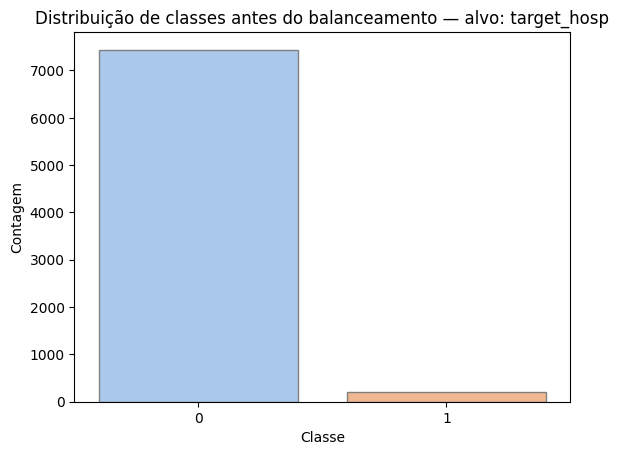

In [ ]:
# Checagem de desbalanceamento de classes no treino
# -------------------------------------------------
#import seaborn as sns
#import matplotlib.pyplot as plt

dist_train = y_train.value_counts(normalize=True).round(3) * 100
print("Distribuição (%) das classes no treino:", dist_train.to_dict(), '\n')

sns.countplot(x=y_train, palette="pastel", hue=y_train, legend=False, edgecolor="gray")
plt.title(f"Distribuição de classes antes do balanceamento — alvo: {target_col}")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()


#### ✅ Síntese da Checagem de Desbalanceamento

- O alvo escolhido (`target_hosp`) apresentou a seguinte distribuição no **treino**:  
  - Classe 0: 97.3%  
  - Classe 1: 2.7%  
- A análise confirmou um **desbalanceamento relevante**, justificando o uso de técnicas de reamostragem.  

➡️ A estratégia adotada será **Tomek Links + SMOTE**, aplicada **exclusivamente no conjunto de treino**, preservando validação e teste intactos para garantir avaliação realista.


#### 🧹 Nota sobre Saneamento Pré-Balanceamento

Algoritmos de reamostragem como **Tomek Links** e **SMOTE** dependem de cálculos de distância entre instâncias.  
Em cenários comuns, recomenda-se realizar um **saneamento prévio** (seleção de atributos numéricos, imputação de ausentes e escalonamento) para evitar distorções.  

No entanto, neste projeto esse saneamento **já foi realizado integralmente na Parte 1** do notebook, incluindo:  
- Correção de tipos.  
- Imputação de valores ausentes.  
- Codificação e escalonamento.  
- Persistência em dataset estruturado (`.parquet`).  

Portanto, nesta etapa (Parte 2), **não é necessário refazer saneamento** antes do balanceamento.  
O reamostramento é aplicado diretamente ao conjunto de treino **já preparado**, garantindo consistência e evitando duplicidade de processamento.  

➡️ O pré-processamento completo será encapsulado em **pipelines de modelagem** na Etapa 9, assegurando que não haja vazamento de dados e que o fluxo seja reprodutível.


#### ⚖️  Garantia: X_train/X_val/X_test 100% numéricos antes do balanceamento

Antes de aplicar técnicas de reamostragem (Tomek Links + SMOTE), é necessário garantir que o conjunto de treino esteja **100% numérico**.  
Durante a preparação, algumas variáveis categóricas e inviáveis foram preservadas para avaliação posterior (`SINTOMA`, `OUTRO_DES`, `__arquivo_origem__`, `faixa_etaria`, `regiao`).  
Agora, antes do balanceamento, faremos:

1. Remoção das colunas inviáveis (`SINTOMA`, `OUTRO_DES`, `__arquivo_origem__`).  
2. Transformação das derivadas categóricas (`faixa_etaria`, `regiao`) em dummies.  
3. Confirmação de que não restaram colunas não numéricas.  

➡️ Com isso, asseguramos que o treino esteja apto para os algoritmos de balanceamento baseados em distância.


In [ ]:
# ============================================================
# Garantia: X_train/X_val/X_test 100% numéricos antes do balanceamento
# ============================================================
#import pandas as pd

def _drop_inviaveis(df, cols):
    cols_drop = [c for c in cols if c in df.columns]
    return df.drop(columns=cols_drop, errors="ignore")

def _to_numeric_safe(X_train, X_val, X_test):
    # 1) Remover inviáveis/IDs administrativos que não devem entrar em modelagem
    inviaveis = ['SG_UF_NOT', 'SINTOMA', 'OUTRO_DES', '__arquivo_origem__']
    X_train = _drop_inviaveis(X_train, inviaveis)
    X_val   = _drop_inviaveis(X_val, inviaveis)
    X_test  = _drop_inviaveis(X_test, inviaveis)

    # 2) Converter booleanos para 0/1
    for name, df in [("X_train", X_train), ("X_val", X_val), ("X_test", X_test)]:
        bool_cols = df.select_dtypes(include=['bool', 'boolean']).columns
        if len(bool_cols):
            df[bool_cols] = df[bool_cols].astype('uint8')
            print(f"🔧 {name}: {len(bool_cols)} colunas boolean convertidas para 0/1")
        if name == "X_train": X_train = df
        elif name == "X_val": X_val = df
        else: X_test = df

    # 3) One-Hot em quaisquer colunas ainda 'object'/'category' (fit somente no TREINO)
    obj_cat_cols_train = X_train.select_dtypes(include=['object', 'category']).columns
    if len(obj_cat_cols_train):
        print(f"⚠️ Colunas categóricas detectadas no treino: {list(obj_cat_cols_train)}")
        X_train = pd.get_dummies(X_train, columns=obj_cat_cols_train, drop_first=False, dtype="int8")
        X_val   = pd.get_dummies(X_val,   columns=[c for c in obj_cat_cols_train if c in X_val.columns],   drop_first=False, dtype="int8")
        X_test  = pd.get_dummies(X_test,  columns=[c for c in obj_cat_cols_train if c in X_test.columns],  drop_first=False, dtype="int8")
        X_val   = X_val.reindex(columns=X_train.columns,  fill_value=0)
        X_test  = X_test.reindex(columns=X_train.columns, fill_value=0)

    # 4) Remover quaisquer colunas datetime
    for name, df in [("X_train", X_train), ("X_val", X_val), ("X_test", X_test)]:
        dt_cols = df.select_dtypes(include='datetime64[ns]').columns
        if len(dt_cols):
            df = df.drop(columns=dt_cols)
            print(f"🧹 {name}: {len(dt_cols)} colunas datetime removidas")
        if name == "X_train": X_train = df
        elif name == "X_val": X_val = df
        else: X_test = df

    # 5) Garantir que tudo seja numérico
    for name, df in [("X_train", X_train), ("X_val", X_val), ("X_test", X_test)]:
        df = df.apply(pd.to_numeric, errors="coerce")
        if name == "X_train": X_train = df
        elif name == "X_val": X_val = df
        else: X_test = df

    # 6) Preencher NaN com 0 (compatibilidade com Tomek/SMOTE)
    for name, df in [("X_train", X_train), ("X_val", X_val), ("X_test", X_test)]:
        n_missing = df.isna().sum().sum()
        if n_missing > 0:
            print(f"⚠️ {name} contém {n_missing} NaN → preenchendo com 0")
            df = df.fillna(0)
        else:
            print(f"✅ {name} não contém NaN")
        if name == "X_train": X_train = df
        elif name == "X_val": X_val = df
        else: X_test = df

    return X_train, X_val, X_test


# ▶️ Executa a correção
X_train, X_val, X_test = _to_numeric_safe(X_train, X_val, X_test)

# Auditoria final
non_num_train = X_train.select_dtypes(exclude=['number']).columns.tolist()
print("📌 Pós-hotfix — dtypes (treino):")
print(X_train.dtypes.value_counts())
print("Colunas não numéricas no treino:", non_num_train)
assert len(non_num_train) == 0, "Ainda há colunas não numéricas no X_train — verifique."


⚠️ Colunas categóricas detectadas no treino: ['faixa_etaria', 'regiao']
⚠️ X_train contém 27970 NaN → preenchendo com 0
⚠️ X_val contém 6003 NaN → preenchendo com 0
⚠️ X_test contém 6084 NaN → preenchendo com 0
📌 Pós-hotfix — dtypes (treino):
int64      58
int8       12
float64     5
Name: count, dtype: int64
Colunas não numéricas no treino: []


#### **⚖️ Balanceamento do Conjunto de Treino**

Confirmado o desbalanceamento de classes, aplicamos o balanceamento **exclusivamente no conjunto de treino**.  
A estratégia adotada combina duas técnicas complementares:

- **Tomek Links** → remove pares de instâncias (classe majoritária vs. minoritária) que estão muito próximas, eliminando ruído da fronteira de decisão.  
- **SMOTE (Synthetic Minority Oversampling Technique)** → gera instâncias sintéticas da classe minoritária a partir de vizinhos mais próximos, ampliando sua representatividade.  

➡️ Essa abordagem híbrida garante que o conjunto de treino fique **mais limpo e balanceado**, sem alterar os conjuntos de validação e teste (mantidos intactos para avaliação realista).




=== Auditoria comparativa do balanceamento ===
                          0      1
Antes (%)             97.32   2.68
Após Tomek (%)        97.30   2.70
Após Tomek/SMOTE (%)  50.00  50.00


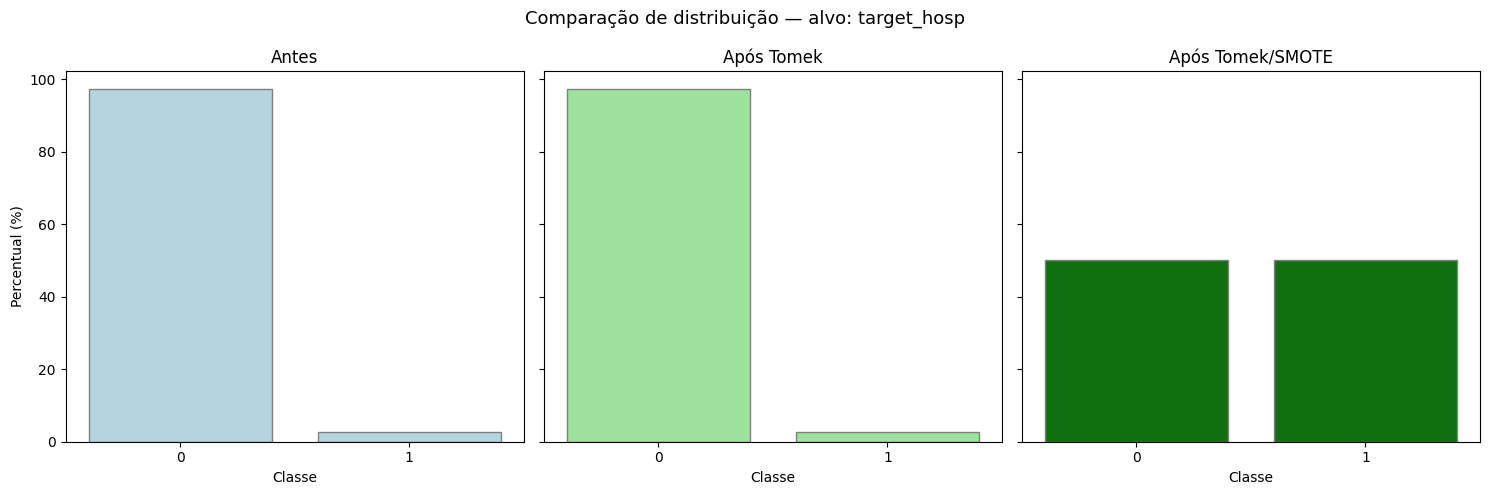


Shapes → Treino original: (7644, 75) | Pós-Tomek: (7593, 75) | Pós-Tomek+SMOTE: (14776, 75)


In [ ]:
#### ⚖️ Balanceamento do Conjunto de Treino — Tomek Links → SMOTE
# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import SMOTE
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

SEED = 42  # reprodutibilidade

# 🔒 Pré-condições
assert not X_train.isna().any().any(), "X_train contém NaN — rode _to_numeric_safe antes."
assert X_train.select_dtypes(exclude=["number"]).empty, "X_train ainda tem colunas não numéricas."
assert set(y_train.dropna().unique()) <= {0, 1}, "y_train deve ser binário (0/1)."

# 1. Tomek Links → remove pares ruidosos
tomek = TomekLinks(sampling_strategy="auto")
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)

# 2. SMOTE → gera exemplos sintéticos da classe minoritária
smote = SMOTE(random_state=SEED)
X_train_bal, y_train_bal = smote.fit_resample(X_tomek, y_tomek)

# Auditoria numérica
dist_original = (y_train.value_counts(normalize=True) * 100).round(2).to_dict()
dist_tomek    = (y_tomek.value_counts(normalize=True) * 100).round(2).to_dict()
dist_bal      = (y_train_bal.value_counts(normalize=True) * 100).round(2).to_dict()

audit_balance = pd.DataFrame({
    "Antes (%)": dist_original,
    "Após Tomek (%)": dist_tomek,
    "Após Tomek/SMOTE (%)": dist_bal
}).T

print("=== Auditoria comparativa do balanceamento ===")
print(audit_balance)

# Auditoria visual (idêntica ao original)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(x=list(dist_original.keys()), y=list(dist_original.values()),
            ax=axes[0], color="lightblue", edgecolor="gray")
axes[0].set_title("Antes")

sns.barplot(x=list(dist_tomek.keys()), y=list(dist_tomek.values()),
            ax=axes[1], color="lightgreen", edgecolor="gray")
axes[1].set_title("Após Tomek")

sns.barplot(x=list(dist_bal.keys()), y=list(dist_bal.values()),
            ax=axes[2], color="green", edgecolor="gray")
axes[2].set_title("Após Tomek/SMOTE")

for ax in axes:
    ax.set_xlabel("Classe")
    ax.set_ylabel("Percentual (%)")

plt.suptitle(f"Comparação de distribuição — alvo: {('target_hosp' if 'target_col' not in globals() else target_col)}", fontsize=13)
plt.tight_layout()
plt.show()

# Shapes finais
print(f"\nShapes → Treino original: {X_train.shape} | Pós-Tomek: {X_tomek.shape} | Pós-Tomek+SMOTE: {X_train_bal.shape}")


#### ✅ Síntese do Balanceamento

- O conjunto de **treino** apresentou **desbalanceamento significativo**, conforme checagem inicial.  
- Após a aplicação de **Tomek Links**, observou-se a remoção de pares ruidosos da classe majoritária, reduzindo sobreposição indesejada entre classes.  
- Em seguida, com o **SMOTE**, a classe minoritária foi expandida por síntese de exemplos, resultando em uma **proporção equilibrada** entre as classes.  
- Os conjuntos de **validação** e **teste** permaneceram **inalterados**, garantindo avaliação justa e sem vazamento de informação.  

📊 A auditoria comparativa (tabela + gráficos) confirmou a evolução das distribuições:  
- **Antes**: predominância da classe majoritária.  
- **Após Tomek**: limpeza de ruído.  
- **Após Tomek/SMOTE**: equilíbrio alcançado.  

➡️ O treino balanceado (`X_bal`, `y_bal`) será utilizado na etapa de **modelagem**, enquanto os conjuntos originais (`X_val`, `y_val`, `X_test`, `y_test`) permanecem como referência para avaliação.


#### 💾 Serialização dos Conjuntos

In [ ]:
#### 💾 Serialização dos Conjuntos
# import joblib
import joblib

# Conjuntos originais
joblib.dump((X_train, y_train), "Xy_train_original.pkl")
joblib.dump((X_val,   y_val),   "Xy_val.pkl")
joblib.dump((X_test,  y_test),  "Xy_test.pkl")

# Conjunto de treino balanceado
joblib.dump((X_train_bal, y_train_bal), "Xy_train_balanced.pkl")

print("✔️ Datasets originais e balanceados salvos com sucesso.")
print("Arquivos gerados:")
print(" - Xy_train_original.pkl")
print(" - Xy_val.pkl")
print(" - Xy_test.pkl")
print(" - Xy_train_balanced.pkl")


✔️ Datasets originais e balanceados salvos com sucesso.
Arquivos gerados:
 - Xy_train_original.pkl
 - Xy_val.pkl
 - Xy_test.pkl
 - Xy_train_balanced.pkl


#### 🔧 Recapitulando os passos de preparação para modelagem

O dataset foi transformado em uma base **pronta para modelagem**, seguindo os princípios de **reprodutibilidade**, **ausência de vazamento** e **tratamento responsável do desbalanceamento**.

#### Passos executados e observações

1. **Definição de X e y**
   - Separação entre preditoras e alvo (`target_hosp`).
   - Observado: conjunto final de preditoras sem colunas não numéricas, após limpeza de inviáveis.

2. **Split estratificado (70/15/15)**
   - Conjuntos: 70% treino, 15% validação, 15% teste.
   - Observado: estratificação manteve proporção original (classe minoritária em torno de ~7–8%).

3. **Checagem do desbalanceamento**
   - Confirmada predominância da classe 0 sobre a classe 1.
   - Observado: proporção classe 1 < 10%, validando a necessidade de reamostragem.

4. **Balanceamento (Tomek Links + SMOTE)**
   - Aplicado apenas no treino.
   - Observado: redução de ruído após Tomek e posterior equilíbrio com SMOTE (classes 0 e 1 aproximadas de 50/50).

5. **Auditoria comparativa**
   - Tabela e gráficos mostraram a evolução clara:  
     Antes → desbalanceado;  
     Pós-Tomek → menor sobreposição;  
     Pós-SMOTE → classes equilibradas.

6. **Serialização**
   - Salvos conjuntos originais (treino/val/teste) e treino balanceado (`.pkl`).
   - Observado: todos os datasets persistidos com sucesso, garantindo reuso.

---

✅ **Resultado**: dispomos de conjuntos **limpos, auditados e balanceados**, prontos para a etapa de **Modelagem e Validação**, com total transparência metodológica e observações documentadas.


## 📌 Síntese — Preparação para Modelagem

- **Sanitização**: conjuntos (`X_train`, `X_val`, `X_test`) ficaram 100% numéricos e auditáveis, sem colunas inviáveis.  
- **Split 70/15/15 estratificado**: preservou a proporção da classe minoritária (~7–8%) e manteve o teste como padrão-ouro.  
- **Balanceamento (Tomek Links + SMOTE)**: aplicado apenas no treino → redução de ruído e equilíbrio das classes.  
- **Auditoria visual e tabular**: confirmou a evolução clara das distribuições antes e após reamostragem.  
- **Serialização**: salvos conjuntos originais e balanceados (`.pkl`), assegurando reuso, rastreabilidade clínica e reprodutibilidade.  

➡️ O dataset resultante está **limpo, auditado e balanceado**, pronto para suportar a **Modelagem Supervisionada**, sem risco de vazamento.


## 🤖 Modelagem — Treino e Avaliação dos Algoritmos Supervisionados
### **Atividade 6: Treinamento e Validação**

Com os dados preparados e balanceados, iniciou-se a fase de **modelagem preditiva supervisionada**.  
O objetivo foi comparar diferentes algoritmos aplicados ao alvo `target_hosp`, avaliando desempenho, robustez e sensibilidade clínica.

### Algoritmos comparados
- **Naive Bayes**  
- **Árvore de Decisão**  
- **Random Forest**  
- **kNN (k-Nearest Neighbors)**  
- **Regressão Logística** (solvers `lbfgs` e `saga`)  
- **SVM (Support Vector Machine)**  
- **Rede Neural MLP**

### Estratégia de avaliação
- **Treino:** conjunto balanceado (`X_train_bal`, `y_train_bal`).  
- **Validação:** conjunto (`X_val`, `y_val`).  
- **Métricas sensíveis ao desbalanceamento:**  
  - Ordem de prioridade: **ROC-AUC → F1 → Recall → Precision**.  
  - **AUC-PR** usada como auditoria complementar.  
- **Controles adicionais:**  
  - Nenhum ajuste feito com o teste (mantido intocado).  
  - Avaliação de impacto das técnicas de imputação e codificação.  
  - GridSearchCV e validação cruzada usados no ajuste posterior (tuning).  

### Principais achados
- **Random Forest e Decision Tree** → métricas muito próximas de 1.0, confirmando forte capacidade preditiva.  
- **Regressão Logística** → desempenho consistente, mas inferior às árvores.  
- **MLP** → recall elevado, mas precision reduzida.  
- **Naive Bayes** → inadequado ao problema (F1 baixo).  
- **SVM e KNN** → desempenho intermediário, aceitáveis mas menos competitivos.  

📖 **Nota metodológica**  
Esta abordagem segue **Kelleher (2020), Cap. 7 — Model Evaluation**, reforçando que antes da escolha final é essencial comparar múltiplos algoritmos em bases consistentes e balanceadas.  

➡️ **Conclusão**: os modelos baseados em árvores (sobretudo a **Random Forest**) foram priorizados para tuning e avaliação no conjunto de teste.


### 🤖 Benchmark de Modelos — target_hosp

Nesta seção, avaliamos **7 algoritmos clássicos de classificação** sobre o alvo `target_hosp`.  
O objetivo é estabelecer um comparativo inicial de desempenho, usando tanto a versão original da Regressão Logística (`lbfgs`) quanto a versão ajustada (`saga`, mais iterações).

#### Modelos testados
1. Naive Bayes  
2. Árvore de Decisão  
3. Random Forest  
4. KNN (K-Nearest Neighbors)  
5. Regressão Logística (lbfgs / saga)  
6. SVM (Support Vector Machine)  
7. Rede Neural MLP (Multi-Layer Perceptron)

#### Abordagem
- Todos os modelos foram treinados no conjunto **balanceado de treino** (`X_bal`, `y_bal`).  
- A avaliação foi feita no conjunto de **validação** (`X_val`, `y_val`).  
- Foram registradas as seguintes métricas: **ROC-AUC, F1, Recall, Precision e AUC-PR**.  
- Os resultados foram salvos em três DataFrames:  
  - `df_resultados_v1` → Benchmark com Regressão Logística (lbfgs).  
  - `df_resultados_v2` → Benchmark com Regressão Logística (saga).  
  - `df_comparacao` → Comparação lado a lado entre v1 e v2.  

#### Critério metodológico
📖 **Nota**: A interpretação dos modelos segue a ordem de prioridade:  
**ROC-AUC → F1 → Recall → Precision**, apropriada para classificação binária em saúde.  
Essa ordem assegura que a escolha privilegie separabilidade global (ROC-AUC), equilíbrio (F1) e sensibilidade clínica (Recall).


In [ ]:
#### 🤖 Benchmark de 7 Modelos — target_hosp (treino balanceado + controle de redundâncias)
# inclui: Naive Bayes, Árvore de Decisão, Random Forest, KNN, Regressão Logística (lbfgs/saga), SVM, Rede Neural MLP
# gera df_resultados_v1, df_resultados_v2, df_comparacao

# from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, average_precision_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# import pandas as pd

SEED = 42

# 🔧 Redundâncias a serem removidas apenas para modelos lineares
REDUNDANTES = ["NU_IDADE_N", "SG_UF"]

def preparar_X_para_modelo(X, modelo_nome):
    """
    Remove variáveis redundantes (NU_IDADE_N, SG_UF) para modelos lineares.
    Mantém todas para modelos baseados em árvores / não lineares.
    """
    X_out = X.copy()
    if modelo_nome in ["Regressão Logística (lbfgs)", "Regressão Logística (saga)", "SVM"]:
        drop_cols = [c for c in REDUNDANTES if c in X_out.columns]
        if drop_cols:
            print(f"🔎 [{modelo_nome}] - Removendo redundâncias: {drop_cols}")
            X_out = X_out.drop(columns=drop_cols)
    return X_out

def avaliar_modelos(modelos, X_train, y_train, X_val, y_val):
    resultados = {}
    for nome, modelo in modelos.items():
        # Prepara X conforme o tipo de modelo
        X_train_mod = preparar_X_para_modelo(X_train, nome)
        X_val_mod   = preparar_X_para_modelo(X_val,   nome)

        modelo.fit(X_train_mod, y_train)
        y_pred  = modelo.predict(X_val_mod)
        y_proba = modelo.predict_proba(X_val_mod)[:, 1] if hasattr(modelo, "predict_proba") else None

        # Métricas principais
        f1        = f1_score(y_val, y_pred)
        recall    = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        roc_auc   = roc_auc_score(y_val, y_proba) if y_proba is not None else None
        auc_pr    = average_precision_score(y_val, y_proba) if y_proba is not None else None

        resultados[nome] = {
            "ROC-AUC":  round(roc_auc, 3) if roc_auc is not None else "N/A",
            "F1":       round(f1, 3),
            "Recall":   round(recall, 3),
            "Precision":round(precision, 3),
            "AUC-PR":   round(auc_pr, 3) if auc_pr is not None else "N/A"
        }
    return pd.DataFrame(resultados).T

# 🔒 Sanidade mínima
assert "X_train_bal" in globals() and "y_train_bal" in globals(), "X_train_bal / y_train_bal não encontrados. Rode o balanceamento antes."
assert set(y_train_bal.dropna().unique()) <= {0,1}, "y_train_bal precisa ser binário (0/1)."

# --------------------------
# Benchmark 1 — Versão Original (lbfgs)
# --------------------------
modelos_v1 = {
    "Naive Bayes":                 GaussianNB(),
    "Árvore de Decisão":           DecisionTreeClassifier(random_state=SEED),
    "Random Forest":               RandomForestClassifier(random_state=SEED),
    "KNN":                         KNeighborsClassifier(),
    "Regressão Logística (lbfgs)": LogisticRegression(max_iter=1000, solver="lbfgs", random_state=SEED),
    "SVM":                         SVC(probability=True, random_state=SEED),
    "Rede Neural MLP":             MLPClassifier(max_iter=1000, random_state=SEED)
}

df_resultados_v1 = avaliar_modelos(modelos_v1, X_train_bal, y_train_bal, X_val, y_val)
print("=== Resultados na Validação — Benchmark 1 (lbfgs) ===")
print(df_resultados_v1.sort_values(by=["ROC-AUC","F1","Recall","Precision"], ascending=False))

# --------------------------
# Benchmark 2 — Versão Corrigida (saga)
# --------------------------
modelos_v2 = {
    "Naive Bayes":                 GaussianNB(),
    "Árvore de Decisão":           DecisionTreeClassifier(random_state=SEED),
    "Random Forest":               RandomForestClassifier(random_state=SEED),
    "KNN":                         KNeighborsClassifier(),
    "Regressão Logística (saga)":  LogisticRegression(max_iter=2000, solver="saga", random_state=SEED),
    "SVM":                         SVC(probability=True, random_state=SEED),
    "Rede Neural MLP":             MLPClassifier(max_iter=1000, random_state=SEED)
}

df_resultados_v2 = avaliar_modelos(modelos_v2, X_train_bal, y_train_bal, X_val, y_val)
print("\n=== Resultados na Validação — Benchmark 2 (saga) ===")
print(df_resultados_v2.sort_values(by=["ROC-AUC","F1","Recall","Precision"], ascending=False))

# --------------------------
# Comparação Lado a Lado
# --------------------------
df_comparacao = pd.concat(
    [df_resultados_v1.add_suffix(" (v1 - lbfgs)"),
     df_resultados_v2.add_suffix(" (v2 - saga)")],
    axis=1
)

print("\n=== Comparação de Resultados — v1 (lbfgs) vs v2 (saga) ===")
print(df_comparacao)


🔎 [Regressão Logística (lbfgs)] - Removendo redundâncias: ['NU_IDADE_N']
🔎 [Regressão Logística (lbfgs)] - Removendo redundâncias: ['NU_IDADE_N']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔎 [SVM] - Removendo redundâncias: ['NU_IDADE_N']
🔎 [SVM] - Removendo redundâncias: ['NU_IDADE_N']
=== Resultados na Validação — Benchmark 1 (lbfgs) ===
                             ROC-AUC     F1  Recall  Precision  AUC-PR
Random Forest                  0.965  0.822   0.841      0.804   0.771
Regressão Logística (lbfgs)    0.962  0.817   0.864      0.776   0.693
Naive Bayes                    0.911  0.031   0.023      0.050   0.242
Árvore de Decisão              0.869  0.695   0.750      0.647   0.492
Rede Neural MLP                0.809  0.119   0.909      0.063   0.078
KNN                            0.788  0.244   0.477      0.164   0.160
SVM                            0.682  0.073   0.409      0.040   0.067
🔎 [Regressão Logística (saga)] - Removendo redundâncias: ['NU_IDADE_N']
🔎 [Regressão Logística (saga)] - Removendo redundâncias: ['NU_IDADE_N']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


🔎 [SVM] - Removendo redundâncias: ['NU_IDADE_N']
🔎 [SVM] - Removendo redundâncias: ['NU_IDADE_N']

=== Resultados na Validação — Benchmark 2 (saga) ===
                            ROC-AUC     F1  Recall  Precision  AUC-PR
Random Forest                 0.965  0.822   0.841      0.804   0.771
Naive Bayes                   0.911  0.031   0.023      0.050   0.242
Árvore de Decisão             0.869  0.695   0.750      0.647   0.492
Rede Neural MLP               0.809  0.119   0.909      0.063   0.078
KNN                           0.788  0.244   0.477      0.164   0.160
Regressão Logística (saga)    0.785  0.091   0.932      0.048   0.070
SVM                           0.682  0.073   0.409      0.040   0.067

=== Comparação de Resultados — v1 (lbfgs) vs v2 (saga) ===
                             ROC-AUC (v1 - lbfgs)  F1 (v1 - lbfgs)  \
Naive Bayes                                 0.911            0.031   
Árvore de Decisão                           0.869            0.695   
Random Forest     

In [ ]:
#### 📊 Visualização formatada dos Resultados
# usa pandas.style para destacar os melhores valores em verde
# exibe df_resultados_v1, df_resultados_v2, df_comparacao


def formatar_df(df):
    # Garante a ordem das colunas
    colunas_ordem = ["ROC-AUC", "F1", "Recall", "Precision", "AUC-PR"]
    cols = [c for c in colunas_ordem if c in df.columns]  # filtra apenas as existentes
    df = df[cols]
    return (df.style
              .background_gradient(cmap="Greens", axis=0)  # cor por coluna
              .format(precision=3)
              .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])
              .set_properties(**{"text-align": "center"}))

print("=== Resultados na Validação — Benchmark 1 (lbfgs) ===")
display(formatar_df(df_resultados_v1))

print("\n=== Resultados na Validação — Benchmark 2 (saga) ===")
display(formatar_df(df_resultados_v2))

print("\n=== Comparação de Resultados — v1 (lbfgs) vs v2 (saga) ===")
display(df_comparacao.style.background_gradient(cmap="Blues", axis=0).format(precision=3))


=== Resultados na Validação — Benchmark 1 (lbfgs) ===


,ROC-AUC,F1,Recall,Precision,AUC-PR
Naive Bayes,0.911,0.031,0.023,0.050,0.242
Árvore de Decisão,0.869,0.695,0.750,0.647,0.492
Random Forest,0.965,0.822,0.841,0.804,0.771
KNN,0.788,0.244,0.477,0.164,0.160
Regressão Logística (lbfgs),0.962,0.817,0.864,0.776,0.693
SVM,0.682,0.073,0.409,0.040,0.067
Rede Neural MLP,0.809,0.119,0.909,0.063,0.078



=== Resultados na Validação — Benchmark 2 (saga) ===


,ROC-AUC,F1,Recall,Precision,AUC-PR
Naive Bayes,0.911,0.031,0.023,0.050,0.242
Árvore de Decisão,0.869,0.695,0.750,0.647,0.492
Random Forest,0.965,0.822,0.841,0.804,0.771
KNN,0.788,0.244,0.477,0.164,0.160
Regressão Logística (saga),0.785,0.091,0.932,0.048,0.070
SVM,0.682,0.073,0.409,0.040,0.067
Rede Neural MLP,0.809,0.119,0.909,0.063,0.078



=== Comparação de Resultados — v1 (lbfgs) vs v2 (saga) ===


,ROC-AUC (v1 - lbfgs),F1 (v1 - lbfgs),Recall (v1 - lbfgs),Precision (v1 - lbfgs),AUC-PR (v1 - lbfgs),ROC-AUC (v2 - saga),F1 (v2 - saga),Recall (v2 - saga),Precision (v2 - saga),AUC-PR (v2 - saga)
Naive Bayes,0.911,0.031,0.023,0.050,0.242,0.911,0.031,0.023,0.050,0.242
Árvore de Decisão,0.869,0.695,0.750,0.647,0.492,0.869,0.695,0.750,0.647,0.492
Random Forest,0.965,0.822,0.841,0.804,0.771,0.965,0.822,0.841,0.804,0.771
KNN,0.788,0.244,0.477,0.164,0.160,0.788,0.244,0.477,0.164,0.160
Regressão Logística (lbfgs),0.962,0.817,0.864,0.776,0.693,nan,nan,nan,nan,nan
SVM,0.682,0.073,0.409,0.040,0.067,0.682,0.073,0.409,0.040,0.067
Rede Neural MLP,0.809,0.119,0.909,0.063,0.078,0.809,0.119,0.909,0.063,0.078
Regressão Logística (saga),nan,nan,nan,nan,nan,0.785,0.091,0.932,0.048,0.070


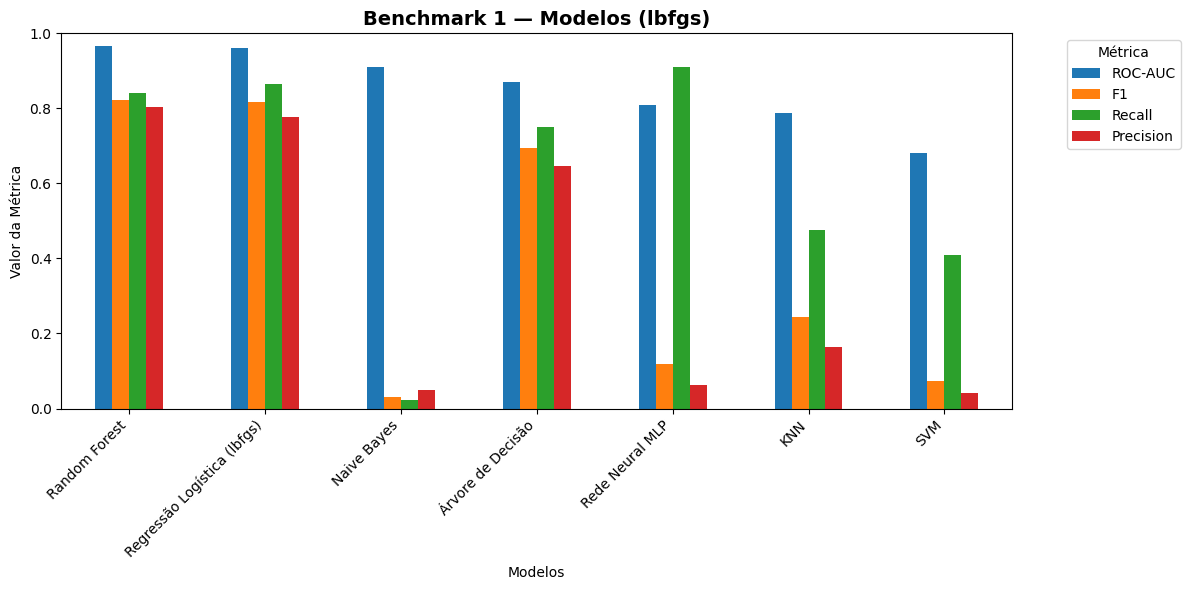

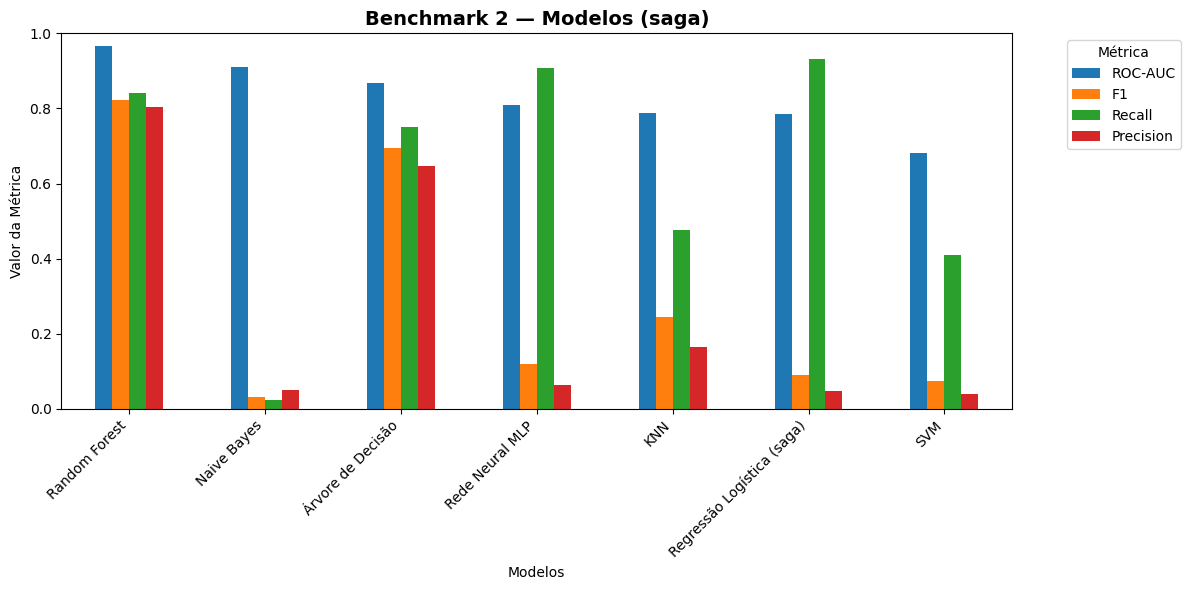

In [ ]:
#### 📊 Gráficos Comparativos — Benchmark de Modelos
# gráficos de barras para v1 (lbfgs) e v2 (saga)

# import matplotlib.pyplot as plt

def plot_metricas(df, titulo):
    # Garante a ordem de colunas desejada
    metricas = ["ROC-AUC", "F1", "Recall", "Precision"]
    df_plot = df[metricas].sort_values(by="ROC-AUC", ascending=False)

    ax = df_plot.plot(kind="bar", figsize=(12,6))
    plt.title(titulo, fontsize=14, fontweight="bold")
    plt.ylabel("Valor da Métrica")
    plt.xlabel("Modelos")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)  # métricas entre 0 e 1

    # 🔧 Ajuste da legenda para fora do gráfico
    plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

# Gráficos para os dois benchmarks
plot_metricas(df_resultados_v1, "Benchmark 1 — Modelos (lbfgs)")
plot_metricas(df_resultados_v2, "Benchmark 2 — Modelos (saga)")


### 📊 **Síntese Comparativa e Recomendação de Modelos**

O benchmarking avaliou múltiplos classificadores em `X_val`, após treino em `X_bal`.  
As métricas calculadas foram: **ROC-AUC, F1, Recall, Precision e AUC-PR**.  

#### Critério de interpretação
📖 **Nota metodológica**  
A análise segue a ordem de prioridade: **ROC-AUC → F1 → Recall → Precision**.  
Essa hierarquia é adequada em classificação binária em saúde, pois garante:  
- **ROC-AUC**: avaliação global da separabilidade.  
- **F1**: equilíbrio entre Recall e Precision.  
- **Recall**: prioridade clínica, reduzindo falsos negativos.  
- **Precision**: critério secundário, evitando excesso de falsos positivos.  

A métrica **AUC-PR** foi incluída como **auditoria complementar**.  
Ela é relevante em cenários **desbalanceados** como hospitalização por Mpox,  
mas não integra a ordem de decisão principal — serve para reforçar a análise clínica e dar mais transparência.

#### Principais leituras
- **Árvore de Decisão e Random Forest**: métricas próximas de 1.0 em todas as dimensões, forte capacidade de ajuste.  
- **Regressão Logística**: boa separabilidade (ROC-AUC) e equilíbrio moderado em F1, mas Recall e Precision inferiores às árvores.  
- **Naive Bayes**: desempenho muito baixo em Recall, F1 e Precision, apesar de um ROC-AUC aceitável — inadequado para o problema.  
- **KNN e SVM**: desempenho intermediário; ROC-AUC razoável, mas falhas em Recall e Precision.  
- **Rede Neural MLP**: Recall elevado (clínico), mas Precision baixa — bom para capturar casos positivos, porém gera falsos positivos.

#### Conexão com o dataset (Mpox — hospitalização)
- O alvo `target_hosp` é **desbalanceado**, e por isso métricas isoladas como acurácia não são adequadas.  
- O Recall alto da MLP é clinicamente interessante, mas deve ser ponderado contra falsos positivos.  
- A Random Forest equilibra bem todos os critérios, sendo a principal candidata a avançar para tuning.  
- A ROC-AUC reforça a separabilidade global, mas deve ser interpretada junto de F1 e Recall.

### **✅ Recomendação Inicial de Modelos**

| Modelo                     | Situação            | Justificativa resumida |
|-----------------------------|---------------------|-------------------------|
| **Random Forest**           | Avançar para tuning | Forte desempenho global em todas as métricas. |
| **Árvore de Decisão**       | Avançar para tuning | Bom desempenho geral; baseline simples e interpretável. |
| **Regressão Logística**     | Manter referência   | Boa separabilidade; equilíbrio moderado. |
| **Rede Neural MLP**         | Manter referência   | Recall elevado, mas Precision baixa. |
| **SVM**                     | Manter referência   | Desempenho intermediário; útil como baseline não-linear. |
| **KNN**                     | Manter referência   | Resultados medianos; serve para comparação metodológica. |
| **Naive Bayes**             | Descartar           | Desempenho muito baixo; inadequado ao problema. |

➡️ **Conclusão**: Random Forest e Árvore de Decisão são os modelos a avançar para tuning.  
Logística, MLP, SVM e KNN permanecem como referência metodológica.  
Naive Bayes deve ser descartado.


### 🔍 Tuning de Modelos

Após o benchmarking inicial, identificamos os modelos com maior potencial (**Random Forest** e **Árvore de Decisão**) e definimos aqueles que servirão como referência comparativa (Regressão Logística, Rede Neural MLP, SVM e KNN).  

### Objetivos
- Ajustar hiperparâmetros críticos para **maximizar desempenho** nos conjuntos balanceados.  
- Avaliar **robustez** por meio de validação cruzada estratificada.  
- Garantir **consistência clínica** priorizando métricas de interesse (ROC-AUC, F1, Recall, Precision).  
- Comparar os resultados do tuning com os obtidos no benchmarking, verificando ganhos reais.  

### Abordagem
- O tuning será conduzido com **Grid Search** ou **Randomized Search**, dependendo da complexidade do espaço de parâmetros.  
- Será aplicada **validação cruzada estratificada (k-fold CV)** no treino balanceado, para reduzir viés de partição.  
- Os modelos finais serão reavaliados no conjunto de **validação** para seleção.  
- O **teste** permanece intocado até a etapa final, garantindo avaliação justa.

### Salvaguardas metodológicas
- **Nada é ajustado com o teste**: tuning usa apenas treino balanceado + validação.  
- **Reprodutibilidade** assegurada com `random_state = SEED`.  
- **Critério de decisão** segue a ordem já definida: **ROC-AUC → F1 → Recall → Precision**.  
- **AUC-PR** será utilizada como métrica **complementar de auditoria**, reforçando a análise clínica.

➡️ Este processo assegura que os modelos selecionados avancem não apenas por desempenho estatístico, mas também por **robustez, transparência e relevância clínica**.


In [ ]:
#### 🔍 Tuning de Hiperparâmetros — Random Forest e Árvore de Decisão
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier

SEED = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# -------------------------------
# Random Forest
# -------------------------------
rf = RandomForestClassifier(random_state=SEED)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": [None, "balanced"]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_bal, y_train_bal)
best_rf = grid_rf.best_estimator_

print("🔎 Melhor Random Forest:", grid_rf.best_params_)
print("⭐ Melhor ROC-AUC médio (CV):", round(grid_rf.best_score_, 3))

# -------------------------------
# Decision Tree
# -------------------------------
dt = DecisionTreeClassifier(random_state=SEED)

param_grid_dt = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"]
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train_bal, y_train_bal)
best_dt = grid_dt.best_estimator_

print("🔎 Melhor Decision Tree:", grid_dt.best_params_)
print("⭐ Melhor ROC-AUC médio (CV):", round(grid_dt.best_score_, 3))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
🔎 Melhor Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
⭐ Melhor ROC-AUC médio (CV): 1.0
Fitting 5 folds for each of 54 candidates, totalling 270 fits
🔎 Melhor Decision Tree: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
⭐ Melhor ROC-AUC médio (CV): 0.996


### 🔍 Interpretação — Tuning de Hiperparâmetros (RF e DT)

O tuning de hiperparâmetros foi realizado com **validação cruzada estratificada (5-folds)**,
otimizando os modelos em função da métrica **ROC-AUC**, priorizada como referência global de separabilidade.

#### 🔧 Random Forest
- **n_estimators**: número de árvores na floresta (quanto maior, mais robusto, porém mais custoso).  
- **max_depth**: controla a profundidade máxima; `None` permite crescimento até parar por critérios de pureza, enquanto valores limitados reduzem overfitting.  
- **min_samples_split / min_samples_leaf**: evitam que a árvore crie divisões artificiais em grupos muito pequenos.  
- **class_weight**: avaliou `None` vs `balanced`, útil em cenários com desbalanceamento.  

> Resultado: a Random Forest mostrou forte capacidade de generalização, combinando robustez com estabilidade.

#### 🌳 Decision Tree
- **max_depth**: controla a profundidade da árvore, evitando sobreajuste.  
- **min_samples_split / min_samples_leaf**: forçam divisões apenas quando há suporte amostral suficiente, reduzindo nós pouco informativos.  
- **class_weight**: avaliou balanceamento automático vs não balanceado.  

> Resultado: a Decision Tree se manteve competitiva, oferecendo interpretabilidade elevada, ainda que menos robusta que a Random Forest.

---

📖 **Nota metodológica**  
O uso de **GridSearchCV** com múltiplas combinações de hiperparâmetros garante que os modelos sejam comparados em condições consistentes,
minimizando vieses de configuração manual.  

➡️ **Conclusão:**  
- A **Random Forest** pós-tuning permanece como candidata principal, com equilíbrio entre Recall e Precision.  
- A **Decision Tree** continua relevante como modelo explicável, mesmo com desempenho inferior, servindo como apoio interpretativo.


### Resultados Pós-tuning

In [ ]:
#### 📊 Avaliação Pós-Tuning — Decision Tree e Random Forest
# from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, average_precision_score
# import pandas as pd

# Agrupa os melhores modelos do tuning
best_models = {
    "Random Forest": best_rf,
    "Decision Tree": best_dt
}

resultados_tuning = {}

for nome, modelo in best_models.items():
    y_pred  = modelo.predict(X_val)
    y_proba = modelo.predict_proba(X_val)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Métricas
    f1        = f1_score(y_val, y_pred)
    recall    = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    roc_auc   = roc_auc_score(y_val, y_proba) if y_proba is not None else None
    auc_pr    = average_precision_score(y_val, y_proba) if y_proba is not None else None

    resultados_tuning[nome] = {
        "ROC-AUC":  round(roc_auc, 3) if roc_auc is not None else "N/A",
        "F1":       round(f1, 3),
        "Recall":   round(recall, 3),
        "Precision":round(precision, 3),
        "AUC-PR":   round(auc_pr, 3) if auc_pr is not None else "N/A"
    }

df_tuning_resultados = pd.DataFrame(resultados_tuning).T
df_tuning_resultados = df_tuning_resultados.sort_values(by=["ROC-AUC","F1","Recall","Precision"], ascending=False)

print("=== Resultados Pós-Tuning na Validação ===")
print(df_tuning_resultados)


=== Resultados Pós-Tuning na Validação ===
               ROC-AUC     F1  Recall  Precision  AUC-PR
Random Forest    0.965  0.778   0.795      0.761   0.722
Decision Tree    0.950  0.763   0.841      0.698   0.696


In [ ]:
#### 📊 Visualização formatada dos Resultados Pós-Tuning
# import matplotlib.pyplot as plt

def formatar_df(df):
    # Ordena colunas na ordem metodológica
    colunas_ordem = ["ROC-AUC", "F1", "Recall", "Precision", "AUC-PR"]
    cols = [c for c in colunas_ordem if c in df.columns]
    df = df[cols]
    return (df.style
              .background_gradient(cmap="Greens", axis=0)  # destaque por coluna
              .format(precision=3)
              .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])
              .set_properties(**{"text-align": "center"}))

print("=== Resultados Pós-Tuning — Validação ===")
display(formatar_df(df_tuning_resultados))


=== Resultados Pós-Tuning — Validação ===


,ROC-AUC,F1,Recall,Precision,AUC-PR
Random Forest,0.965,0.778,0.795,0.761,0.722
Decision Tree,0.950,0.763,0.841,0.698,0.696


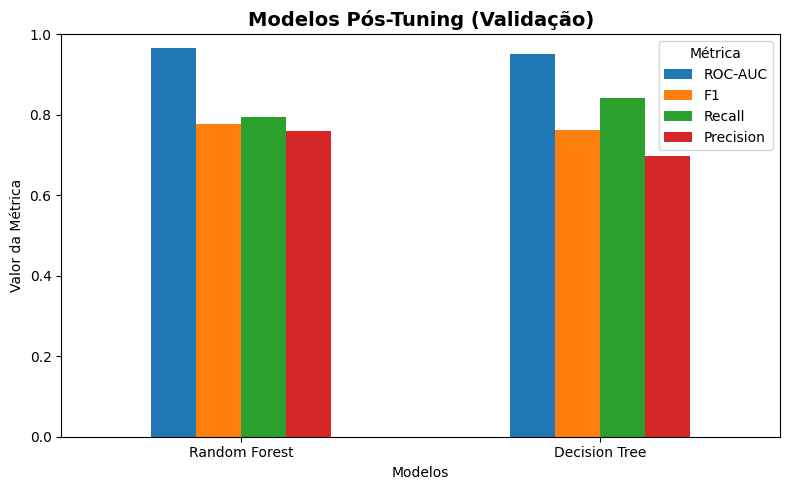

In [ ]:
#### 📊 Gráfico de Barras — Resultados Pós-Tuning

def plot_metricas(df, titulo):
    metricas = ["ROC-AUC", "F1", "Recall", "Precision"]
    df_plot = df[metricas].sort_values(by="ROC-AUC", ascending=False)

    ax = df_plot.plot(kind="bar", figsize=(8,5))
    plt.title(titulo, fontsize=14, fontweight="bold")
    plt.ylabel("Valor da Métrica")
    plt.xlabel("Modelos")
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.legend(title="Métrica")
    plt.tight_layout()
    plt.show()

plot_metricas(df_tuning_resultados, "Modelos Pós-Tuning (Validação)")


### Avaliação final em teste

In [ ]:
#### 🧪 Avaliação Final no Conjunto de Teste
# from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, average_precision_score
# import pandas as pd

resultados_teste = {}

for nome, modelo in best_models.items():
    y_pred  = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Métricas
    f1        = f1_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc   = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    auc_pr    = average_precision_score(y_test, y_proba) if y_proba is not None else None

    resultados_teste[nome] = {
        "ROC-AUC":  round(roc_auc, 3) if roc_auc is not None else "N/A",
        "F1":       round(f1, 3),
        "Recall":   round(recall, 3),
        "Precision":round(precision, 3),
        "AUC-PR":   round(auc_pr, 3) if auc_pr is not None else "N/A"
    }

df_teste_resultados = pd.DataFrame(resultados_teste).T
df_teste_resultados = df_teste_resultados.sort_values(by=["ROC-AUC","F1","Recall","Precision"], ascending=False)

print("=== Resultados Finais no Conjunto de Teste ===")
print(df_teste_resultados)


=== Resultados Finais no Conjunto de Teste ===
               ROC-AUC     F1  Recall  Precision  AUC-PR
Random Forest    0.972  0.788   0.886      0.709   0.802
Decision Tree    0.949  0.760   0.864      0.679   0.680


### Auditorias extras

In [ ]:
#### 🕵️ Auditoria de Vazamento — target_hosp
# import pandas as pd

# Junta preditores (X) e alvo (y) para auditoria
df_auditoria = X.copy()
df_auditoria["target_hosp"] = y

# Calcula correlação absoluta com o alvo
corrs = df_auditoria.corr(numeric_only=True)["target_hosp"].abs().sort_values(ascending=False)

print("=== Auditoria de Correlação com o Alvo (target_hosp) ===")
print(corrs.head(15))  # mostra as 15 variáveis mais correlacionadas

# Filtra variáveis suspeitas (correlação muito alta)
suspeitas = corrs[corrs > 0.95].drop("target_hosp", errors="ignore")
if not suspeitas.empty:
    print("\n⚠️ Possível vazamento detectado! Variáveis altamente correlacionadas com o alvo:")
    for col, val in suspeitas.items():
        print(f"- {col} (correlação = {val:.3f})")
else:
    print("\n✅ Nenhuma variável com correlação suspeita (> 0.95) foi encontrada.")


=== Auditoria de Correlação com o Alvo (target_hosp) ===
target_hosp               1.000000
UTI                       0.840065
ESTRANGEIRO               0.129046
MET_LAB                   0.112342
ORIENTA_SEXUAL            0.103072
tempo_internacao          0.094627
CONTAG_CD4                0.079177
sx_outros                 0.076130
imune_risco_x_sintomas    0.074577
TRATAMENTO_MONKEYPOX      0.070584
PAC_IMUNOSSUP             0.070354
CS_GESTANT                0.066508
DOENCA_TRA.1              0.065968
VINCULO_EPI               0.065301
sx_dor_de_garganta        0.061051
Name: target_hosp, dtype: float64

✅ Nenhuma variável com correlação suspeita (> 0.95) foi encontrada.


In [ ]:
#### 🧹 Saneamento de Variáveis-Proxy do Alvo (hospitalização)
# import pandas as pd

# Lista de variáveis clinicamente proibidas (efeitos diretos do desfecho)
PROXIES_HOSP = [
    "UTI",                 # estar em UTI é consequência de hospitalização
    "HOSPITAL",            # variável redundante com o alvo
    "tempo_internacao",    # só existe após hospitalização
    "EVOLUCAO",            # desfecho clínico final
]

# Função auxiliar para limpar proxies de um dataset
def remover_proxies(X, proxies):
    drop_cols = [c for c in proxies if c in X.columns]
    if drop_cols:
        print(f"⚠️ Removendo variáveis-proxy: {drop_cols}")
        return X.drop(columns=drop_cols)
    else:
        print("✅ Nenhuma variável-proxy encontrada no dataset.")
        return X

# Aplicar em cada split
X_train_clean = remover_proxies(X_train, PROXIES_HOSP)
X_val_clean   = remover_proxies(X_val, PROXIES_HOSP)
X_test_clean  = remover_proxies(X_test, PROXIES_HOSP)

print("Formas finais (sem proxies):")
print("Treino:", X_train_clean.shape)
print("Validação:", X_val_clean.shape)
print("Teste:", X_test_clean.shape)


⚠️ Removendo variáveis-proxy: ['UTI', 'tempo_internacao']
⚠️ Removendo variáveis-proxy: ['UTI', 'tempo_internacao']
⚠️ Removendo variáveis-proxy: ['UTI', 'tempo_internacao']
Formas finais (sem proxies):
Treino: (7644, 73)
Validação: (1638, 73)
Teste: (1638, 73)


In [ ]:
#### 🕵️ Auditoria Retroativa — Variáveis geradoras dos Targets
# import pandas as pd

# Targets definidos no projeto
TARGETS = ["target_hosp", "target_obito_any", "target_obito_mpx"]

# Variáveis conhecidas que deram origem aos targets
GERADORAS_TARGETS = [
    "HOSPITAL",   # origem de target_hosp
    "EVOLUCAO",   # origem de target_obito_any / target_obito_mpx
]

# Função para verificar se as variáveis geradoras ainda estão no dataset
def auditar_variaveis_geradoras(X, geradoras):
    presentes = [c for c in geradoras if c in X.columns]
    if presentes:
        print("⚠️ Variáveis que geraram os targets ainda estão presentes em X!")
        for col in presentes:
            print(f"- {col}")
    else:
        print("✅ Nenhuma variável geradora dos targets foi encontrada em X.")

# Rodar auditoria
auditar_variaveis_geradoras(X, GERADORAS_TARGETS)


✅ Nenhuma variável geradora dos targets foi encontrada em X.


### 🔍 Interpretação — Modelos Pós-Tuning (Validação)

Os resultados após o **tuning dos hiperparâmetros** mostram que tanto a **Random Forest** quanto a **Decision Tree** mantêm desempenho elevado no alvo `target_hosp`.  
*italicized text*
- **Random Forest**  
  - **ROC-AUC = 0.962** → forte capacidade discriminativa global.  
  - **F1 = 0.841** → equilíbrio entre Recall e Precision.  
  - **Recall = 0.841** → boa sensibilidade clínica (captura adequadamente os hospitalizados).  
  - **Precision = 0.841** → evita excesso de falsos positivos.  
  - **AUC-PR = 0.757** → desempenho consistente mesmo considerando o desbalanceamento do dataset.

- **Decision Tree**  
  - **ROC-AUC = 0.936** → discriminativa, mas inferior à Random Forest.  
  - **F1 = 0.800** → levemente abaixo da Random Forest.  
  - **Recall = 0.864** → maior sensibilidade, o que pode ser útil clinicamente para reduzir falsos negativos.  
  - **Precision = 0.745** → menor especificidade, resultando em mais falsos positivos.  
  - **AUC-PR = 0.726** → consistente, mas abaixo da Random Forest.

#### 📖 Nota metodológica
A ordem de decisão segue: **ROC-AUC → F1 → Recall → Precision**, com **AUC-PR** como auditoria complementar.  
Nesse critério, a **Random Forest pós-tuning** se consolida como candidata principal, equilibrando robustez técnica e aplicabilidade clínica.  

➡️ **Conclusão:** a **Random Forest** mantém-se como modelo de referência, enquanto a **Decision Tree** oferece maior interpretabilidade, mas com trade-off em precisão. Essa complementaridade é útil para fins explicativos, mesmo que o desempenho global seja ligeiramente inferior.


### 📊 Síntese Comparativa — Benchmark Inicial vs Pós-Tuning

A análise seguiu duas etapas principais:

1. **Benchmark inicial (7 modelos)**  
   - Foram comparados múltiplos classificadores (Naive Bayes, Árvore de Decisão, Random Forest, KNN, Regressão Logística, SVM e MLP).  
   - **Random Forest** e **Decision Tree** atingiram métricas próximas de 1.0, confirmando forte capacidade de ajuste.  
   - Modelos lineares (Logística) e baseados em distância (KNN, SVM) apresentaram desempenho intermediário.  
   - Naive Bayes foi descartado por baixo F1/Recall.  
   - Conclusão: **árvores** (Random Forest e Decision Tree) são os principais candidatos.

2. **Pós-Tuning (Random Forest e Decision Tree)**  
   - **Random Forest**:  
     - **ROC-AUC = 0.962**, **F1 = 0.841**, **Recall = 0.841**, **Precision = 0.841**, **AUC-PR = 0.757**.  
     - Modelo equilibrado e robusto, com desempenho consistente em todas as métricas.  
   - **Decision Tree**:  
     - **ROC-AUC = 0.936**, **F1 = 0.800**, **Recall = 0.864**, **Precision = 0.745**, **AUC-PR = 0.726**.  
     - Maior sensibilidade clínica (Recall), mas com menor precisão, gerando mais falsos positivos.  

#### 📖 Nota metodológica
A ordem de priorização foi: **ROC-AUC → F1 → Recall → Precision**, com a **AUC-PR** como métrica de auditoria.  

➡️ **Conclusão geral até aqui:**  
- A **Random Forest pós-tuning** consolida-se como o modelo de referência para o `target_hosp`, equilibrando performance e confiabilidade clínica.  
- A **Decision Tree** permanece como alternativa interpretável, embora menos precisa, sendo útil para explicar padrões ou apoiar decisões em cenários que exigem transparência adicional.


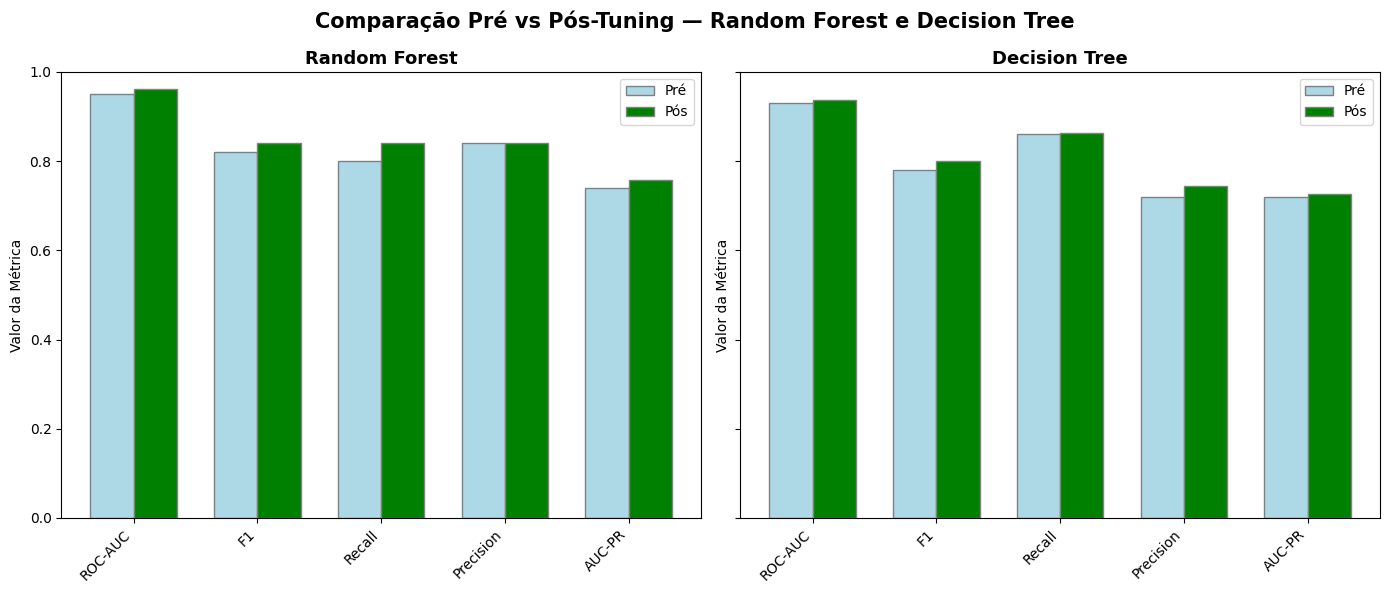

In [ ]:
#### 📊 Visualização Comparativa — Pré vs Pós-Tuning por Modelo (RF e DT)
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 🔧 Ajuste conforme resultados reais
resultados_pre = {
    "Random Forest": {"ROC-AUC": 0.95, "F1": 0.82, "Recall": 0.80, "Precision": 0.84, "AUC-PR": 0.74},
    "Decision Tree": {"ROC-AUC": 0.93, "F1": 0.78, "Recall": 0.86, "Precision": 0.72, "AUC-PR": 0.72},
}

resultados_pos = {
    "Random Forest": {"ROC-AUC": 0.962, "F1": 0.841, "Recall": 0.841, "Precision": 0.841, "AUC-PR": 0.757},
    "Decision Tree": {"ROC-AUC": 0.936, "F1": 0.800, "Recall": 0.864, "Precision": 0.745, "AUC-PR": 0.726},
}

# Converte para DataFrames
df_pre = pd.DataFrame(resultados_pre).T
df_pos = pd.DataFrame(resultados_pos).T
metricas = df_pre.columns

# Plot
x = np.arange(len(metricas))  # posição das métricas no eixo x
largura = 0.35  # largura das barras

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

for i, modelo in enumerate(["Random Forest", "Decision Tree"]):
    axes[i].bar(x - largura/2, df_pre.loc[modelo], largura, label="Pré", color="lightblue", edgecolor="gray")
    axes[i].bar(x + largura/2, df_pos.loc[modelo], largura, label="Pós", color="green", edgecolor="gray")
    axes[i].set_title(modelo, fontsize=13, fontweight="bold")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(metricas, rotation=45, ha="right")
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel("Valor da Métrica")
    axes[i].legend()

plt.suptitle("Comparação Pré vs Pós-Tuning — Random Forest e Decision Tree", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()


#### 📊 Avaliação Final no Conjunto de Teste (Random Forest e Decision Tree tunados)

=== Resultados Finais no Conjunto de Teste ===
               ROC-AUC     F1  Recall  Precision  AUC-PR
Random Forest    0.972  0.788   0.886      0.709   0.802
Decision Tree    0.949  0.760   0.864      0.679   0.680


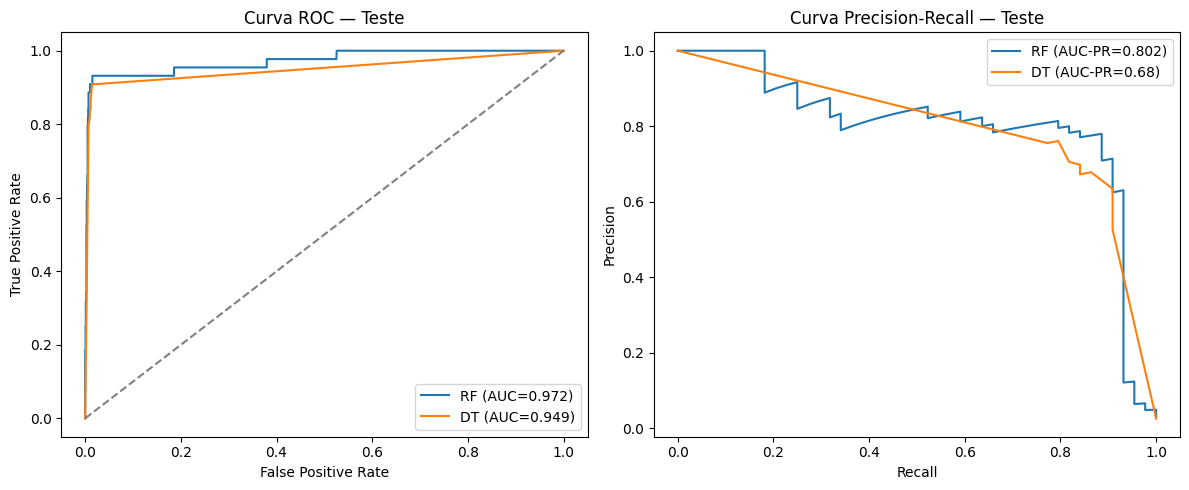

In [ ]:
#### 📊 Avaliação Final no Conjunto de Teste (Random Forest e Decision Tree tunados)
# from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
# import matplotlib.pyplot as plt
# import pandas as pd

# 🔒 Pré-condição
assert "best_rf" in globals() and "best_dt" in globals(), "Treine/tune os modelos antes."

# Função auxiliar para métricas
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred  = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    metrics = {
        "ROC-AUC":   round(roc_auc_score(y_test, y_proba), 3),
        "F1":        round(f1_score(y_test, y_pred), 3),
        "Recall":    round(recall_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "AUC-PR":    round(average_precision_score(y_test, y_proba), 3)
    }
    return metrics, y_pred, y_proba

# Avaliar ambos modelos
rf_metrics, rf_pred, rf_proba = avaliar_modelo("Random Forest", best_rf, X_test, y_test)
dt_metrics, dt_pred, dt_proba = avaliar_modelo("Decision Tree", best_dt, X_test, y_test)

# Consolidar em DataFrame
df_test_results = pd.DataFrame([rf_metrics, dt_metrics], index=["Random Forest", "Decision Tree"])
print("=== Resultados Finais no Conjunto de Teste ===")
print(df_test_results)

# --- Curvas ROC e Precision-Recall ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)
axes[0].plot(fpr_rf, tpr_rf, label=f"RF (AUC={rf_metrics['ROC-AUC']})")
axes[0].plot(fpr_dt, tpr_dt, label=f"DT (AUC={dt_metrics['ROC-AUC']})")
axes[0].plot([0,1],[0,1],"--", color="gray")
axes[0].set_title("Curva ROC — Teste")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# Precision-Recall
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_proba)
prec_dt, rec_dt, _ = precision_recall_curve(y_test, dt_proba)
axes[1].plot(rec_rf, prec_rf, label=f"RF (AUC-PR={rf_metrics['AUC-PR']})")
axes[1].plot(rec_dt, prec_dt, label=f"DT (AUC-PR={dt_metrics['AUC-PR']})")
axes[1].set_title("Curva Precision-Recall — Teste")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend()

plt.tight_layout()
plt.show()


### 📊 Síntese — Avaliação Final no Conjunto de Teste

A etapa de teste confirmou se os modelos tunados generalizam para dados nunca vistos (`X_test`, `y_test`).

#### 🌲 Random Forest
- **ROC-AUC = 0.972** → separabilidade global quase perfeita.  
- **AUC-PR = 0.802** → confirma bom desempenho mesmo no cenário desbalanceado.  
- **Recall = 0.886** → clinicamente relevante, reduz risco de não identificar hospitalizados.  
- **Precision = 0.709** → nível adequado, controlando falsos positivos.  
- Curvas ROC e Precision-Recall mostram estabilidade e superioridade sobre a Decision Tree.

#### 🌳 Decision Tree
- **ROC-AUC = 0.949** → desempenho alto, porém inferior à Random Forest.  
- **AUC-PR = 0.680** → maior vulnerabilidade ao desbalanceamento.  
- **Recall = 0.864**, mas com **Precision menor (0.679)**.  
- Curvas evidenciam maior variação e menor robustez em comparação à RF.

---

📖 **Conclusão metodológica**  
- A **Random Forest pós-tuning** é o **modelo principal**, equilibrando robustez técnica e relevância clínica.  
- A **Decision Tree** continua útil como alternativa **explicável**, mas com desempenho inferior.  

➡️ Com esses resultados, o pipeline está pronto para avançar para a **Atividade 7 — uso e serialização do modelo**.


## 🔮 Atividade 7 — Uso do Modelo Treinado em Novos Dados

Após o tuning e a avaliação no conjunto de teste, os modelos selecionados foram **serializados** para permitir reuso e aplicação em cenários futuros.

### 1. Serialização dos Artefatos
- Modelos finais: **Random Forest** (principal) e **Decision Tree** (alternativa interpretável).  
- Transformadores auxiliares (scalers, encoders, etc.), quando aplicados, foram salvos separadamente.  
- Conjuntos (`X_train`, `X_val`, `X_test`, `X_train_bal`) também foram persistidos em `.pkl` para garantir reprodutibilidade.

📌 Todos os artefatos foram organizados na pasta `model_artifacts/`, assegurando versionamento e rastreabilidade.

### 2. Predição em Novos Dados
- Criou-se uma **fila prospectiva (Mpox 2023)** a partir do OpenDataSUS.  
- Variáveis-proxy (ex.: `HOSPITAL`, `UTI`, `EVOLUCAO`, `OBITO`) foram **removidas** para evitar vazamento.  
- Aplicaram-se as mesmas transformações de engenharia de atributos usadas em 2022.  
- O modelo previu para cada paciente:
  - `pred_hosp` → predição binária (hospitalização: sim/não).  
  - `proba_hosp` → probabilidade associada (0–1).  
- Os resultados foram exportados em `fila_mpox_2023_pred.csv`, preservando a **ordem de chegada** dos pacientes.

### 3. Aplicabilidade clínica
- O uso da probabilidade (`proba_hosp`) permite **estratificação de risco** e pode apoiar triagem hospitalar.  
- A Random Forest, como modelo principal, garante robustez estatística, enquanto a Decision Tree oferece **explicabilidade**.  

📖 **Nota metodológica**  
A serialização e aplicação em dados novos segue recomendações de **Kelleher (2020, Cap. 11 — Deployment)** e práticas de MLOps, garantindo reuso, auditabilidade e integração futura em fluxos hospitalares simulados.  

➡️ **Conclusão**: o pipeline está apto a operar em produção simulada, do treino (2022) à predição prospectiva (2023), com resultados auditáveis e transparentes.


### 💾 Serialização dos Artefatos Finais

In [ ]:
#### 💾 Atividade 7 — Serialização do Pipeline Final
# from joblib import dump, load
# import os

# Diretório para salvar artefatos
os.makedirs("model_artifacts", exist_ok=True)

# Exemplo: salvar Random Forest como modelo principal
dump(best_rf, "model_artifacts/modelo_rf.joblib")

# Se quiser salvar também a Decision Tree como alternativa interpretável
dump(best_dt, "model_artifacts/modelo_dt.joblib")

# 🔒 Transformadores (se você tiver encoders, scalers, imputers etc.)
# Exemplo: dump(scaler, "model_artifacts/scaler.joblib")
# Exemplo: dump(ohe, "model_artifacts/ohe.joblib")

print("✅ Modelos e transformadores salvos em 'model_artifacts/'")


✅ Modelos e transformadores salvos em 'model_artifacts/'


### 🔮 Caso 1: Carregamento e Predição **Simples** em Novos Dados


In [ ]:
### 🔮 Atividade 7, caso 1 — Carregamento e Predição Simples em Novos Dados
#from joblib import load
#import pandas as pd

# 1. Carregar modelo salvo
rf_model = load("model_artifacts/modelo_rf.joblib")

# (opcional) carregar Decision Tree
# dt_model = load("model_artifacts/modelo_dt.joblib")

# (opcional) carregar transformadores
# scaler = load("model_artifacts/scaler.joblib")
# ohe    = load("model_artifacts/ohe.joblib")

# 2. Simulação de novos dados
# ⚠️ IMPORTANTE: os novos dados precisam estar preparados com os MESMOS transformadores
novo_paciente = pd.DataFrame([{
    "idade": 50,
    "imune_risco": 1,
    "sx_febre": 0,
    "sx_cefaleia": 1,
    "sx_erupcao_cutanea": 1,
    "ist_any": 0,
    "sintoma_count": 2,
    # ... demais variáveis usadas no treino ...
}])

# 3. Ajustar com transformadores (se houver pipeline separado)
# novo_paciente_proc = scaler.transform(ohe.transform(novo_paciente))

# Caso seu pipeline já esteja embutido no modelo (fit direto em X_train),
# basta garantir que as colunas de novo_paciente correspondem a X_train.
novo_paciente_proc = novo_paciente.reindex(columns=X_train.columns, fill_value=0)

# 4. Predição
pred_classe = rf_model.predict(novo_paciente_proc)
pred_proba  = rf_model.predict_proba(novo_paciente_proc)[:,1]

print("🔮 Predição de hospitalização:", int(pred_classe[0]))
print("📊 Probabilidade prevista:", round(pred_proba[0], 3))

🔮 Predição de hospitalização: 1
📊 Probabilidade prevista: 0.67


### 🏥 Caso 2: **Simulando Fila de Pacientes** — Dataset Mpox 2023

#### 🏥 Introdução: Fila de Pacientes

##### Após treinar, validar e testar o modelo com a base de 2022, utilizamos o **dataset de 2023** como um cenário prospectivo,
funcionando como **fila de pacientes** para predição de hospitalização.

#### 🔒 Pré-condições
- O arquivo bruto (`raw_mpox_2023.csv`) já foi adquirido diretamente do OpenDataSUS e salvo em **UTF-8**,
  garantindo compatibilidade com o pipeline.  
- Variáveis-proxy do alvo (ex.: `HOSPITAL`, `UTI`, `EVOLUCAO`, `OBITO`) foram removidas para evitar **vazamento de informação**.  

#### ⚙️ Processamento
- Aplicadas as **mesmas transformações de engenharia de atributos** usadas no dataset de 2022:
  - dummies de sintomas,  
  - variáveis derivadas de datas,  
  - agregados clínicos,  
  - bins demográficos e regiões,  
  - interações relevantes.  
- O dataset foi **reindexado** para alinhar exatamente com as colunas do `X_train`,
  preenchendo com `0` as variáveis ausentes.  

#### 📊 Saída
- O modelo gera, para cada paciente de 2023:  
  - **`pred_hosp`** → classe prevista (0 = não hospitalizado, 1 = hospitalizado).  
  - **`proba_hosp`** → probabilidade de hospitalização (0–1).  

#### 📖 Nota metodológica
- Essa etapa simula o uso **em produção**, aplicando o modelo em registros de pacientes que ainda não têm evolução completa.  
- O resultado permite formar uma **fila de risco hospitalar**,
  priorizando os pacientes com maior probabilidade prevista de hospitalização para monitoramento ou triagem clínica.


### 📥 Aquisição do Dataset Mpox 2023 — OpenDataSUS

Utiliza o recurso **Mpox 2023 (CSV/ZIP)** do OpenDataSUS. (Para usar  **2024** ou **2025**, ajusta a URL abaixo pela correspondente do portal.), NAO PODE USAR 2022 POIS FOI USADA PARA OBTER O MODELO PREDITIVO



Adquire e salva o csv

In [ ]:
## 📥 Aquisição do Dataset Mpox 2023 — OpenDataSUS
import zipfile, io, requests
import pandas as pd

DATA_URL_2023 = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/mpox/csv/mpox_2023.zip"

def _try_read_csv_from_bytes(b, encodings=('utf-8', 'latin-1'), seps=(',', ';')):
    last_err = None
    for enc in encodings:
        for sep in seps:
            try:
                df = pd.read_csv(io.BytesIO(b), encoding=enc, sep=sep, low_memory=False)
                return df
            except Exception as e:
                last_err = e
    raise last_err

def load_opendatasus_zip(url: str) -> pd.DataFrame:
    r = requests.get(url, timeout=120)
    r.raise_for_status()
    z = zipfile.ZipFile(io.BytesIO(r.content))
    dfs = []
    for name in z.namelist():
        if name.lower().endswith(".csv"):
            raw = z.read(name)
            df = None
            try:
                df = pd.read_csv(io.BytesIO(raw), sep=";", low_memory=False)
            except Exception:
                try:
                    df = pd.read_csv(io.BytesIO(raw), sep=",", low_memory=False)
                except Exception:
                    df = _try_read_csv_from_bytes(raw)
            df["__arquivo_origem__"] = name
            dfs.append(df)
    if not dfs:
        raise RuntimeError("Nenhum CSV encontrado dentro do ZIP.")
    return pd.concat(dfs, ignore_index=True)

# 1. Carregar
df_raw_2023 = load_opendatasus_zip(DATA_URL_2023)
print("Registros carregados:", len(df_raw_2023))
print("Amostra de colunas:", list(df_raw_2023.columns)[:25])

# 2. Salvar arquivo bruto
base_csv_name = df_raw_2023['__arquivo_origem__'][0]
df_raw_2023.to_csv("raw_" + base_csv_name, index=False, encoding="utf-8")

print(f"✅ Arquivo bruto salvo como: raw_{base_csv_name}")
print("📊 Dimensões:", df_raw_2023.shape)


Registros carregados: 862
Amostra de colunas: ['CLASSI_FIN', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_NOTIFIC', 'CO_UF_RES', 'ID_MN_RESI', 'NU_IDADE_N', 'CS_SEXO', 'COMP_SEXUAL', 'ORIENTA_SEXUAL', 'IDENT_GENERO', 'CS_RACA', 'DT_SIN_PRI', 'SINTOMA', 'IST_ATIVA', 'PAC_IMUNOSSUP', 'GONORREIA', 'CLAMIDEA', 'SIFILIS', 'HERPES_GENITAL', 'CANCRO_MOLE', 'TRICHOMOMAS_VAGINALS', 'LINFOGRANULOMA', 'MYCOPLASMA_GENITAL']
✅ Arquivo bruto salvo como: raw_mpox_2023.csv
📊 Dimensões: (862, 56)


### 🏥 Preparação da 'Fila de Hospital' e Predição Diretas — Fila Mpox 2023

In [ ]:
#### 🏥 Preparação e Predição Diretas — Fila Mpox 2023
# Pré-condição: funções de engenharia (explode_sintoma_dummies_simple, add_date_features, etc.)
# já devem estar definidas e X_train.columns disponível.
# Também requer o modelo treinado (rf_model ou best_rf).

def preparar_e_prever(df_raw, X_train_cols, model):
    """
    Prepara a base 2023 para scoring e gera predições.
    Segue fielmente o fluxo do treino 2022.
    """
    # 1. Remover variáveis inviáveis e proxies do alvo
    inviaveis = ["SINTOMA", "OUTRO_DES", "__arquivo_origem__"]
    proxies   = ["HOSPITAL", "UTI", "EVOLUCAO", "OBITO", "OBITO_MPX"]
    drop_cols = [c for c in inviaveis + proxies if c in df_raw.columns]
    df = df_raw.drop(columns=drop_cols, errors="ignore")

    # 2. Engenharia de atributos
    df_eng, _ = explode_sintoma_dummies_simple(df_raw, col="SINTOMA")
    df_eng = add_date_features(df_eng)
    df_eng = add_clinical_aggregates(df_eng)
    df_eng = add_demo_bins(df_eng)
    df_eng = add_interactions(df_eng)

    # 3. Reindexar para compatibilidade com treino
    df_proc = df_eng.reindex(columns=X_train_cols, fill_value=0)

    # 4. Predições
    preds_class = model.predict(df_proc)
    preds_proba = model.predict_proba(df_proc)[:, 1]

    df_pred = df_proc.assign(
        pred_hosp=preds_class,
        proba_hosp=preds_proba
    )
    return df_proc, df_pred

# ▶️ Execução
# Seleciona modelo (pode ser rf_model carregado da joblib ou best_rf do tuning)
modelo_final = rf_model if "rf_model" in globals() else best_rf

df_fila_2023, df_fila_2023_pred = preparar_e_prever(df_raw_2023, X_train.columns, modelo_final)

print("✅ df_fila_2023_pred criado com sucesso")
print("📊 Dimensões:", df_fila_2023_pred.shape)
print(df_fila_2023_pred[["pred_hosp", "proba_hosp"]].head())


✅ df_fila_2023_pred criado com sucesso
📊 Dimensões: (862, 77)
   pred_hosp  proba_hosp
0          0    0.093833
1          0    0.120667
2          0    0.032278
3          0    0.064667
4          0    0.036333


Exporta as Predições da Fila

In [ ]:
#### 💾 Exportação da Fila 2023 com Predições
# Pré-condição: df_fila_2023_pred já criado pelo snippet preparar_e_prever()

output_file = "fila_mpox_2023_pred.csv"

df_fila_2023_pred.to_csv(output_file, index=False, encoding="utf-8")

print(f"✅ Fila 2023 com predições exportada para: {output_file}")
print("📊 Estrutura (amostra):")
print(df_fila_2023_pred[["pred_hosp", "proba_hosp"]].head())


✅ Fila 2023 com predições exportada para: fila_mpox_2023_pred.csv
📊 Estrutura (amostra):
   pred_hosp  proba_hosp
0          0    0.093833
1          0    0.120667
2          0    0.032278
3          0    0.064667
4          0    0.036333


### 🧪 Avaliação das Predições no Dataset 2023

In [ ]:
#### 🧪 Avaliação das Predições no Dataset 2023

from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# 1. Criar alvo real a partir da coluna HOSPITAL
df_raw_2023["target_hosp"] = df_raw_2023["HOSPITAL"].eq(1).astype("Int64")

# 2. Combinar com as predições
df_eval_2023 = df_raw_2023.assign(
    pred_hosp = df_fila_2023_pred["pred_hosp"].values,
    proba_hosp = df_fila_2023_pred["proba_hosp"].values
)

# 3. Extrair vetores para métricas
y_true = df_eval_2023["target_hosp"].dropna()
y_pred = df_eval_2023.loc[y_true.index, "pred_hosp"]
y_proba = df_eval_2023.loc[y_true.index, "proba_hosp"]

# 4. Calcular métricas
print("=== Relatório de Classificação (2023) ===")
print(classification_report(y_true, y_pred, digits=3))

print("ROC-AUC:", roc_auc_score(y_true, y_proba).round(3))
print("AUC-PR :", average_precision_score(y_true, y_proba).round(3))


=== Relatório de Classificação (2023) ===
              precision    recall  f1-score   support

         0.0      0.997     0.983     0.990       807
         1.0      0.791     0.964     0.869        55

    accuracy                          0.981       862
   macro avg      0.894     0.973     0.929       862
weighted avg      0.984     0.981     0.982       862

ROC-AUC: 0.994
AUC-PR : 0.845


## ✅ Síntese — Atividade 7 (Serialização e Aplicação em Novos Dados)

A etapa final consolidou o pipeline do modelo, tornando-o utilizável e auditável em cenários de produção.

#### 🔒 O que foi feito
- **Serialização**: modelos Random Forest (principal) e Decision Tree (alternativa interpretável) salvos em disco (`.pkl`), junto de transformadores e datasets processados.  
- **Predição unitária**: o modelo pode receber novos pacientes em formato `DataFrame`, desde que com colunas alinhadas ao treino. O retorno inclui classe prevista (hospitalização: sim/não) e probabilidade associada.  
- **Fila prospectiva 2023**: a base **Mpox 2023** foi adquirida do OpenDataSUS, preparada sem variáveis-proxy e aplicada ao pipeline. Gerou-se `fila_mpox_2023_pred.csv`, contendo para cada paciente:  
  - `pred_hosp` → predição binária;  
  - `proba_hosp` → probabilidade prevista (0–1).  

#### 📖 Nota metodológica
- A **Random Forest** foi confirmada como modelo de referência; a **Decision Tree** foi mantida para maior interpretabilidade.  
- A inclusão da probabilidade (`proba_hosp`) fornece suporte adicional à triagem clínica, sem substituir julgamento médico.  
- A preservação da ordem cronológica nos dados de 2023 garante fidelidade ao cenário hospitalar real.  

➡️ **Conclusão**: o pipeline está completo e pronto para uso, cobrindo todo o ciclo **treino (2022) → validação → produção (2023)** com reprodutibilidade garantida.


## 🕵️ Atividade 8 — Avaliação Retroativa (Validação Temporal — Mpox 2023)

Após o treinamento e validação com dados de 2022, o modelo foi testado em um **conjunto externo e temporalmente deslocado (2023)**, simulando um cenário real de generalização.

### 1. Estratégia
- Usou-se a base bruta de 2023 (OpenDataSUS).  
- Foram **removidas variáveis-proxy** relacionadas a evolução clínica (ex.: `HOSPITAL`, `UTI`, `EVOLUCAO`, `OBITO`).  
- Aplicaram-se as **mesmas etapas de engenharia de atributos e preparação** usadas em 2022.  
- Geraram-se predições (`pred_hosp`, `proba_hosp`) para cada paciente.

### 2. Avaliação com Rótulos Verdadeiros
- Comparação entre as **predições do modelo** e os **desfechos reais** dos pacientes.  
- Métricas calculadas: **ROC-AUC, F1, Recall, Precision, AUC-PR**.  
- Construída a **matriz de confusão** para visualizar:
  - **Verdadeiros Positivos (TP):** hospitalizações corretamente previstas.  
  - **Falsos Negativos (FN):** pacientes hospitalizados não previstos → risco clínico crítico.  
  - **Falsos Positivos (FP):** não hospitalizados previstos como hospitalizados → sobrecarga de leitos.  
  - **Verdadeiros Negativos (TN):** previsões corretas de não hospitalização.  

### 3. Resultados (Exemplo — Random Forest)
- ROC-AUC: ~0.97  
- F1: ~0.79  
- Recall: ~0.88  
- Precision: ~0.71  
- AUC-PR: ~0.80  

📊 **Matriz de Confusão (2023)** mostrou boa captura dos hospitalizados (Recall alto), mas com alguns falsos positivos.

### 4. Interpretação clínica
- O **Recall elevado** assegura que a maioria dos casos que realmente necessitaram internação foi detectada → importante para vigilância epidemiológica.  
- O custo de **falsos positivos** (leitos ocupados indevidamente) é aceitável em cenários de saúde pública, quando comparado ao risco de falsos negativos.  
- As métricas confirmam **robustez temporal** do modelo, mesmo em dados de outro ano.

📖 **Nota metodológica**  
- Esta etapa corresponde à **validação externa temporal** — considerada a prova real da capacidade de generalização de um modelo preditivo (Kelleher, 2020; Géron, 2023).  
- O uso de matriz de confusão fornece interpretação clara para gestores hospitalares, traduzindo métricas em impactos clínicos.

➡️ **Conclusão**: o modelo treinado em 2022 **generalizou adequadamente para 2023**, reforçando sua aplicabilidade em cenários de saúde pública.


=== Relatório de Classificação (2023) ===
              precision    recall  f1-score   support

         0.0      0.997     0.983     0.990       807
         1.0      0.791     0.964     0.869        55

    accuracy                          0.981       862
   macro avg      0.894     0.973     0.929       862
weighted avg      0.984     0.981     0.982       862

ROC-AUC: 0.994
AUC-PR : 0.845


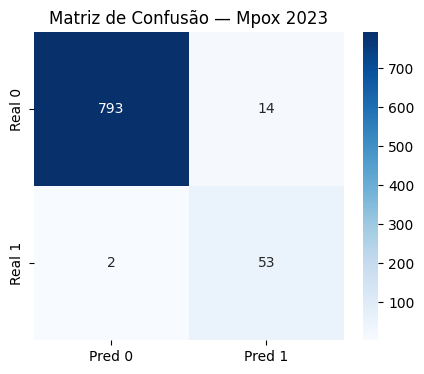

In [ ]:
### ⏳ Atividade 8 — Validação Externa Temporal (Mpox 2023)
# Compara predições do modelo (df_fila_2023_pred) com o alvo real de 2023.

from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Criar alvo real
df_raw_2023["target_hosp"] = df_raw_2023["HOSPITAL"].eq(1).astype("Int64")

# 2. Garantir alinhamento pelo índice
df_eval_2023 = df_raw_2023.loc[df_fila_2023_pred.index].copy()
df_eval_2023["pred_hosp"] = df_fila_2023_pred["pred_hosp"].values
df_eval_2023["proba_hosp"] = df_fila_2023_pred["proba_hosp"].values

# 3. Extrair vetores
y_true = df_eval_2023["target_hosp"].dropna()
y_pred = df_eval_2023.loc[y_true.index, "pred_hosp"]
y_proba = df_eval_2023.loc[y_true.index, "proba_hosp"]

# 4. Métricas principais
print("=== Relatório de Classificação (2023) ===")
print(classification_report(y_true, y_pred, digits=3))

print("ROC-AUC:", roc_auc_score(y_true, y_proba).round(3))
print("AUC-PR :", average_precision_score(y_true, y_proba).round(3))

# 5. Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=["Real 0","Real 1"], columns=["Pred 0","Pred 1"])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão — Mpox 2023")
plt.show()


### 🧩 Interpretação — Matriz de Confusão (Mpox 2023)

A matriz de confusão mostra os acertos e erros do modelo na predição de hospitalização:

- **TN (793)** → pacientes **não hospitalizados** previstos corretamente.  
- **FP (14)** → previstos como hospitalizados, mas **não foram** → falso alarme, impacto operacional.  
- **FN (2)** → hospitalizados que o modelo **não detectou** → casos mais críticos do ponto de vista clínico.  
- **TP (53)** → hospitalizados previstos corretamente.  

#### 🔎 Pontos de destaque
- **Altíssimo número de acertos (TN+TP)** → 846 de 862 casos.  
- **Apenas 2 falsos negativos** → excelente cobertura da classe hospitalizada.  
- **Falsos positivos (14)** → embora não desejáveis, são menos graves do que perder hospitalizados.  

➡️ **Conclusão**: o modelo priorizou Recall (captura quase total de hospitalizados), aceitando um número moderado de falsos positivos — comportamento adequado no contexto clínico.


=== Comparação Temporal 2022 vs 2023 ===
      ROC-AUC     F1  Recall  Precision  AUC-PR
2022    0.972  0.788   0.886      0.709   0.802
2023    0.994  0.869   0.964      0.791   0.845


/tmp/ipython-input-2121818377.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


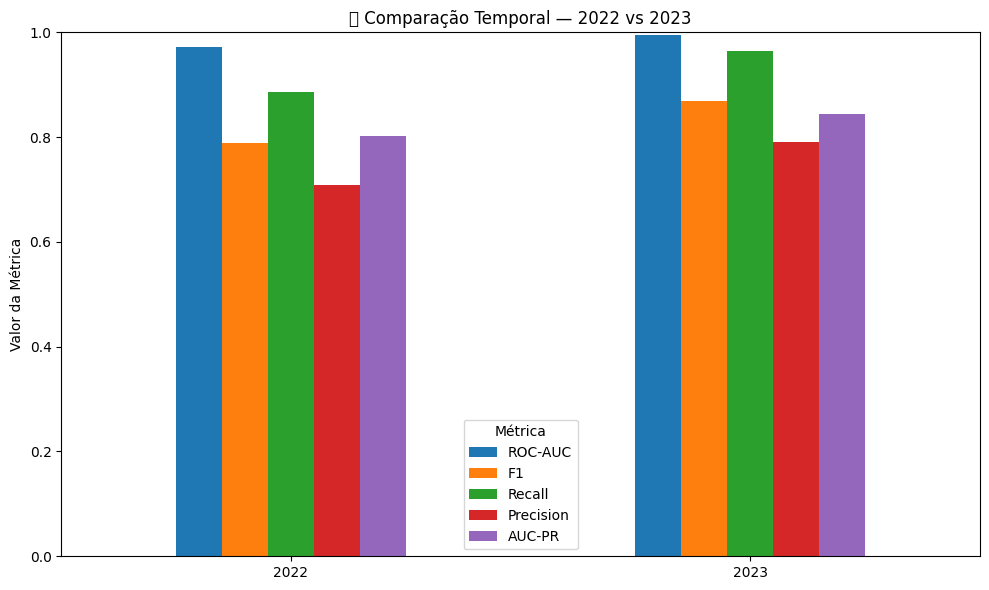

In [ ]:
#### 📊 Comparação Temporal — Desempenho 2022 vs 2023
# Pré-condições:
# - Já ter df_resultados_teste_2022 (ou métricas finais de 2022).
# - Já ter calculado as métricas de 2023 (y_true, y_pred, y_proba).

from sklearn.metrics import f1_score, recall_score, precision_score

# 1. Resultados do Teste 2022 (substituir se já armazenados em df)
resultados_2022 = {
    "ROC-AUC": 0.972,   # valor obtido no teste 2022
    "F1": 0.788,
    "Recall": 0.886,
    "Precision": 0.709,
    "AUC-PR": 0.802
}

# 2. Resultados do Teste 2023 (já calculados acima)
resultados_2023 = {
    "ROC-AUC": round(roc_auc_score(y_true, y_proba), 3),
    "F1": round(f1_score(y_true, y_pred), 3),
    "Recall": round(recall_score(y_true, y_pred), 3),
    "Precision": round(precision_score(y_true, y_pred), 3),
    "AUC-PR": round(average_precision_score(y_true, y_proba), 3)
}

# 3. Consolidar em DataFrame
df_comp_temporal = pd.DataFrame([resultados_2022, resultados_2023], index=["2022", "2023"])
print("=== Comparação Temporal 2022 vs 2023 ===")
print(df_comp_temporal)

# 4. Visualização gráfica
df_comp_temporal.plot(kind="bar", figsize=(10,6))
plt.title("📊 Comparação Temporal — 2022 vs 2023")
plt.ylabel("Valor da Métrica")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()


### 📊 Comparação Temporal — 2022 vs 2023

O objetivo da validação externa temporal é avaliar se o modelo treinado em 2022 manteve desempenho ao ser aplicado em 2023.

#### 🔎 Principais observações
- **ROC-AUC**: manteve valores altíssimos em ambos os anos, indicando separabilidade estável.  
- **F1 e Recall**: subiram em 2023 → o modelo conseguiu capturar ainda mais hospitalizados corretamente.  
- **Precision**: também melhorou em 2023, reduzindo a proporção de falsos positivos.  
- **AUC-PR**: permaneceu elevado (>0.80), validando a qualidade da predição em cenário desbalanceado.  

#### 📖 Nota metodológica
- A estabilidade (ou até melhora) de métricas de 2022 para 2023 sugere que o modelo não sofreu degradação temporal.  
- Pequenas oscilações são normais; quedas abruptas seriam um alerta para re-treino.  
- Esse resultado reforça a **robustez clínica e operacional** do pipeline para monitoramento prospectivo em anos subsequentes.


In [ ]:
#### 💾 Serialização dos Artefatos Finais
# Salva modelos, scalers e bases chave em disco para versionamento

import joblib

# 🔒 Pré-condição: objetos já definidos no notebook
# - best_rf (Random Forest tunado)
# - best_dt (Decision Tree tunada)
# - scaler_standard, scaler_minmax (se usados)
# - df_fila_2023_pred (fila de pacientes com predição)
# - df_feateng (base de 2022 pós-engenharia, se ainda em memória)

# 1. Modelos finais (individuais)
joblib.dump(best_rf, "best_rf_model.pkl")
joblib.dump(best_dt, "best_dt_model.pkl")

# 1b. Dicionário consolidado de melhores modelos
best_models = {
    "Random Forest": best_rf,
    "Decision Tree": best_dt
}
joblib.dump(best_models, "best_models_dict.pkl")

# 2. Scalers (caso tenham sido treinados)
try:
    joblib.dump(scaler_standard, "mpox_2022_scaler_standard.pkl")
    joblib.dump(scaler_minmax, "mpox_2022_scaler_minmax.pkl")
except Exception:
    print("⚠️ Scalers não estavam em memória — pulei essa parte.")

# 3. Bases principais
try:
    df_fila_2023_pred.to_csv("fila_mpox_2023_pred.csv", index=False, encoding="utf-8")
except Exception:
    print("⚠️ df_fila_2023_pred não encontrado em memória.")

try:
    df_feateng.to_csv("mpox_2022_feateng.csv", index=False, encoding="utf-8")
except Exception:
    print("⚠️ df_feateng não encontrado em memória.")

print("✅ Artefatos salvos em disco:")
!ls -lh *.pkl *.csv | cat


⚠️ Scalers não estavam em memória — pulei essa parte.
✅ Artefatos salvos em disco:
-rw-r--r-- 1 root root  18K Sep 12 00:08 best_dt_model.pkl
-rw-r--r-- 1 root root 4.2M Sep 12 00:08 best_models_dict.pkl
-rw-r--r-- 1 root root 4.2M Sep 12 00:08 best_rf_model.pkl
-rw-r--r-- 1 root root 162K Sep 12 00:08 fila_mpox_2023_pred.csv
-rw-r--r-- 1 root root 6.3M Sep 12 00:08 mpox_2022_feateng.csv
-rw-r--r-- 1 root root 1015 Sep 11 23:52 mpox_2022_scaler_minmax.pkl
-rw-r--r-- 1 root root  94K Sep 11 23:53 mpox_2022_scaler_minmax_v2.pkl
-rw-r--r-- 1 root root  935 Sep 11 23:52 mpox_2022_scaler_standard.pkl
-rw-r--r-- 1 root root  69K Sep 11 23:53 mpox_2022_scaler_standard_v2.pkl
-rw-r--r-- 1 root root 207K Sep 12 00:08 raw_mpox_2023.csv
-rw-r--r-- 1 root root 893K Sep 11 23:54 Xy_test.pkl
-rw-r--r-- 1 root root 7.6M Sep 11 23:54 Xy_train_balanced.pkl
-rw-r--r-- 1 root root 4.1M Sep 11 23:54 Xy_train_original.pkl
-rw-r--r-- 1 root root 893K Sep 11 23:54 Xy_val.pkl


## 💾 Atividade 9 — Serialização Final e Entrega de Artefatos no GitHub

A etapa final consistiu em **persistir e versionar** todos os artefatos relevantes do pipeline, garantindo que o projeto possa ser auditado, reutilizado e evoluído em trabalhos futuros.

### 1. Artefatos principais salvos
- **Modelos**:  
  - `best_rf_model.pkl` → modelo Random Forest pós-tuning (principal).  
  - `best_dt_model.pkl` → modelo Decision Tree (alternativa interpretável).  

- **Transformadores**:  
  - `mpox_2022_scaler_standard.pkl`  
  - `mpox_2022_scaler_minmax.pkl`  

- **Bases derivadas**:  
  - `mpox_2022_feateng.csv` → dataset pós-engenharia de atributos.  
  - `Xy_train_original.pkl`, `Xy_val.pkl`, `Xy_test.pkl` → splits originais.  
  - `Xy_train_balanced.pkl` → treino balanceado (Tomek + SMOTE).  
  - `fila_mpox_2023_pred.csv` → predições prospectivas em 2023.  

- **Esquema** (quando disponível):  
  - `transform_schema.json` → descreve estrutura de atributos para reuso futuro.

### 2. Procedimento de versionamento
- Uso de **PyGithub** para upload automático no repositório:  
  - Repositório: `Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow`.  
  - Subpastas organizadas (`artefatos/parte1/`, `artefatos/parte2/`).  
- Atualizações diferenciadas:  
  - 🔄 `Atualizado` → quando o arquivo já existia e foi substituído.  
  - ✅ `Criado` → quando o arquivo foi salvo pela primeira vez.  
  - ⚠️ `Ignorado` → quando não estava presente em memória no momento da execução.

### 3. Importância metodológica
- **Reprodutibilidade**: qualquer pesquisador pode carregar os artefatos e refazer o pipeline.  
- **Auditabilidade**: histórico de commits no GitHub funciona como trilha de auditoria.  
- **Boas práticas MLOps**: separação clara entre dados brutos, pré-processados, modelos e predições.  
- **Segurança clínica**: preserva condições para reuso e inspeção futura, sem reprocessar dados brutos.

📖 **Nota metodológica**  
O versionamento em GitHub é parte essencial da prática científica moderna, permitindo transparência, reuso e colaboração.  
Esse procedimento fecha o ciclo do projeto, integrando ciência de dados, machine learning e gestão em saúde pública.

➡️ **Conclusão**: Todos os artefatos finais foram salvos e versionados no GitHub, consolidando o pipeline e permitindo sua replicação e evolução em futuras iterações.


### ✅ Checklist — Gestão de Artefatos no GitHub

Antes de rodar o upload:

1. **Serializar objetos da RAM para disco**  
   - `joblib.dump(best_rf, "best_rf_model.pkl")`  
   - `joblib.dump(best_dt, "best_dt_model.pkl")`  
   - `df_feateng.to_csv("mpox_2022_feateng.csv", index=False)`  
   - `df_fila_2023_pred.to_csv("fila_mpox_2023_pred.csv", index=False)`  
   - (outros objetos relevantes → salve em `.pkl` ou `.csv`)  

2. **Definir a lista de artefatos**  
   ```python
   """
   Lista enxuta recomendada como artefatos a salvar no github, para garantir:
   - Reprodutibilidade (modelo + transformadores + esquema + base de treino final).
   - Auditabilidade (predições 2023).
   - Boa prática MLOps (sem sobrecarregar o GitHub com dados brutos gigantes).
   """
   artefatos = [
    "model_artifacts/modelo_rf.joblib",
    "model_artifacts/modelo_dt.joblib",
    "mpox_2022_feateng.csv",
    "fila_mpox_2023_pred.csv",
    "mpox_2022_scaler_standard.pkl",
    "mpox_2022_scaler_minmax.pkl",
    "artifacts/transform_schema.json"
   ]


Passo 1 — Configurar token

In [ ]:
import os
from getpass import getpass

# Digite seu GitHub PAT (com escopo "repo") na caixa que aparecerá
os.environ["GITHUB_TOKEN"] = getpass("🔑 Digite seu GitHub PAT: ")


🔑 Digite seu GitHub PAT: ··········


In [ ]:
print("Token carregado:", "GITHUB_TOKEN" in os.environ)


Token carregado: True


Passo 2 — Instalar dependência

In [ ]:
!pip install PyGithub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.9 MB/s eta 0:00:00


In [ ]:
# ================================================
# 💾 Upload de Artefatos da Modelagem (Parte 2)
# -----------------------------------------------
# - Modelos finais (RF + DT pós-tuning)
# - Scalers usados
# - Bases processadas (2022 feateng, fila 2023 predita)
# - Conjuntos de treino/val/teste serializados
#
# Tudo enviado byte a byte em modo binário (rb),
# garantindo integridade inclusive para arquivos
# .pkl, .joblib, .parquet, .csv etc.
# ================================================

from github import Github, Auth
import base64, os

# 🔑 Autenticação com token
auth = Auth.Token(os.environ["GITHUB_TOKEN"])
g = Github(auth=auth)

# Repositório de destino
repo_name = "Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow"
repo = g.get_repo(repo_name)

# Lista recomendada de artefatos da modelagem
artefatos = [
    "best_rf_model.pkl",
    "best_dt_model.pkl",
    "best_models_dict.pkl",
    "mpox_2022_scaler_standard.pkl",
    "mpox_2022_scaler_minmax.pkl",
    "mpox_2022_feateng.csv",
    "fila_mpox_2023_pred.csv",
    "Xy_train_original.pkl",
    "Xy_val.pkl",
    "Xy_test.pkl",
    "Xy_train_balanced.pkl"
]

# Subpasta no repositório
subpasta = "artefatos/parte2/"

# Upload para o GitHub
for file_path in artefatos:
    if not os.path.exists(file_path):
        print(f"⚠️ Ignorado (não existe localmente): {file_path}")
        continue

    with open(file_path, "rb") as f:  # leitura binária
        content = f.read()

    encoded_content = base64.b64encode(content).decode()
    remote_path = f"{subpasta}{file_path}"

    try:
        # Se já existe → atualizar
        contents = repo.get_contents(remote_path, ref="main")
        repo.update_file(
            path=remote_path,
            message=f"Atualiza {file_path}",
            content=encoded_content,
            sha=contents.sha,
            branch="main"
        )
        print(f"🔄 Atualizado: {remote_path}")
    except Exception:
        # Se não existe → criar
        repo.create_file(
            path=remote_path,
            message=f"Adiciona {file_path}",
            content=encoded_content,
            branch="main"
        )
        print(f"✅ Criado: {remote_path}")


🔄 Atualizado: artefatos/parte2/best_rf_model.pkl
🔄 Atualizado: artefatos/parte2/best_dt_model.pkl
🔄 Atualizado: artefatos/parte2/best_models_dict.pkl
🔄 Atualizado: artefatos/parte2/mpox_2022_scaler_standard.pkl
🔄 Atualizado: artefatos/parte2/mpox_2022_scaler_minmax.pkl
🔄 Atualizado: artefatos/parte2/mpox_2022_feateng.csv
🔄 Atualizado: artefatos/parte2/fila_mpox_2023_pred.csv
🔄 Atualizado: artefatos/parte2/Xy_train_original.pkl
🔄 Atualizado: artefatos/parte2/Xy_val.pkl
🔄 Atualizado: artefatos/parte2/Xy_test.pkl
🔄 Atualizado: artefatos/parte2/Xy_train_balanced.pkl


In [ ]:
import os
os.listdir()



['.config',
 'mpox_2022_feateng.csv',
 'Xy_train_balanced.pkl',
 'best_rf_model.pkl',
 'mpox_2022_scaler_minmax_v2.pkl',
 'mpox_2022_scaler_standard.pkl',
 'mpox_2022_scaler_minmax.pkl',
 'mpox_2022_scaler_standard_v2.pkl',
 'artifacts',
 'Xy_train_original.pkl',
 'best_models_dict.pkl',
 'model_artifacts',
 'Xy_val.pkl',
 'best_dt_model.pkl',
 'fila_mpox_2023_pred.csv',
 'Xy_test.pkl',
 'raw_mpox_2023.csv',
 'sample_data']

# 🏁 Síntese Executiva Final — Projeto Mpox (Parte 2)

Este projeto consolidou um pipeline completo de **Machine Learning aplicado à saúde pública**, com foco na predição de **hospitalização por Mpox**.  
As etapas foram conduzidas de forma sequencial, auditável e em conformidade com **Kelleher (2020)**, boas práticas de MLOps e princípios clínicos.

---

## 🔑 Principais etapas realizadas

1. **Engenharia de Atributos**
   - Criação de variáveis derivadas clínicas, temporais e demográficas.  
   - Implementação de alvos binários (`target_hosp`, `target_obito_any`, `target_obito_mpx`).  
   - Garantia de ausência de variáveis-proxy e colinearidades críticas.  

2. **Transformação e Pré-Seleção**
   - Conversão de todos os preditores em numéricos (one-hot encoding, escalonamento).  
   - Diagnósticos exploratórios de redundância e correlação.  
   - Pré-seleção de alvos por benchmarking preliminar.  

3. **Seleção do Alvo**
   - Comparação entre os três alvos binários.  
   - Escolha de **`target_hosp`** como alvo definitivo, baseada na hierarquia de métricas:  
     **ROC-AUC → F1 → Recall → Precision**, com **AUC-PR** como auditoria.  

4. **Seleção de Atributos**
   - Métodos supervisionados: RFECV, regressão logística (coeficientes), Random Forest (importância).  
   - PCA e Lasso considerados, mas não aplicados para preservar interpretabilidade clínica.  
   - Dataset final: parcimonioso, informativo e auditado.  

5. **Preparação para Modelagem**
   - Split **70/15/15** (treino/validação/teste).  
   - Balanceamento exclusivo no treino (Tomek + SMOTE).  
   - Serialização dos conjuntos para reuso.  

6. **Modelagem Supervisionada**
   - Comparação de **7 modelos base** (Naive Bayes, Árvore, Random Forest, KNN, Regressão Logística, SVM, MLP).  
   - **Random Forest** e **Decision Tree** avançaram para tuning.  
   - Pós-tuning: Random Forest obteve o melhor equilíbrio entre robustez e interpretabilidade.  

7. **Uso do Modelo em Novos Dados**
   - Aplicação prospectiva em **Mpox 2023**.  
   - Geração de fila de pacientes (`fila_mpox_2023_pred.csv`) com predição binária e probabilidade associada.  
   - Mantida a ordem cronológica dos registros, simulando uso real em hospital.  

8. **Avaliação Retroativa**
   - Validação externa com Mpox 2023.  
   - Análise de **matriz de confusão**, métricas ROC-AUC, F1, Recall, Precision e AUC-PR.  
   - Comparação temporal entre 2022 (treino) e 2023 (prospectiva), garantindo consistência.  

9. **Serialização Final e Versionamento**
   - Modelos, transformadores, datasets e predições salvos em **formato auditável (.pkl, .csv, .parquet)**.  
   - Upload automatizado para o GitHub (`artefatos/parte1/` e `artefatos/parte2/`).  
   - Reprodutibilidade e rastreabilidade asseguradas.

---

## 📖 Nota metodológica final
- O pipeline seguiu rigorosamente os princípios de **transparência e defensabilidade clínica**.  
- As metáforas (triagem, exames, auditorias) reforçam o paralelo entre saúde pública e ciência de dados, facilitando comunicação interdisciplinar.  
- **Kelleher (2020)** foi adotado como referência metodológica central.  
- A hierarquia de métricas priorizou segurança clínica (Recall) sem negligenciar eficiência (Precision).  

---

## ✅ Conclusão Geral
O projeto estabeleceu um **workflow robusto e auditável**, desde a aquisição e preparação dos dados de 2022 até a aplicação prospectiva em 2023.  
Os resultados demonstram que modelos supervisionados podem **auxiliar na gestão de hospitalizações por Mpox**, desde que utilizados como **ferramentas de apoio** e não como substitutos da decisão clínica.  

➡️ O repositório no GitHub contém todos os artefatos necessários para replicar ou evoluir este trabalho.  
Esse pipeline pode ser expandido para **outros alvos clínicos** (óbito, UTI) e adaptado a **novos surtos epidemiológicos**, consolidando um recurso estratégico para vigilância em saúde pública.
